In [254]:
import pandas as pd
import numpy as np

from utils.models import find_best_model
from utils.search_model import train_models
from utils.visual import plot_for_each_algorithm,plot_for_each_balancer,plot_for_each_performance_metric
from utils.get_parameters import max_score_for_each, get_combinations
import os
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns

## Model Training

The first step of model training is to train combinations of algorithm, imputation and balancing approaches\
The algorithms are:

    - KNN
    - Decision Tree
    - Logistic regression
    - SVM
    - Naive Bayes
    - RandomForestClassifier
    - GradientBoostingClassifier
    - BaggingClassifier
    - XGBClassifier



In [3]:
# performance_df = train_models("../data/initial_data/frmgham2_project_data_full.csv",'CVD',
                 # '../src/results/general/full_data_performances_9_models_5_balancers.csv')
performances_df = pd.read_csv("../src/results/general/full_data_performances_9_models_5_balancers.csv")


In [5]:
performances_df

Algorithm                                 Imputer Imbalance  \
0     LogisticRegression  SimpleImputer_mean__SimpleImputer_mode     SMOTE   
1           DecisionTree  SimpleImputer_mean__SimpleImputer_mode     SMOTE   
2             NaiveBayes  SimpleImputer_mean__SimpleImputer_mode     SMOTE   
3                    KNN  SimpleImputer_mean__SimpleImputer_mode     SMOTE   
4                    SVM  SimpleImputer_mean__SimpleImputer_mode     SMOTE   
...                  ...                                     ...       ...   
1075                 SVM          KNNImptuer__SimpleImputer_mode    AllKNN   
1076        RandomForest          KNNImptuer__SimpleImputer_mode    AllKNN   
1077    GradientBoosting          KNNImptuer__SimpleImputer_mode    AllKNN   
1078             Bagging          KNNImptuer__SimpleImputer_mode    AllKNN   
1079             XGBoost          KNNImptuer__SimpleImputer_mode    AllKNN   

         Metric   Score    Set MainMetric  
0     Train-F-1   97.53  Train        F-1  
1     Train-F-1  100.00  Train        F-1  
2     Train-F-1   93.23  Train        F-1  
3     Train-F-1   98.27  Train        F-1  
4     Train-F-1   98.29  Train        F-1  
...         ...     ...    ...        ...  
1075   Test-AUC   96.68   Test        AUC  
1076   Test-AUC   96.70   Test        AUC  
1077   Test-AUC   96.48   Test        AUC  
1078   Test-AUC   96.68   Test        AUC  
1079   Test-AUC   96.47   Test        AUC  

[1080 rows x 7 columns]

In [7]:
counts = performances_df[['Algorithm','Imputer','Imbalance']].drop_duplicates().shape[0]
print(f"Number of models for each algorithm: {counts}")

Number of models for each algorithm: 90


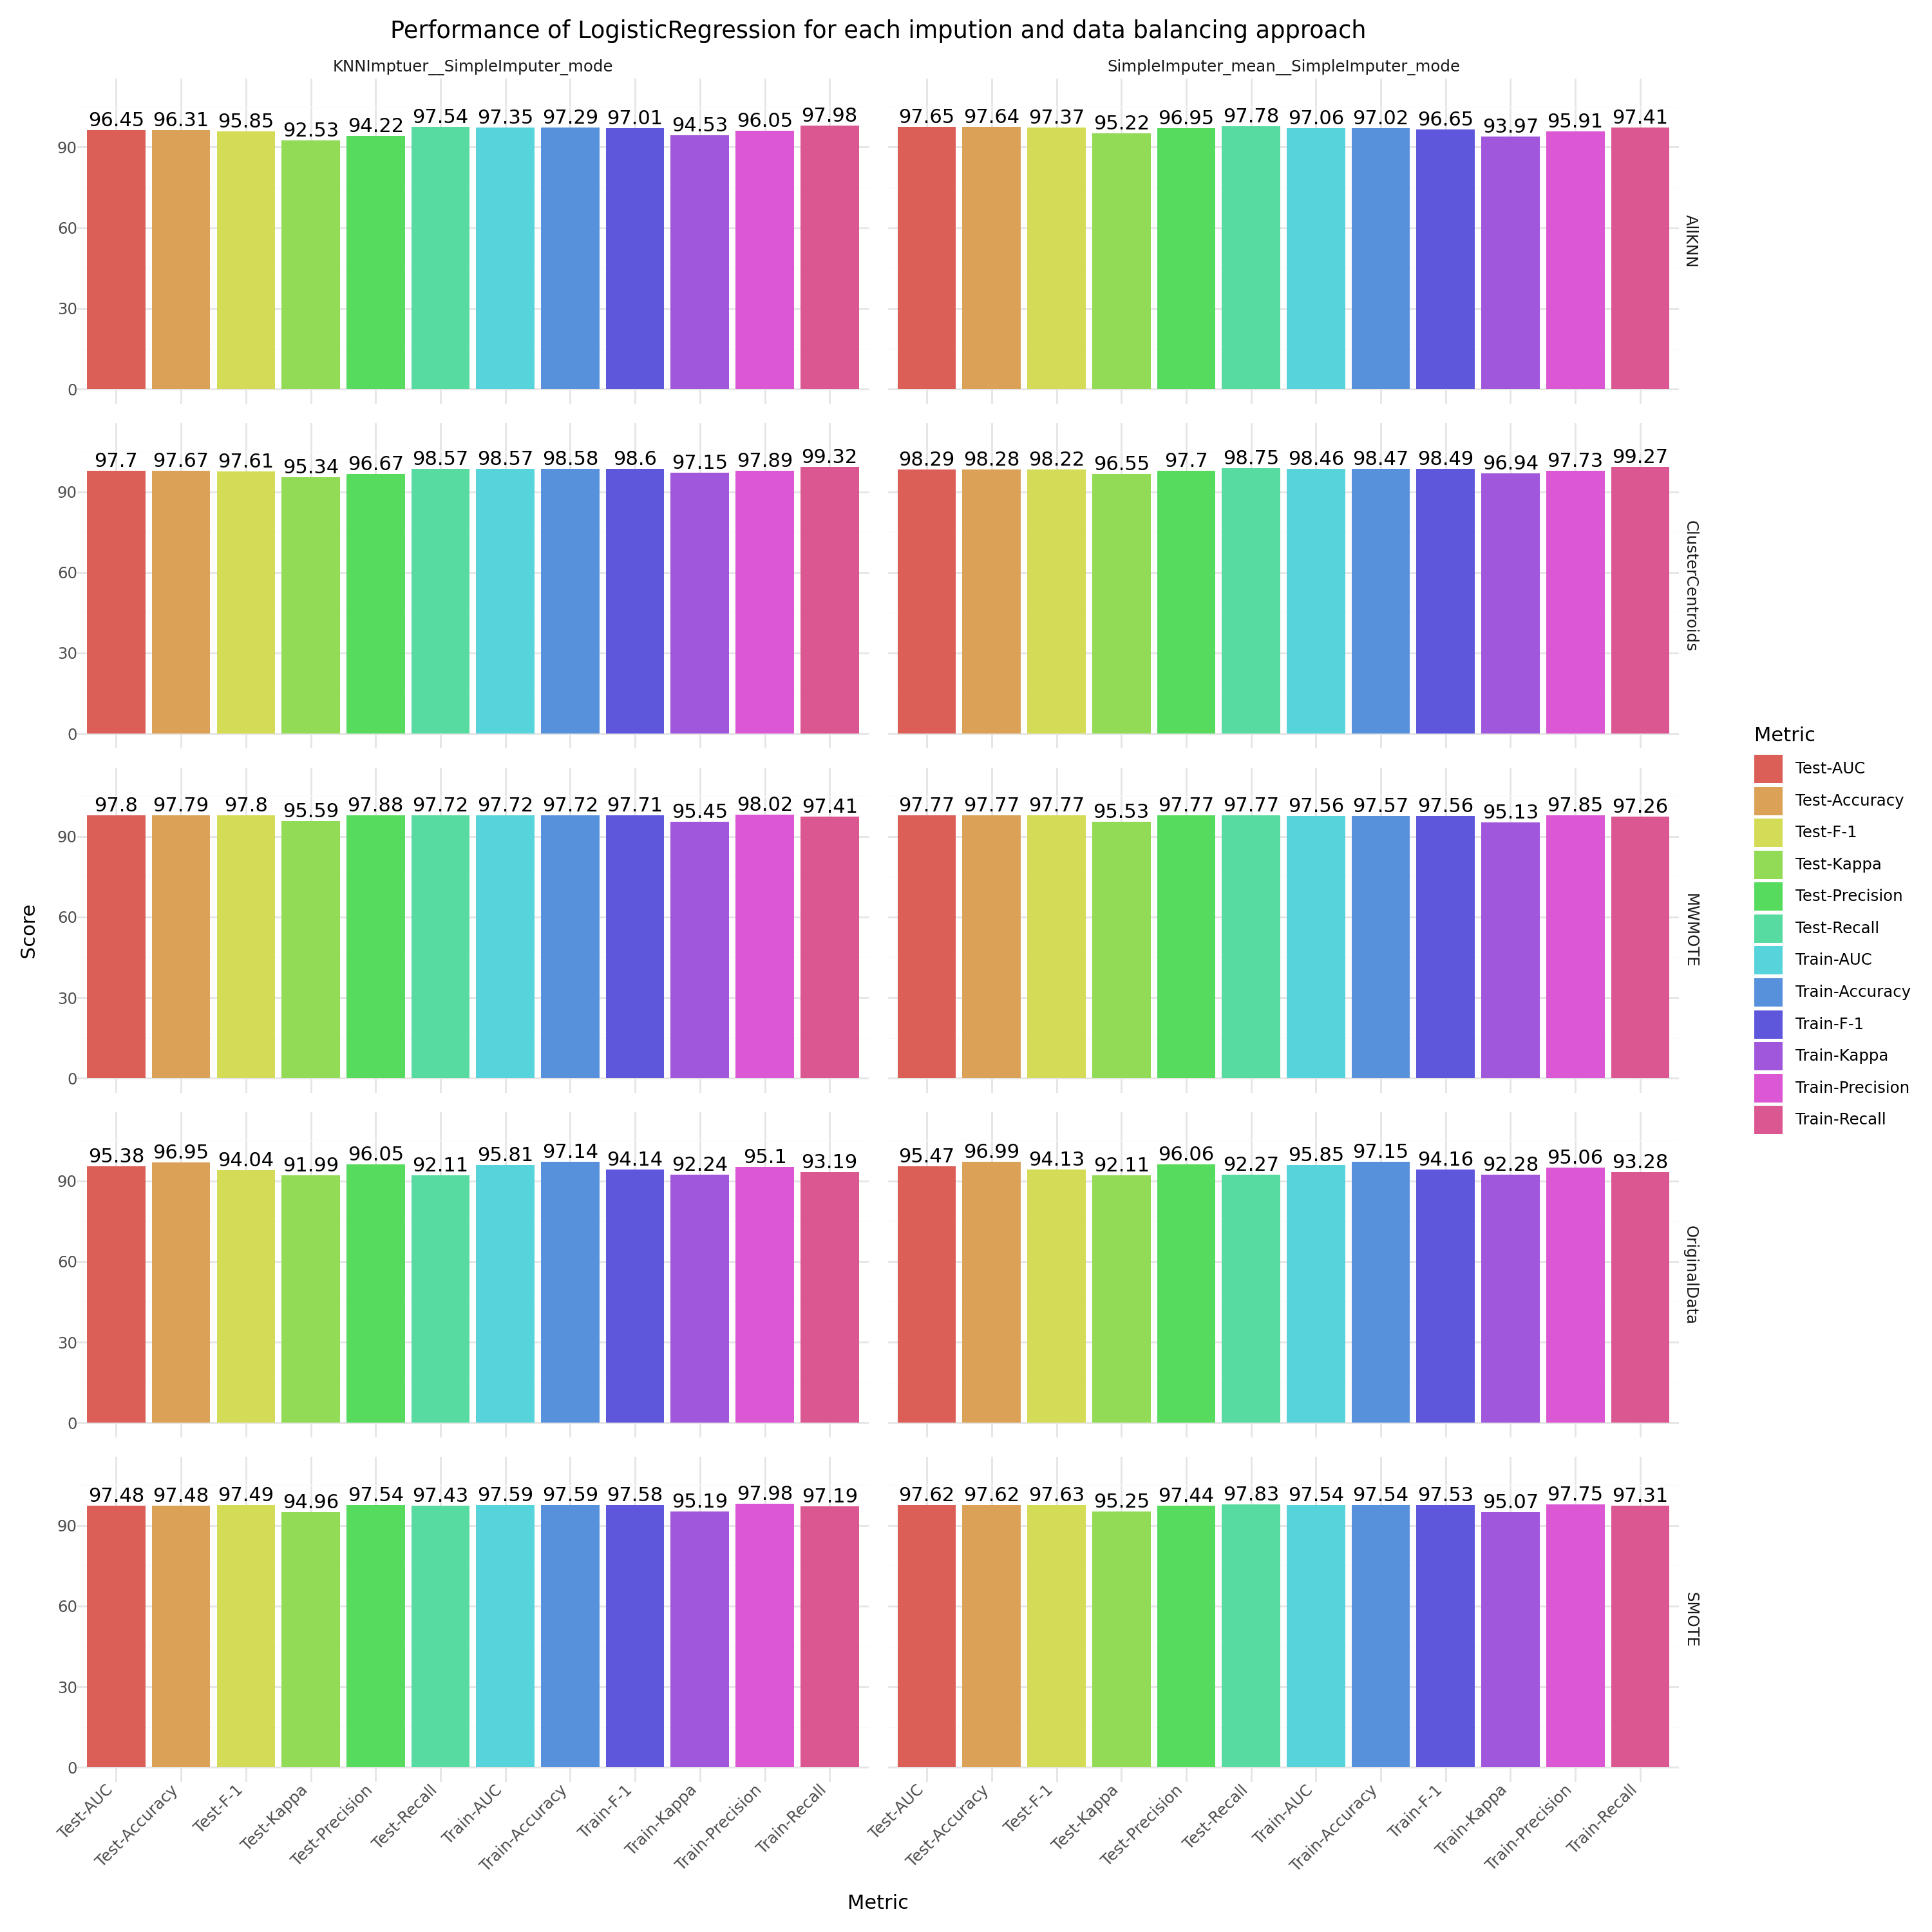

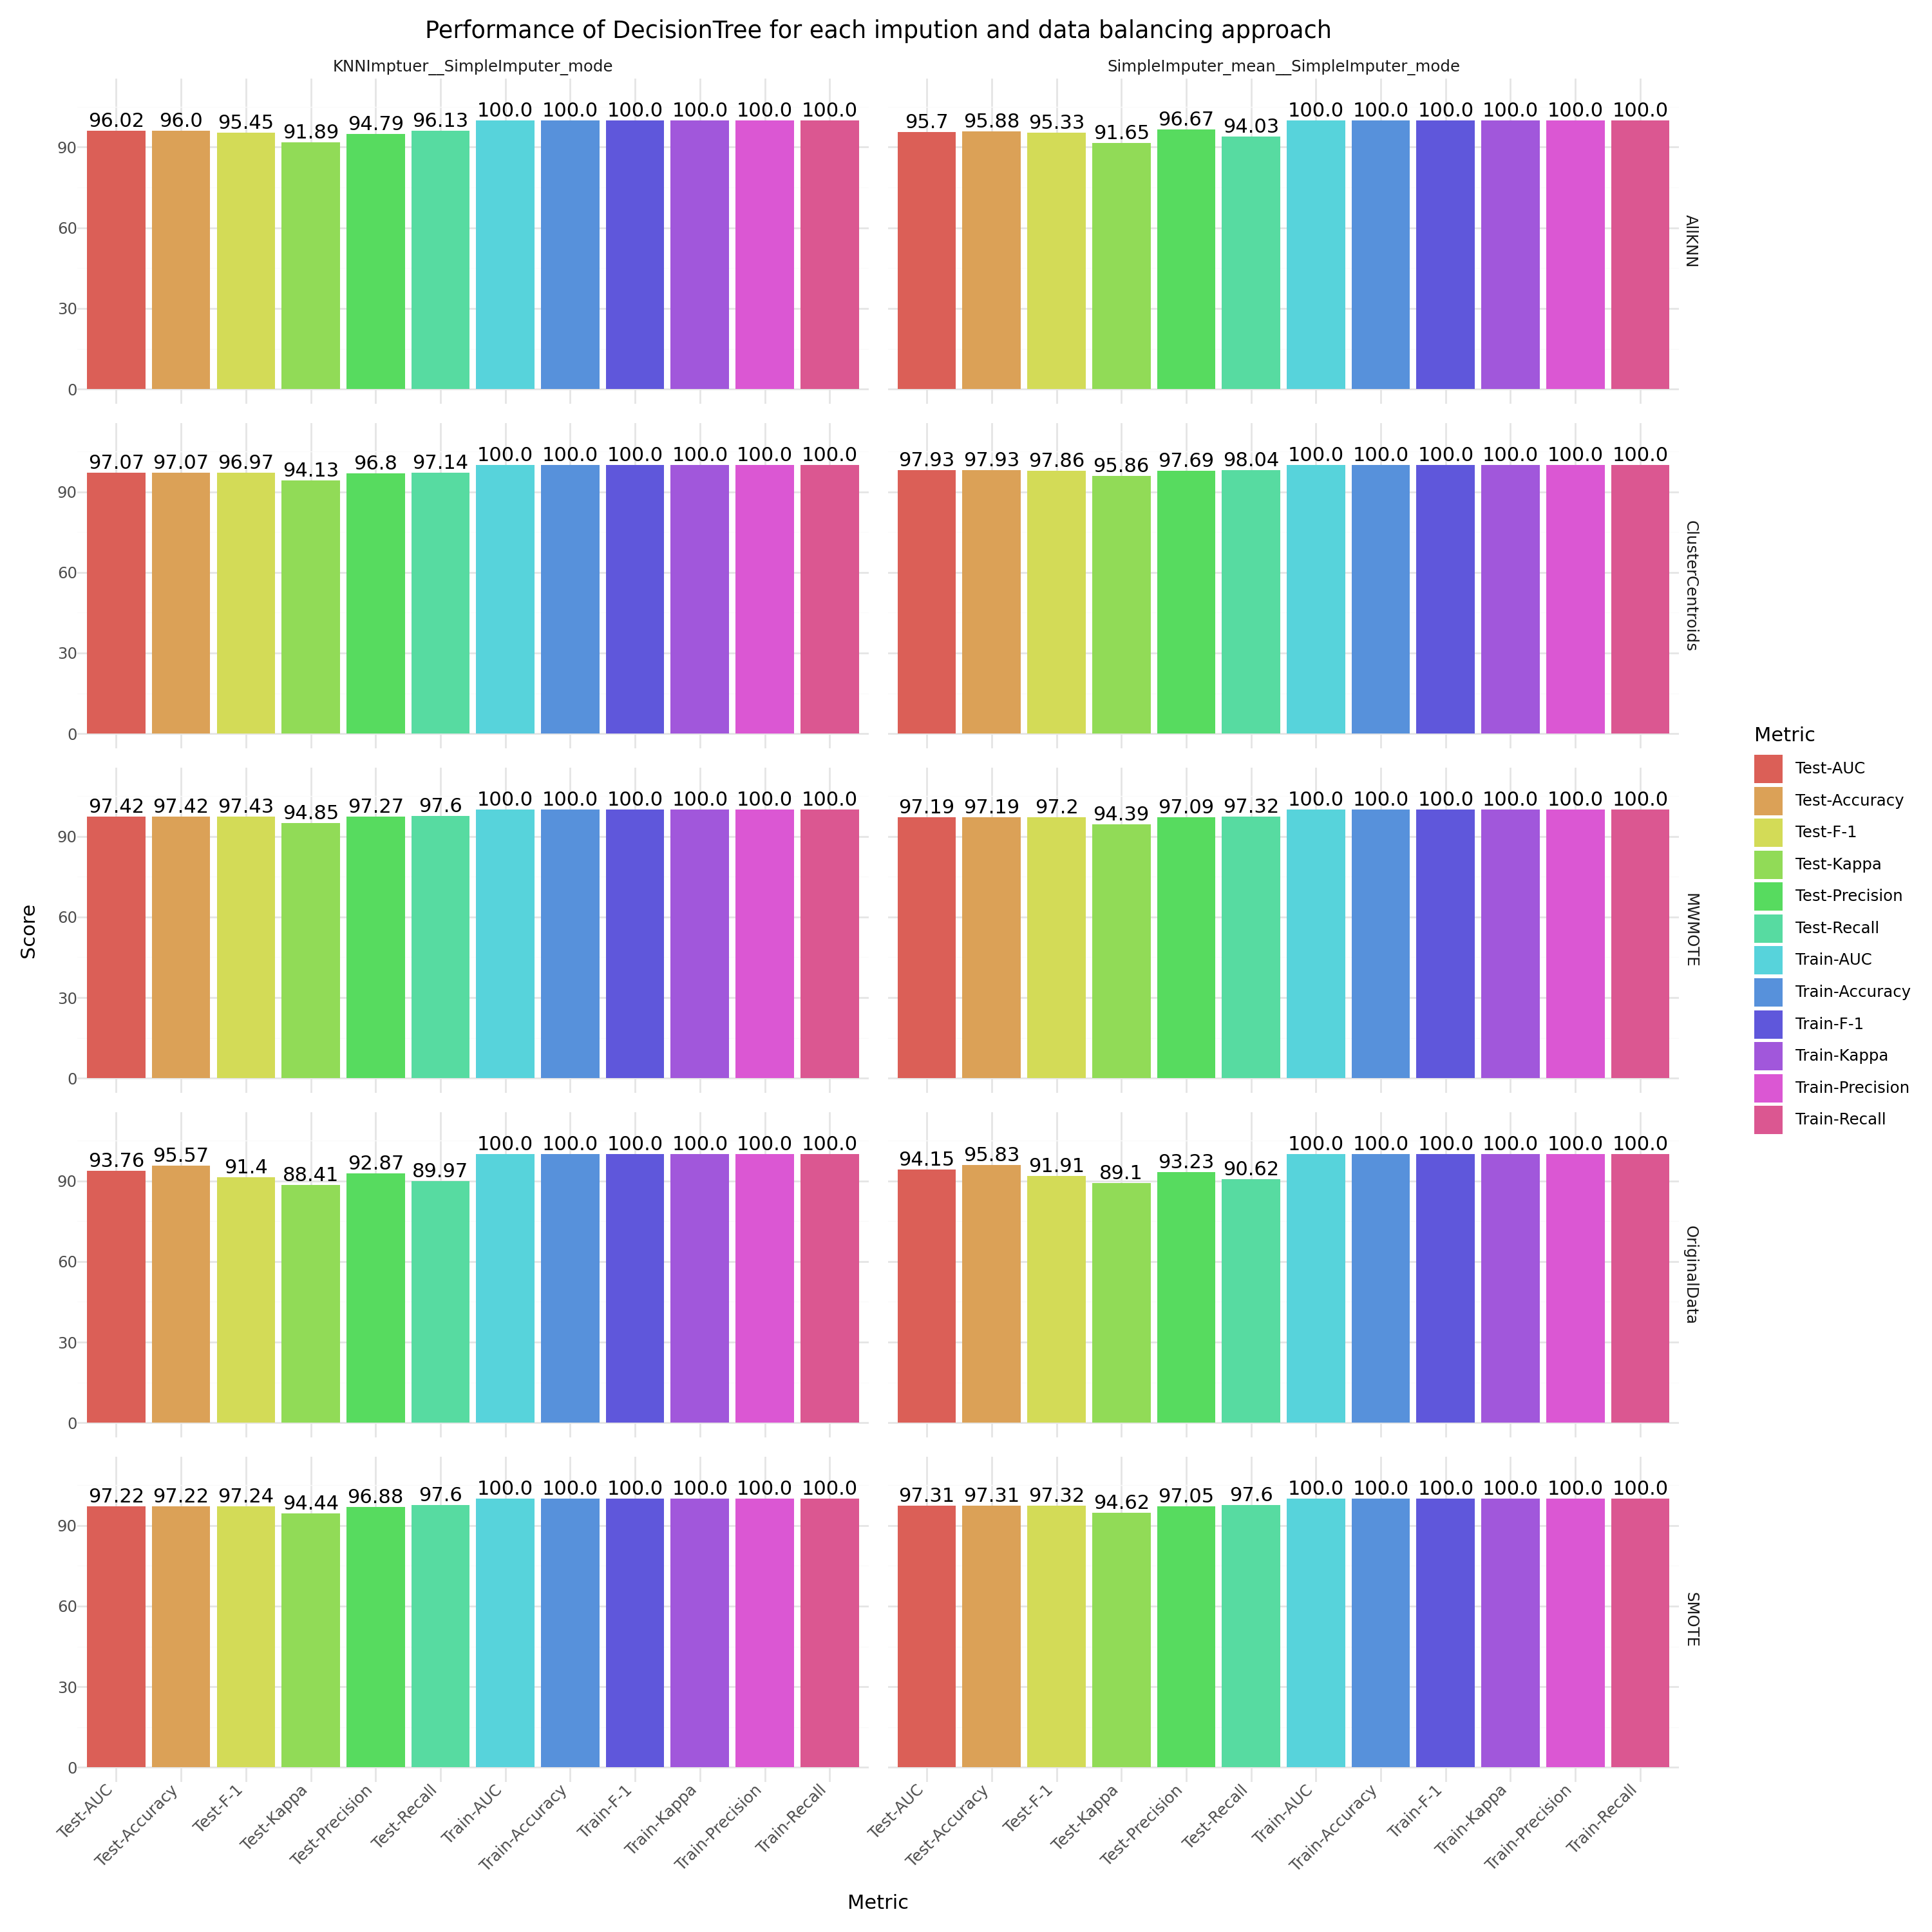

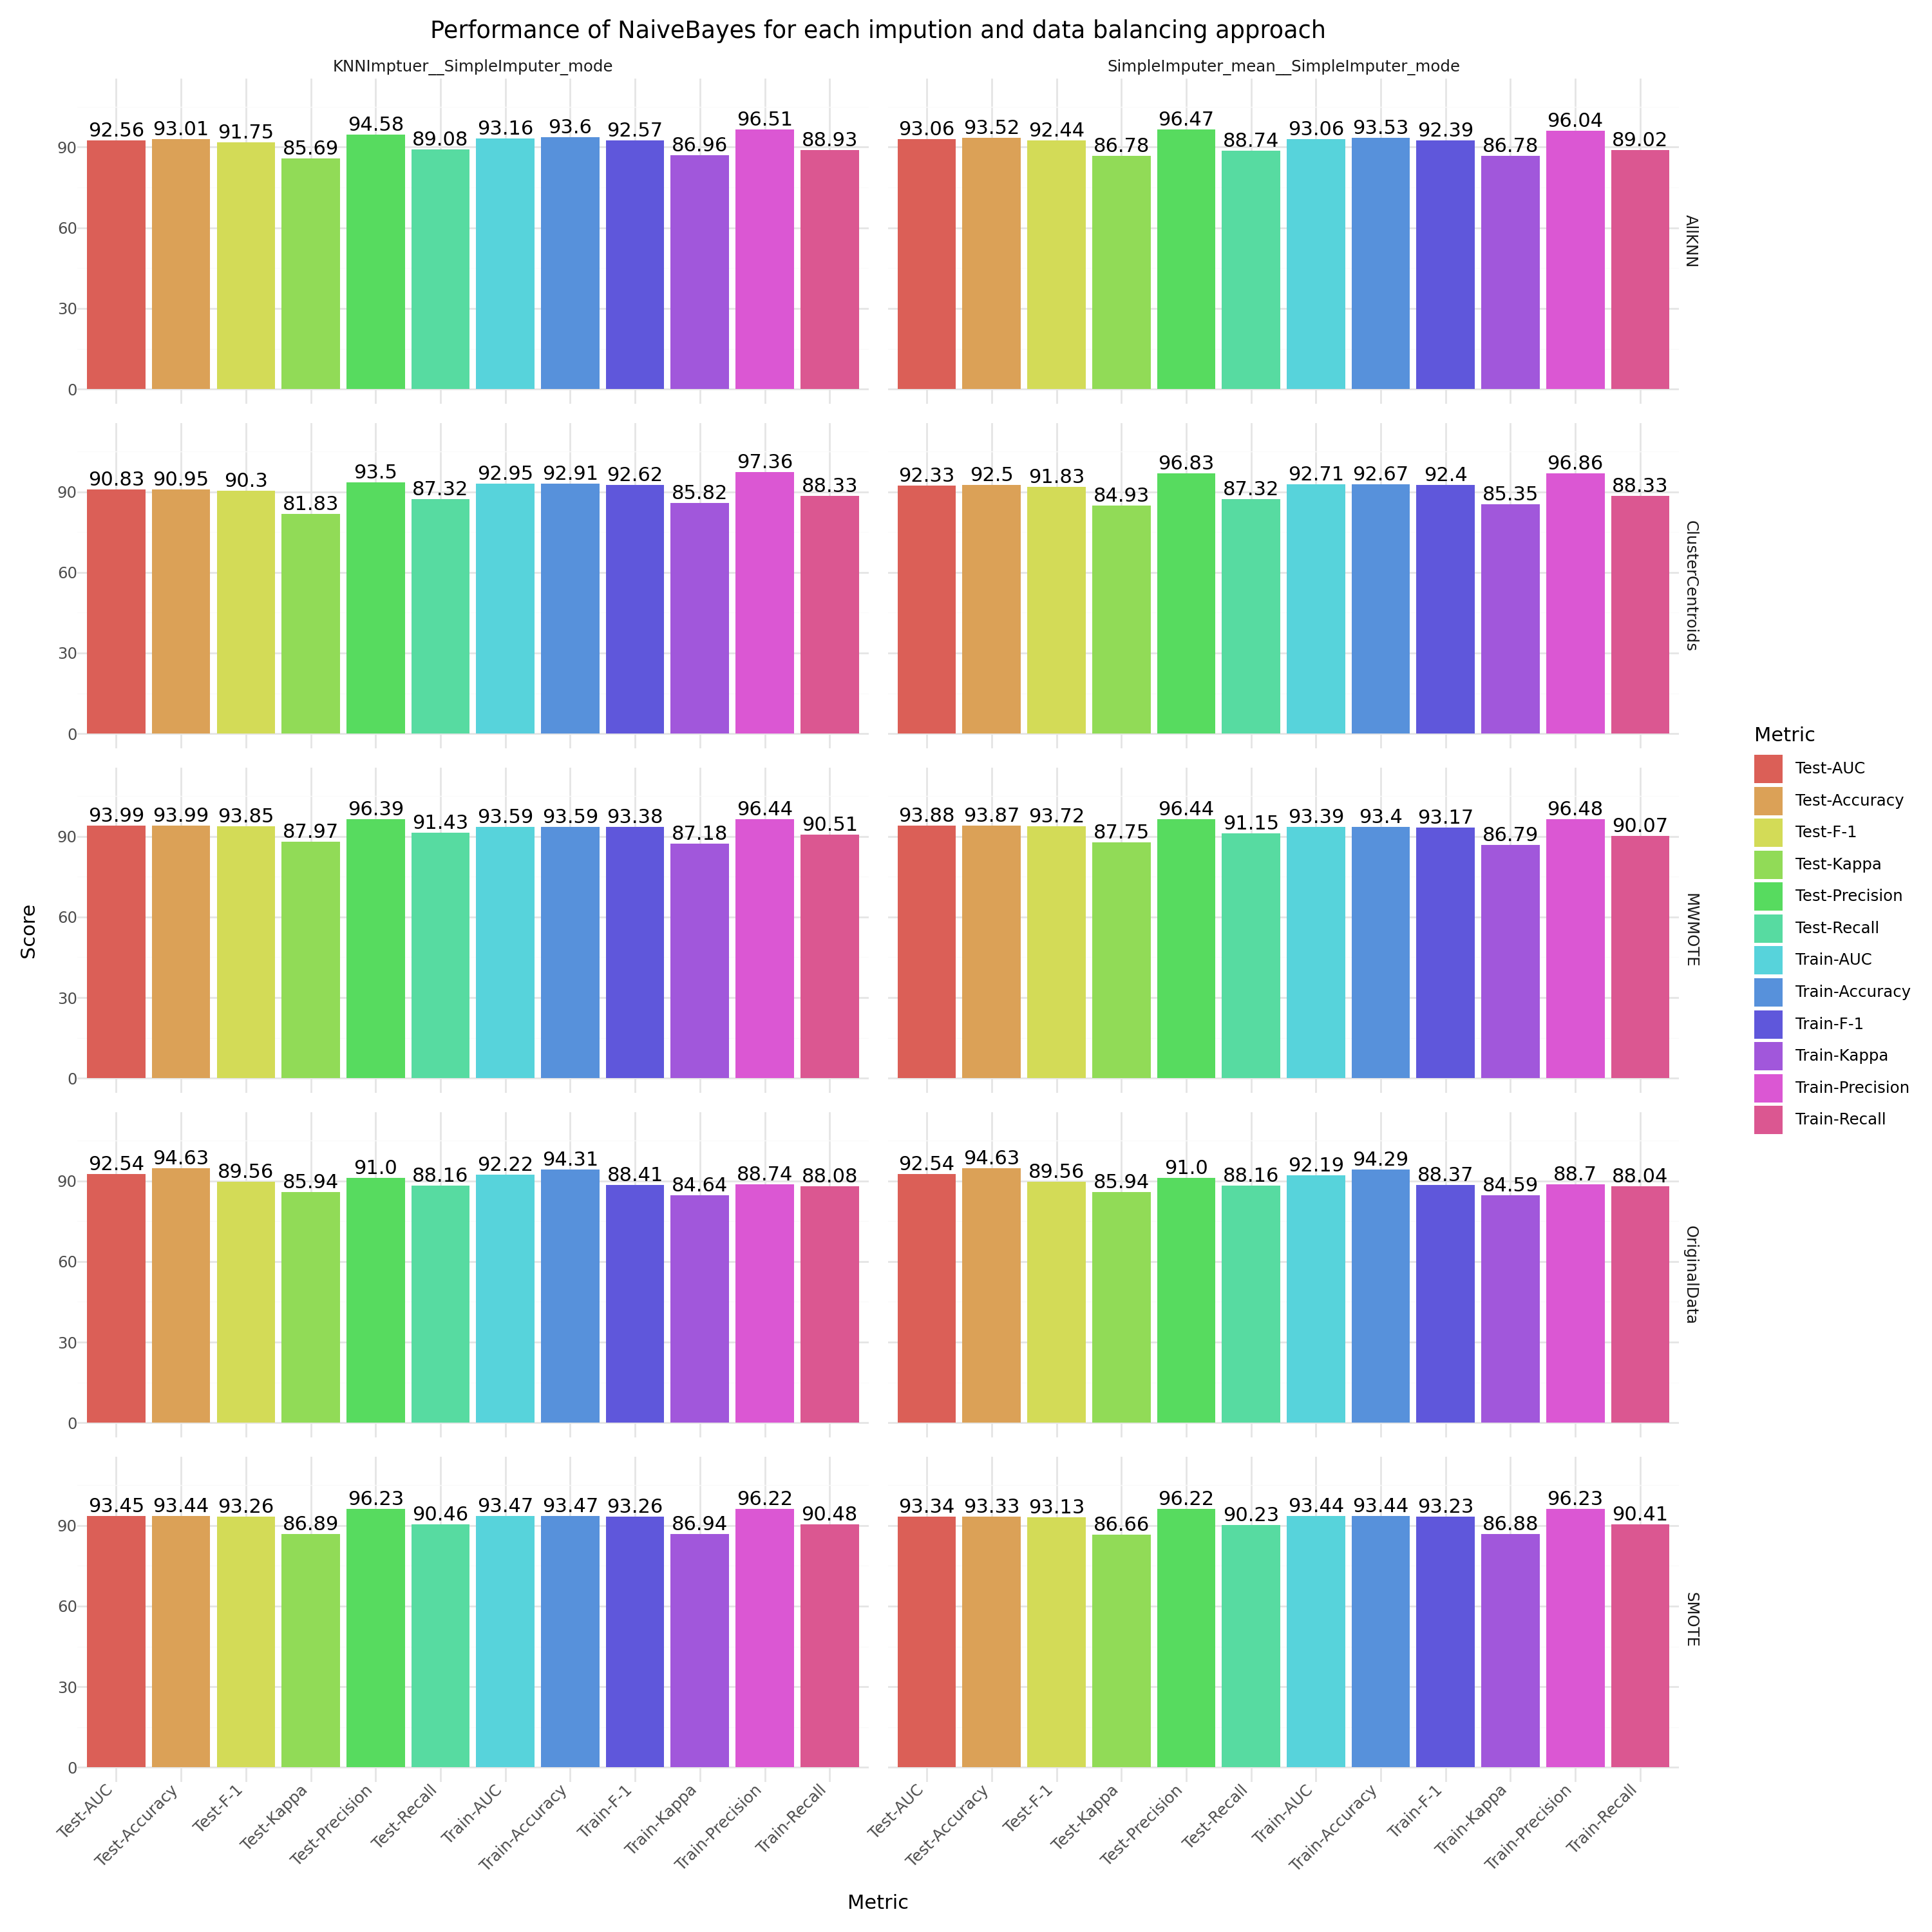

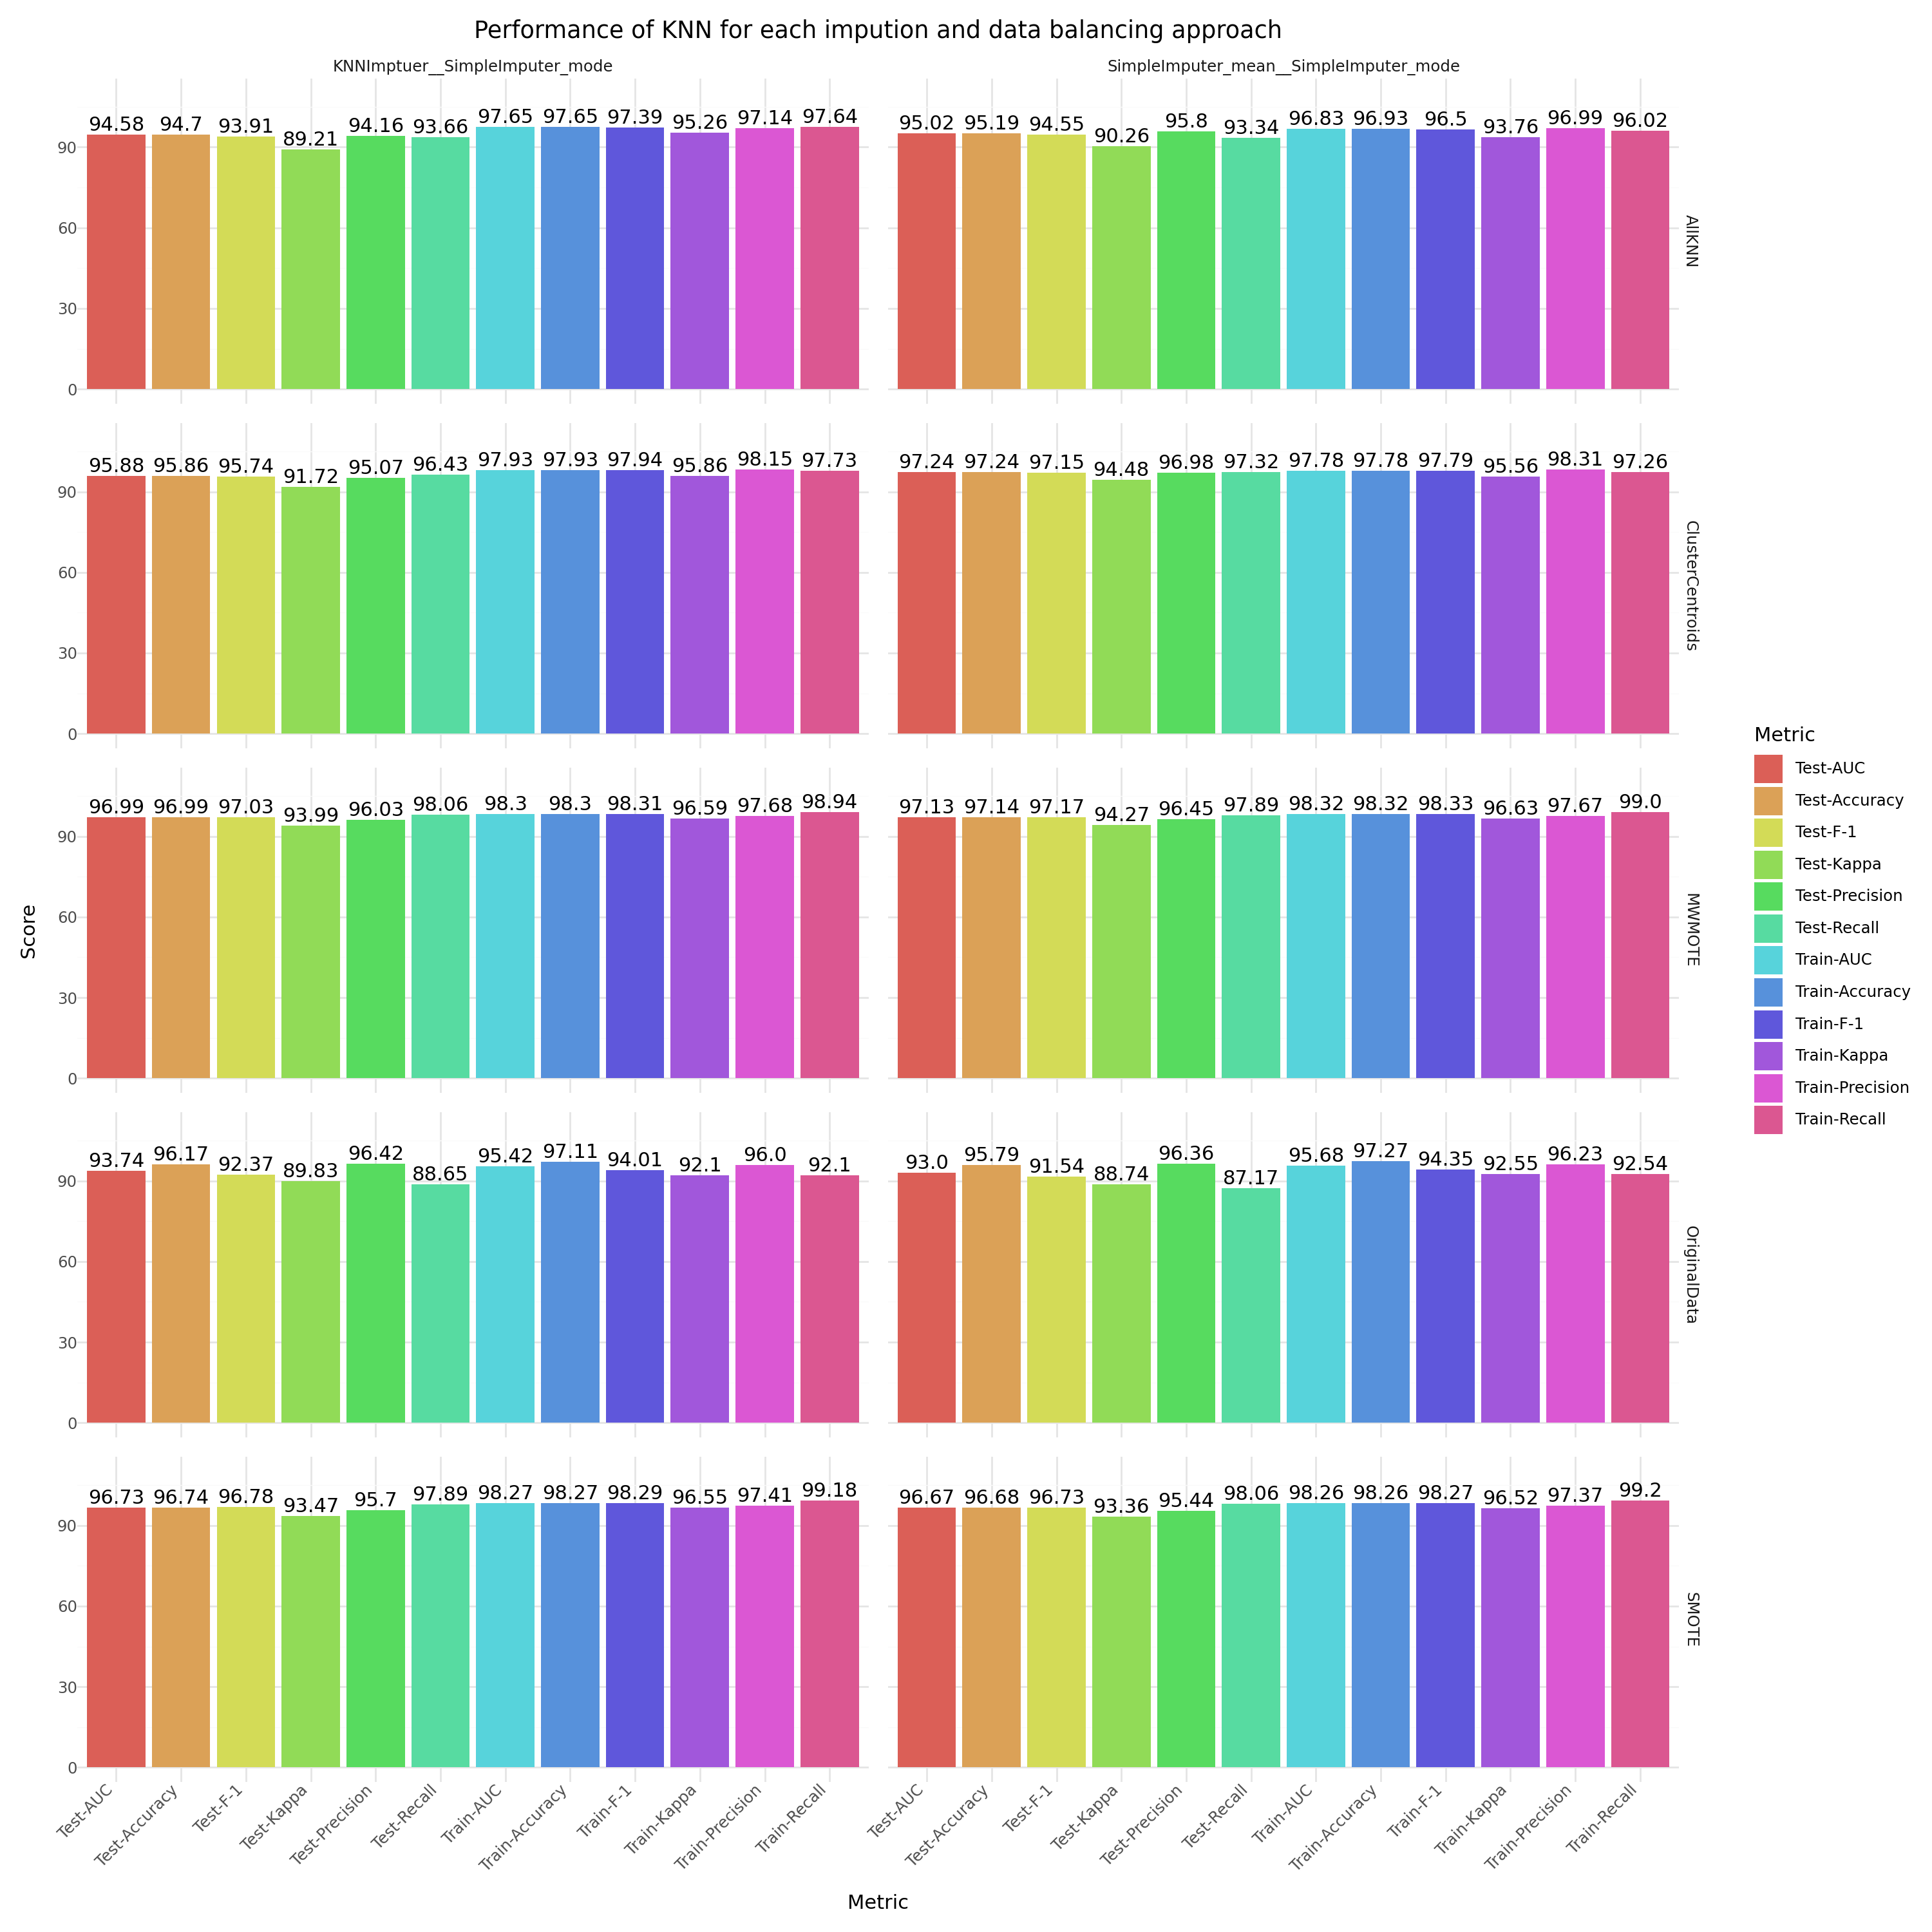

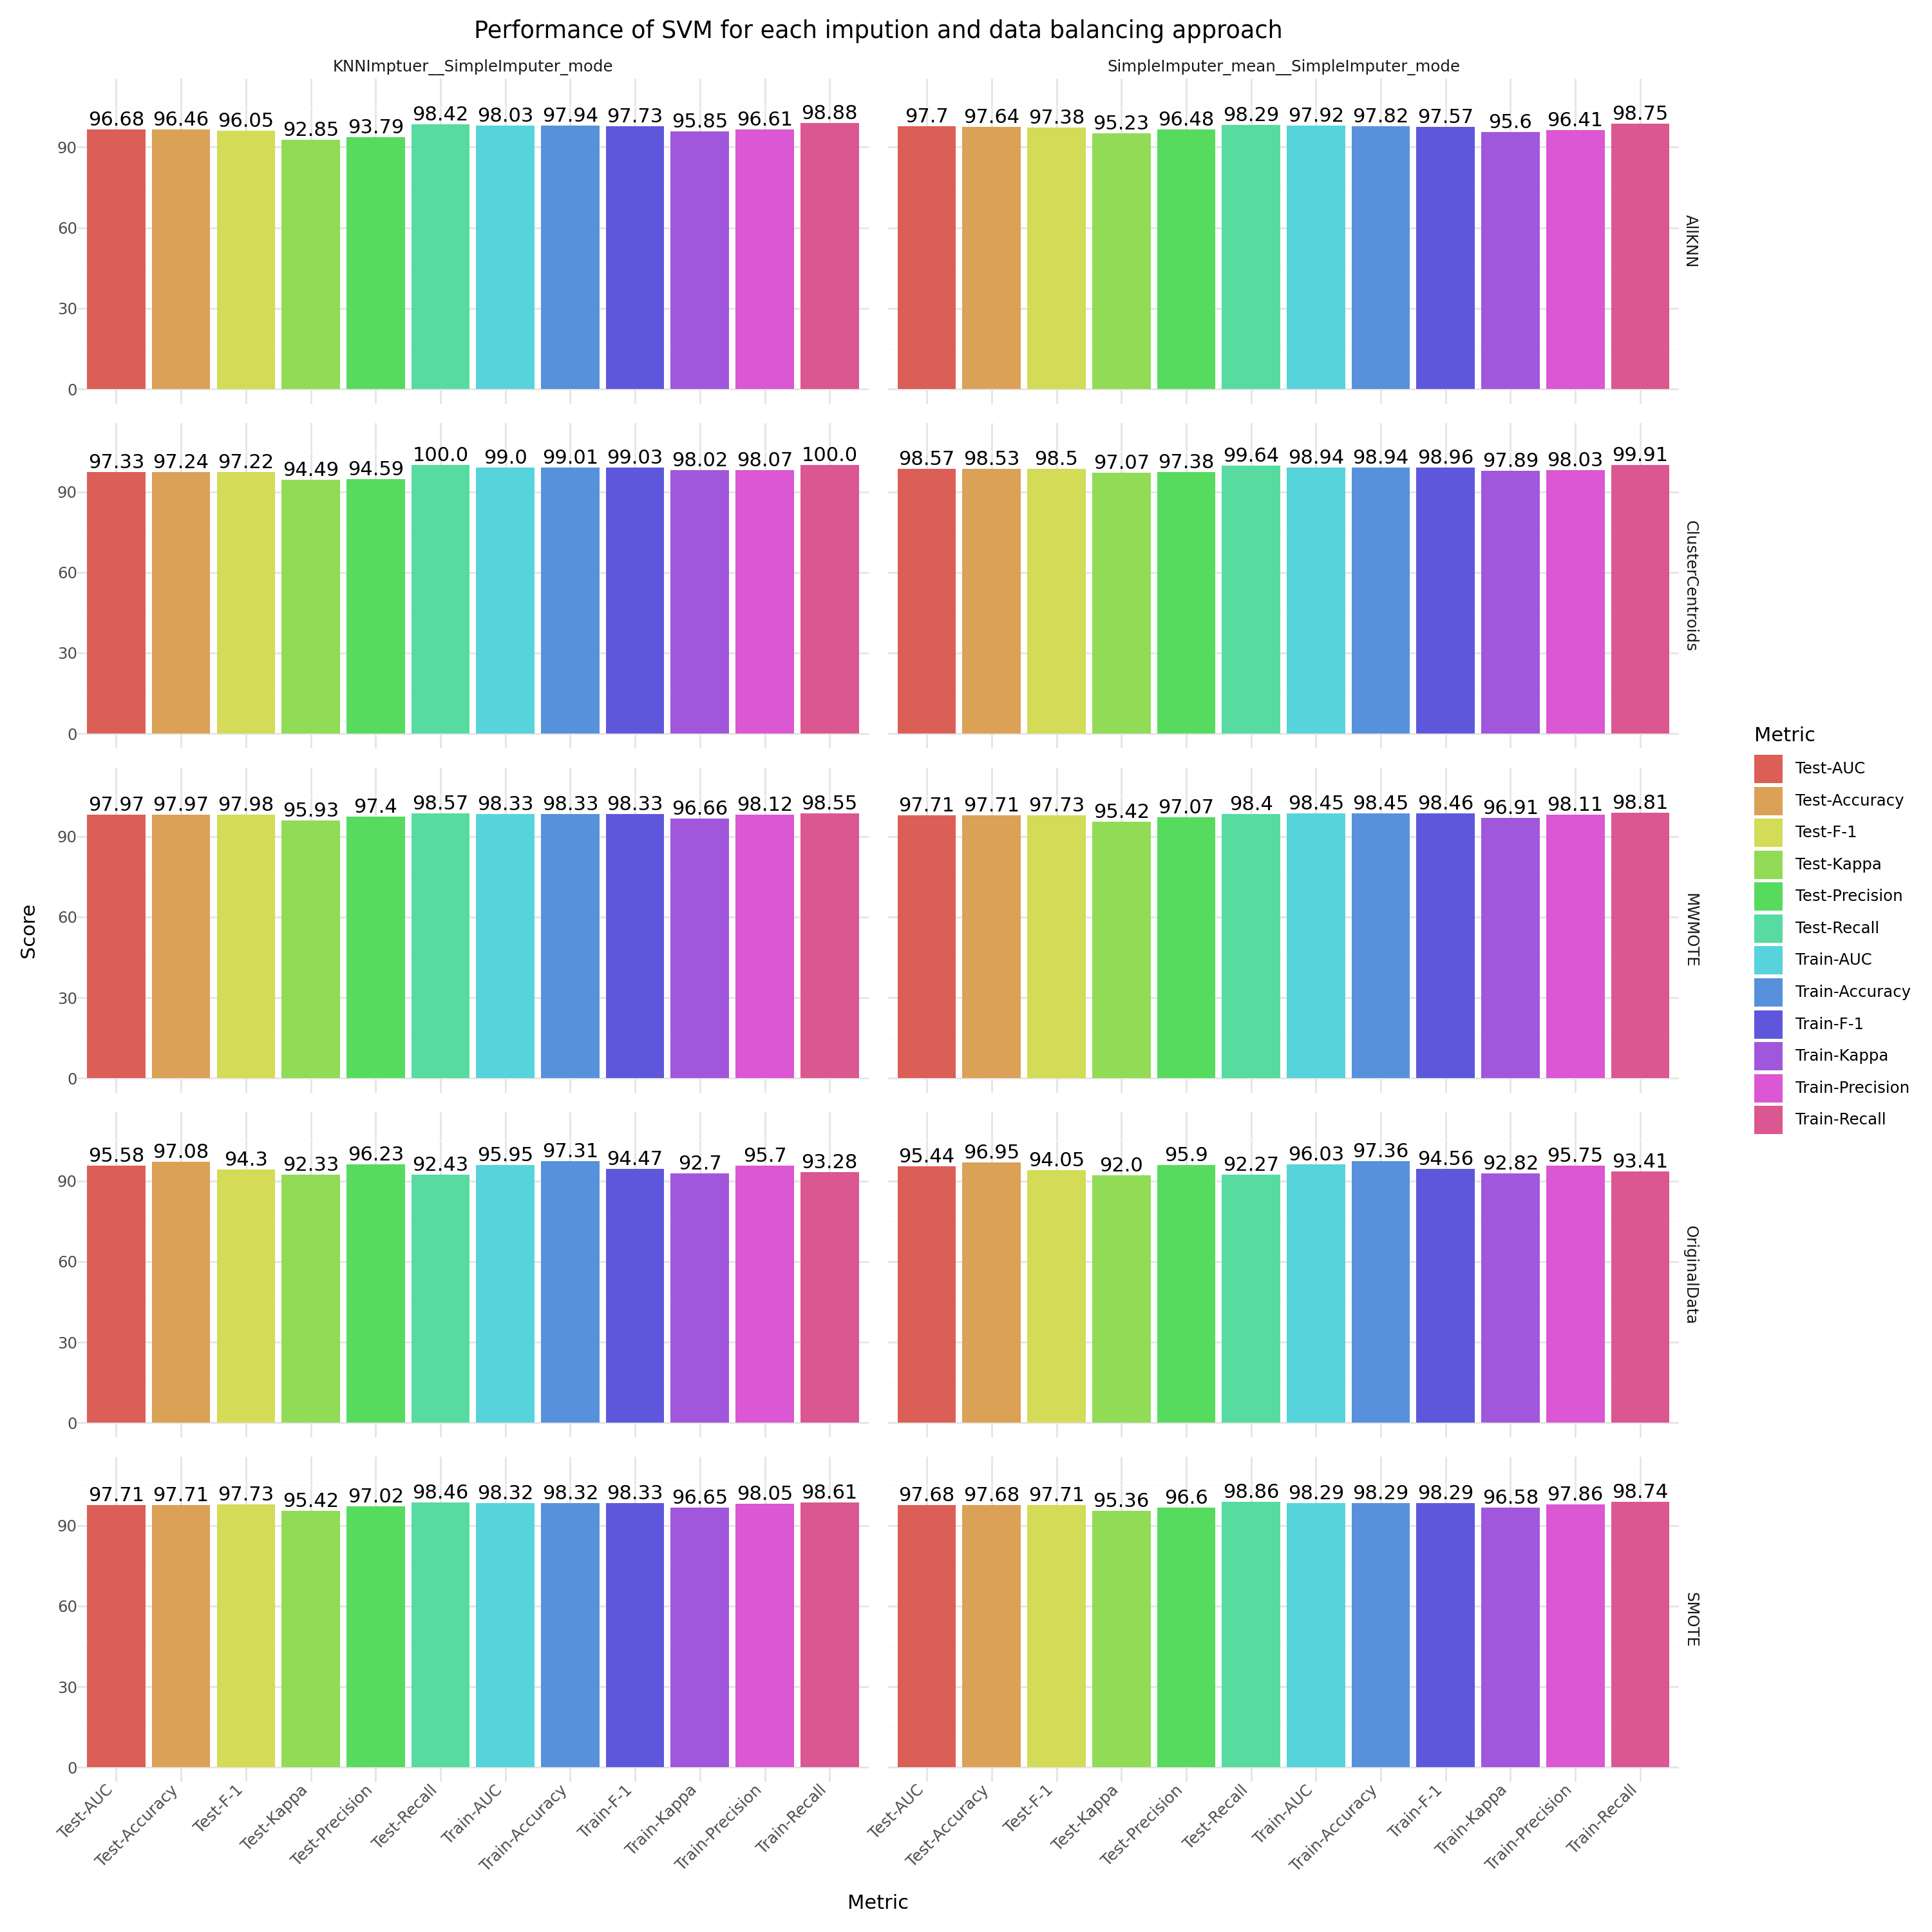

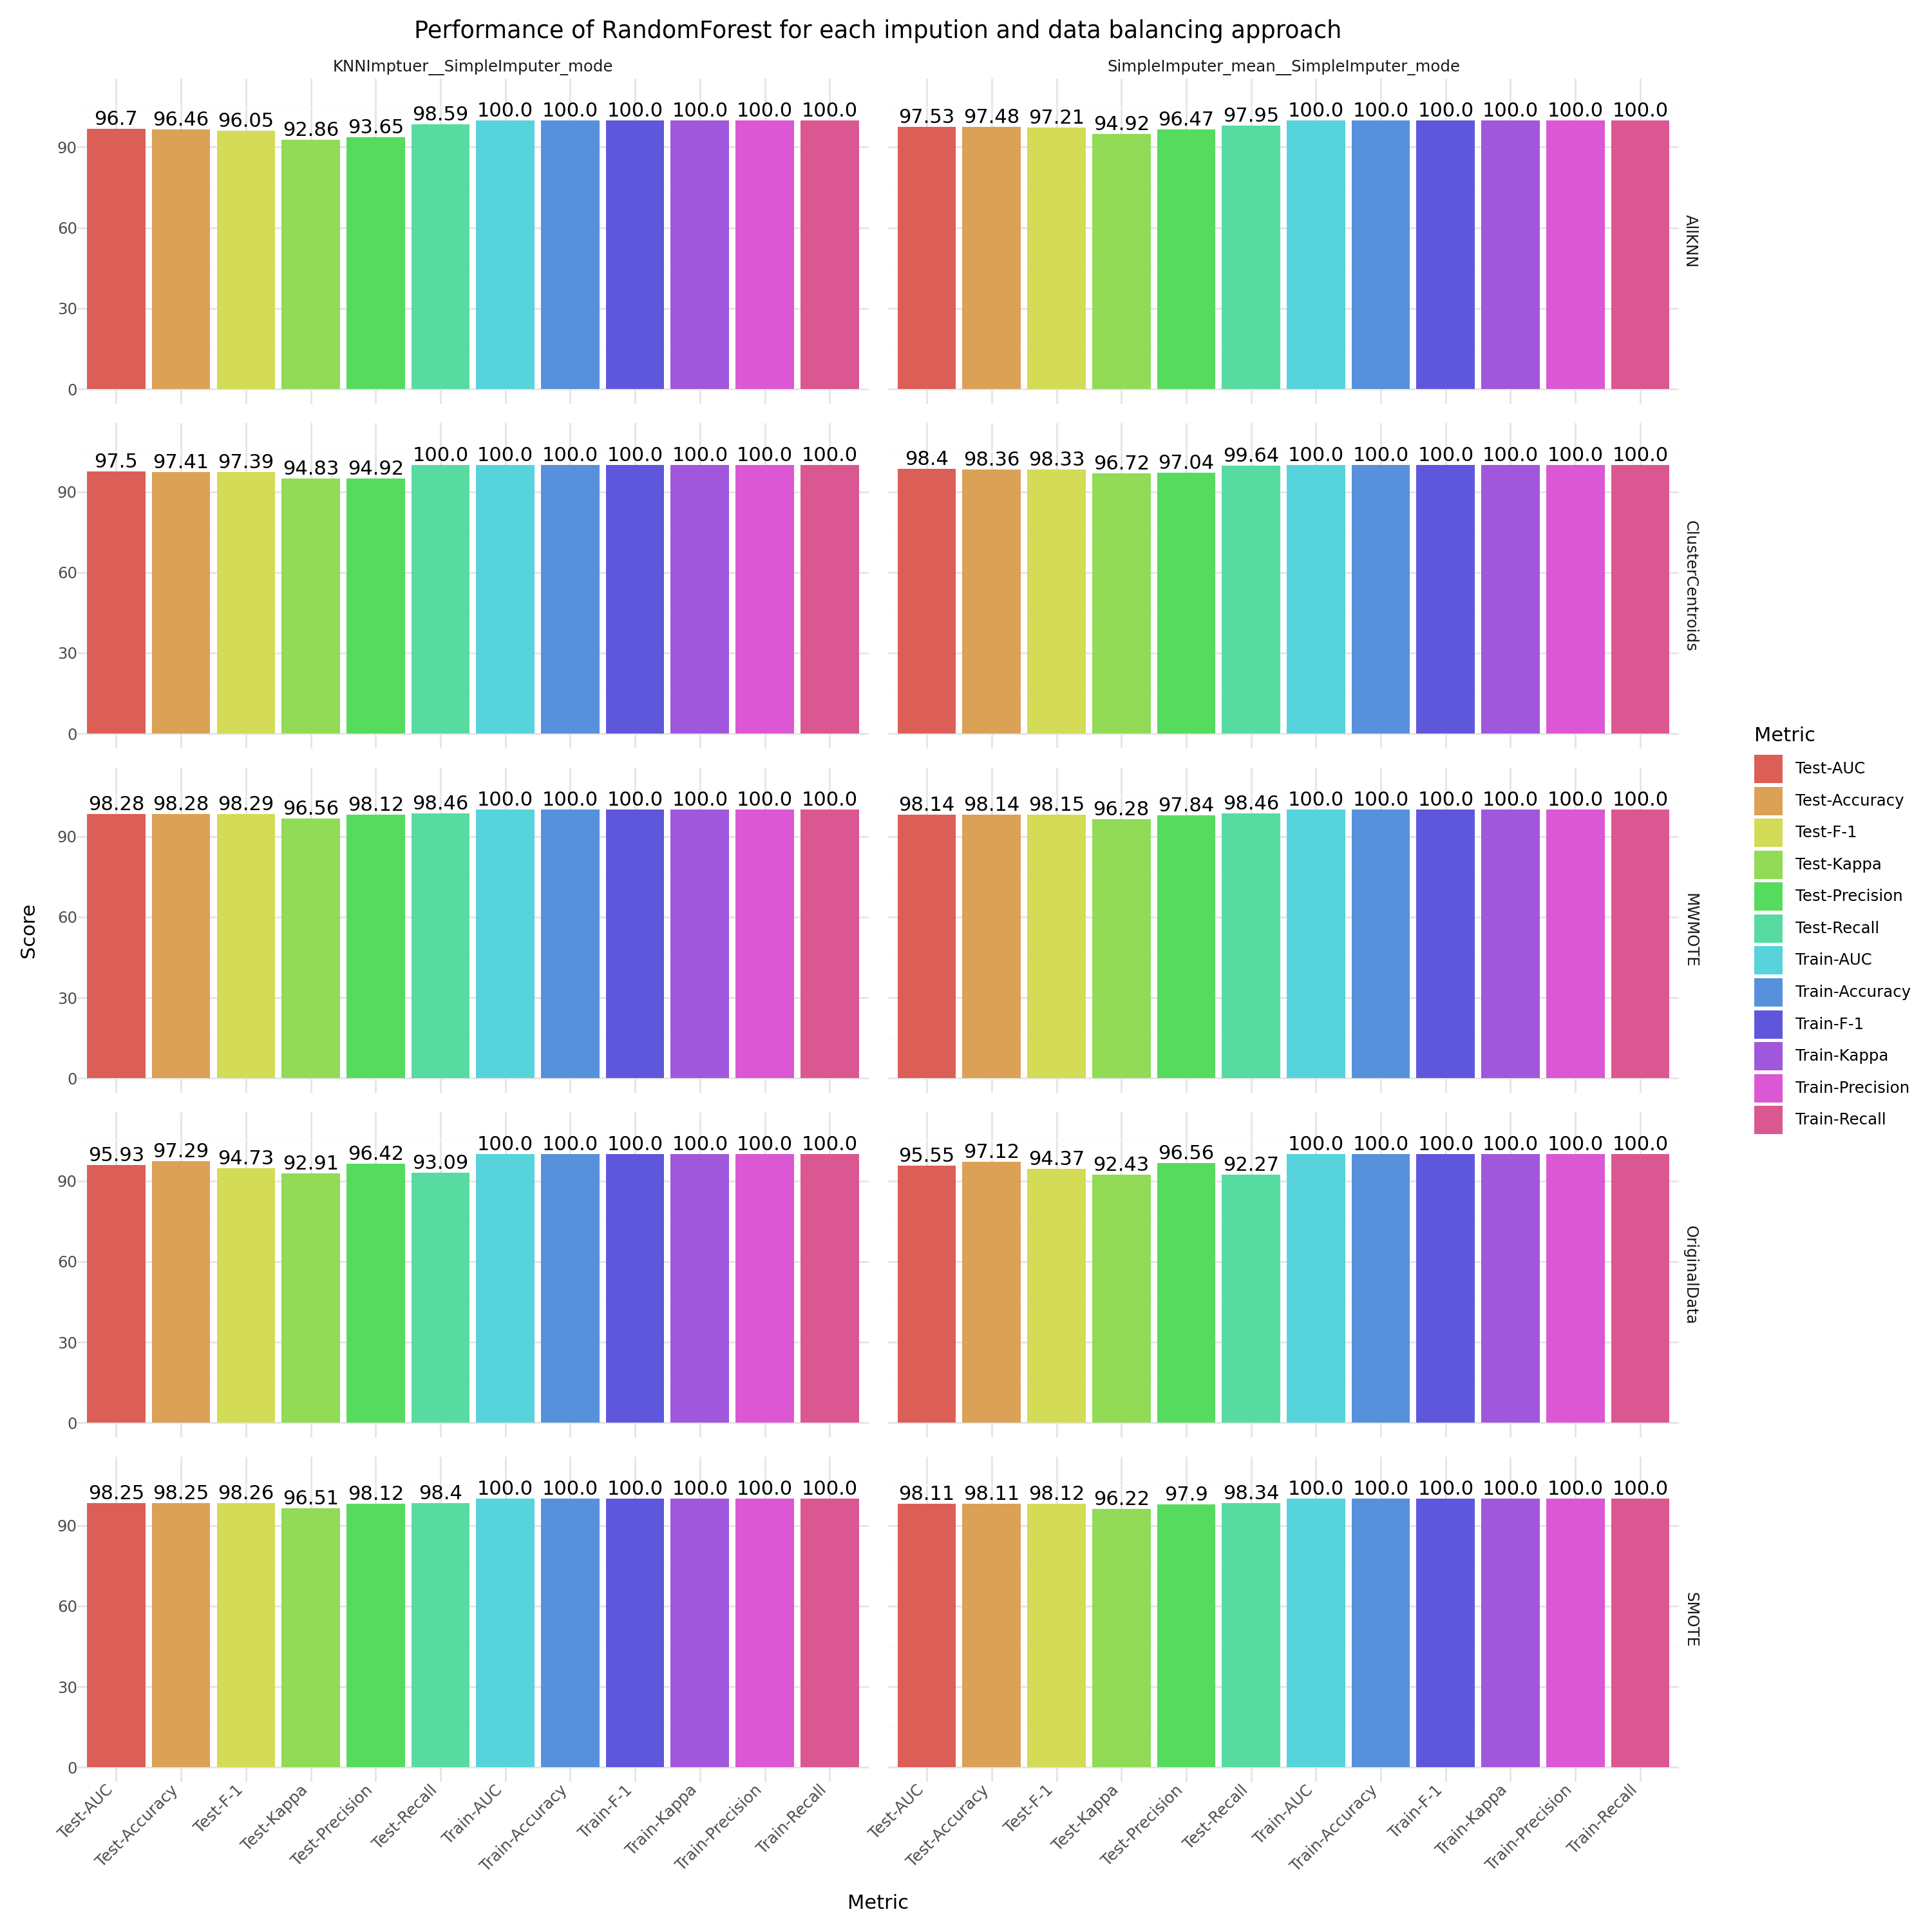

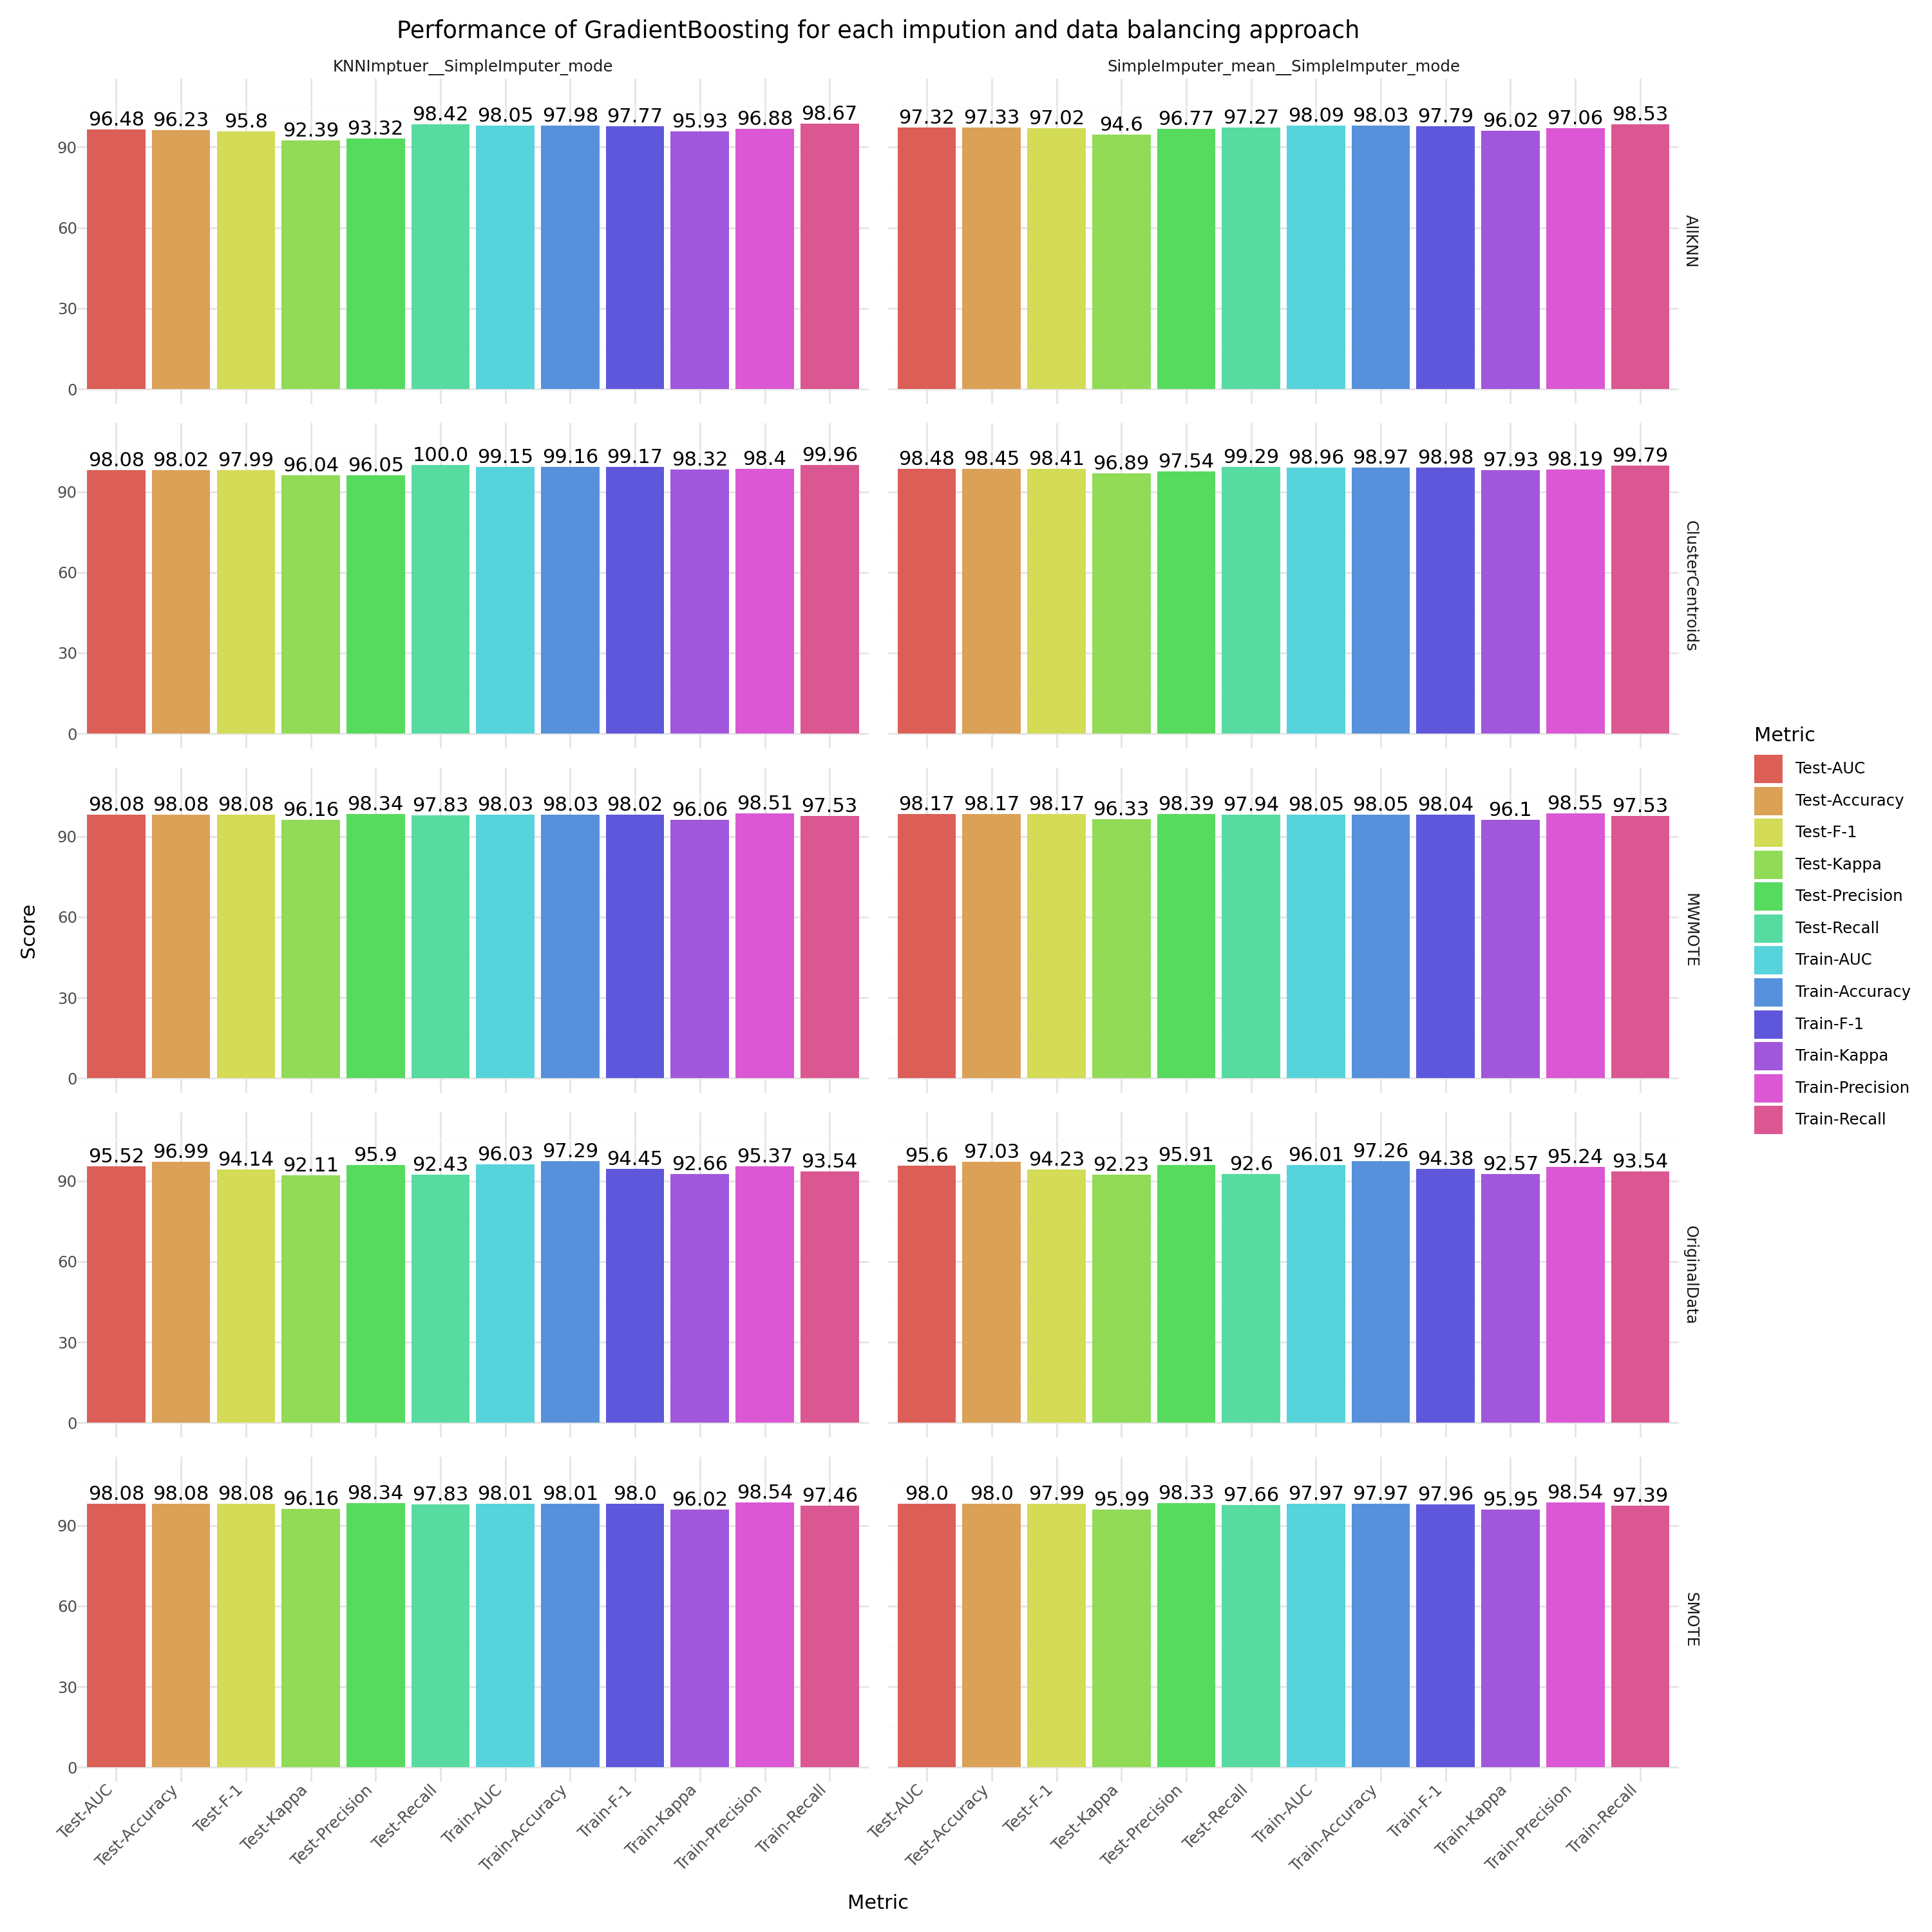

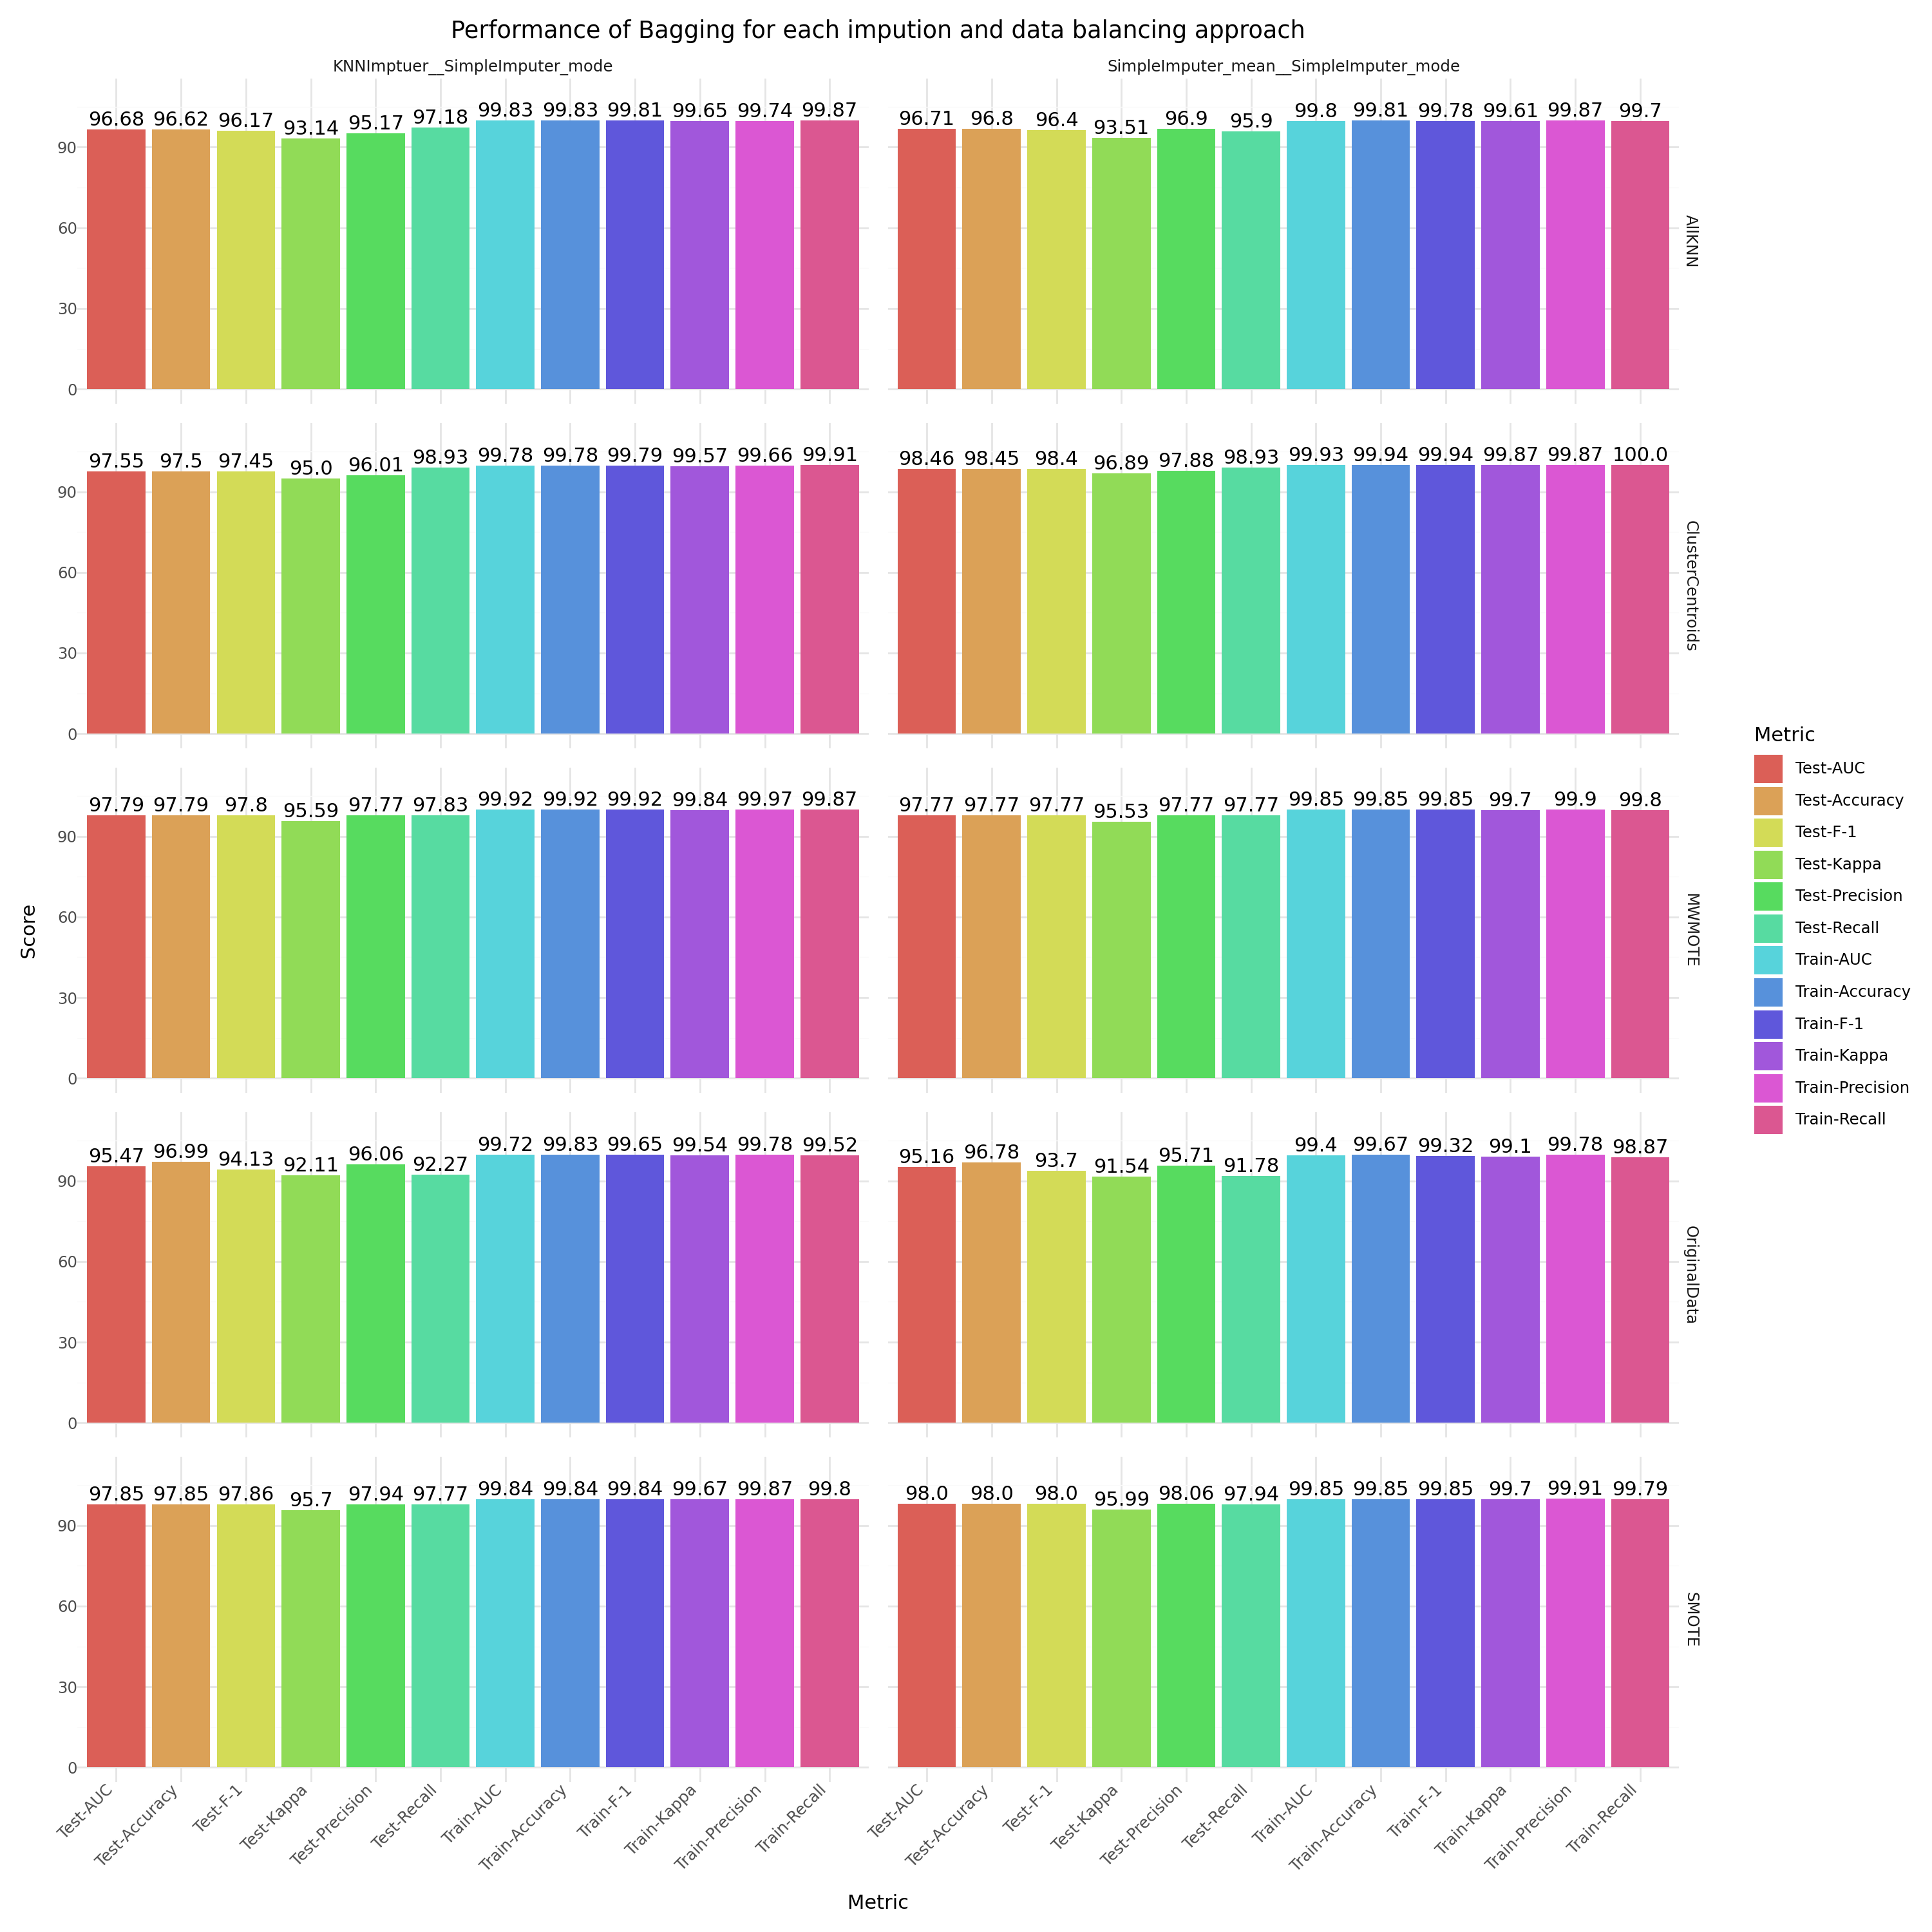

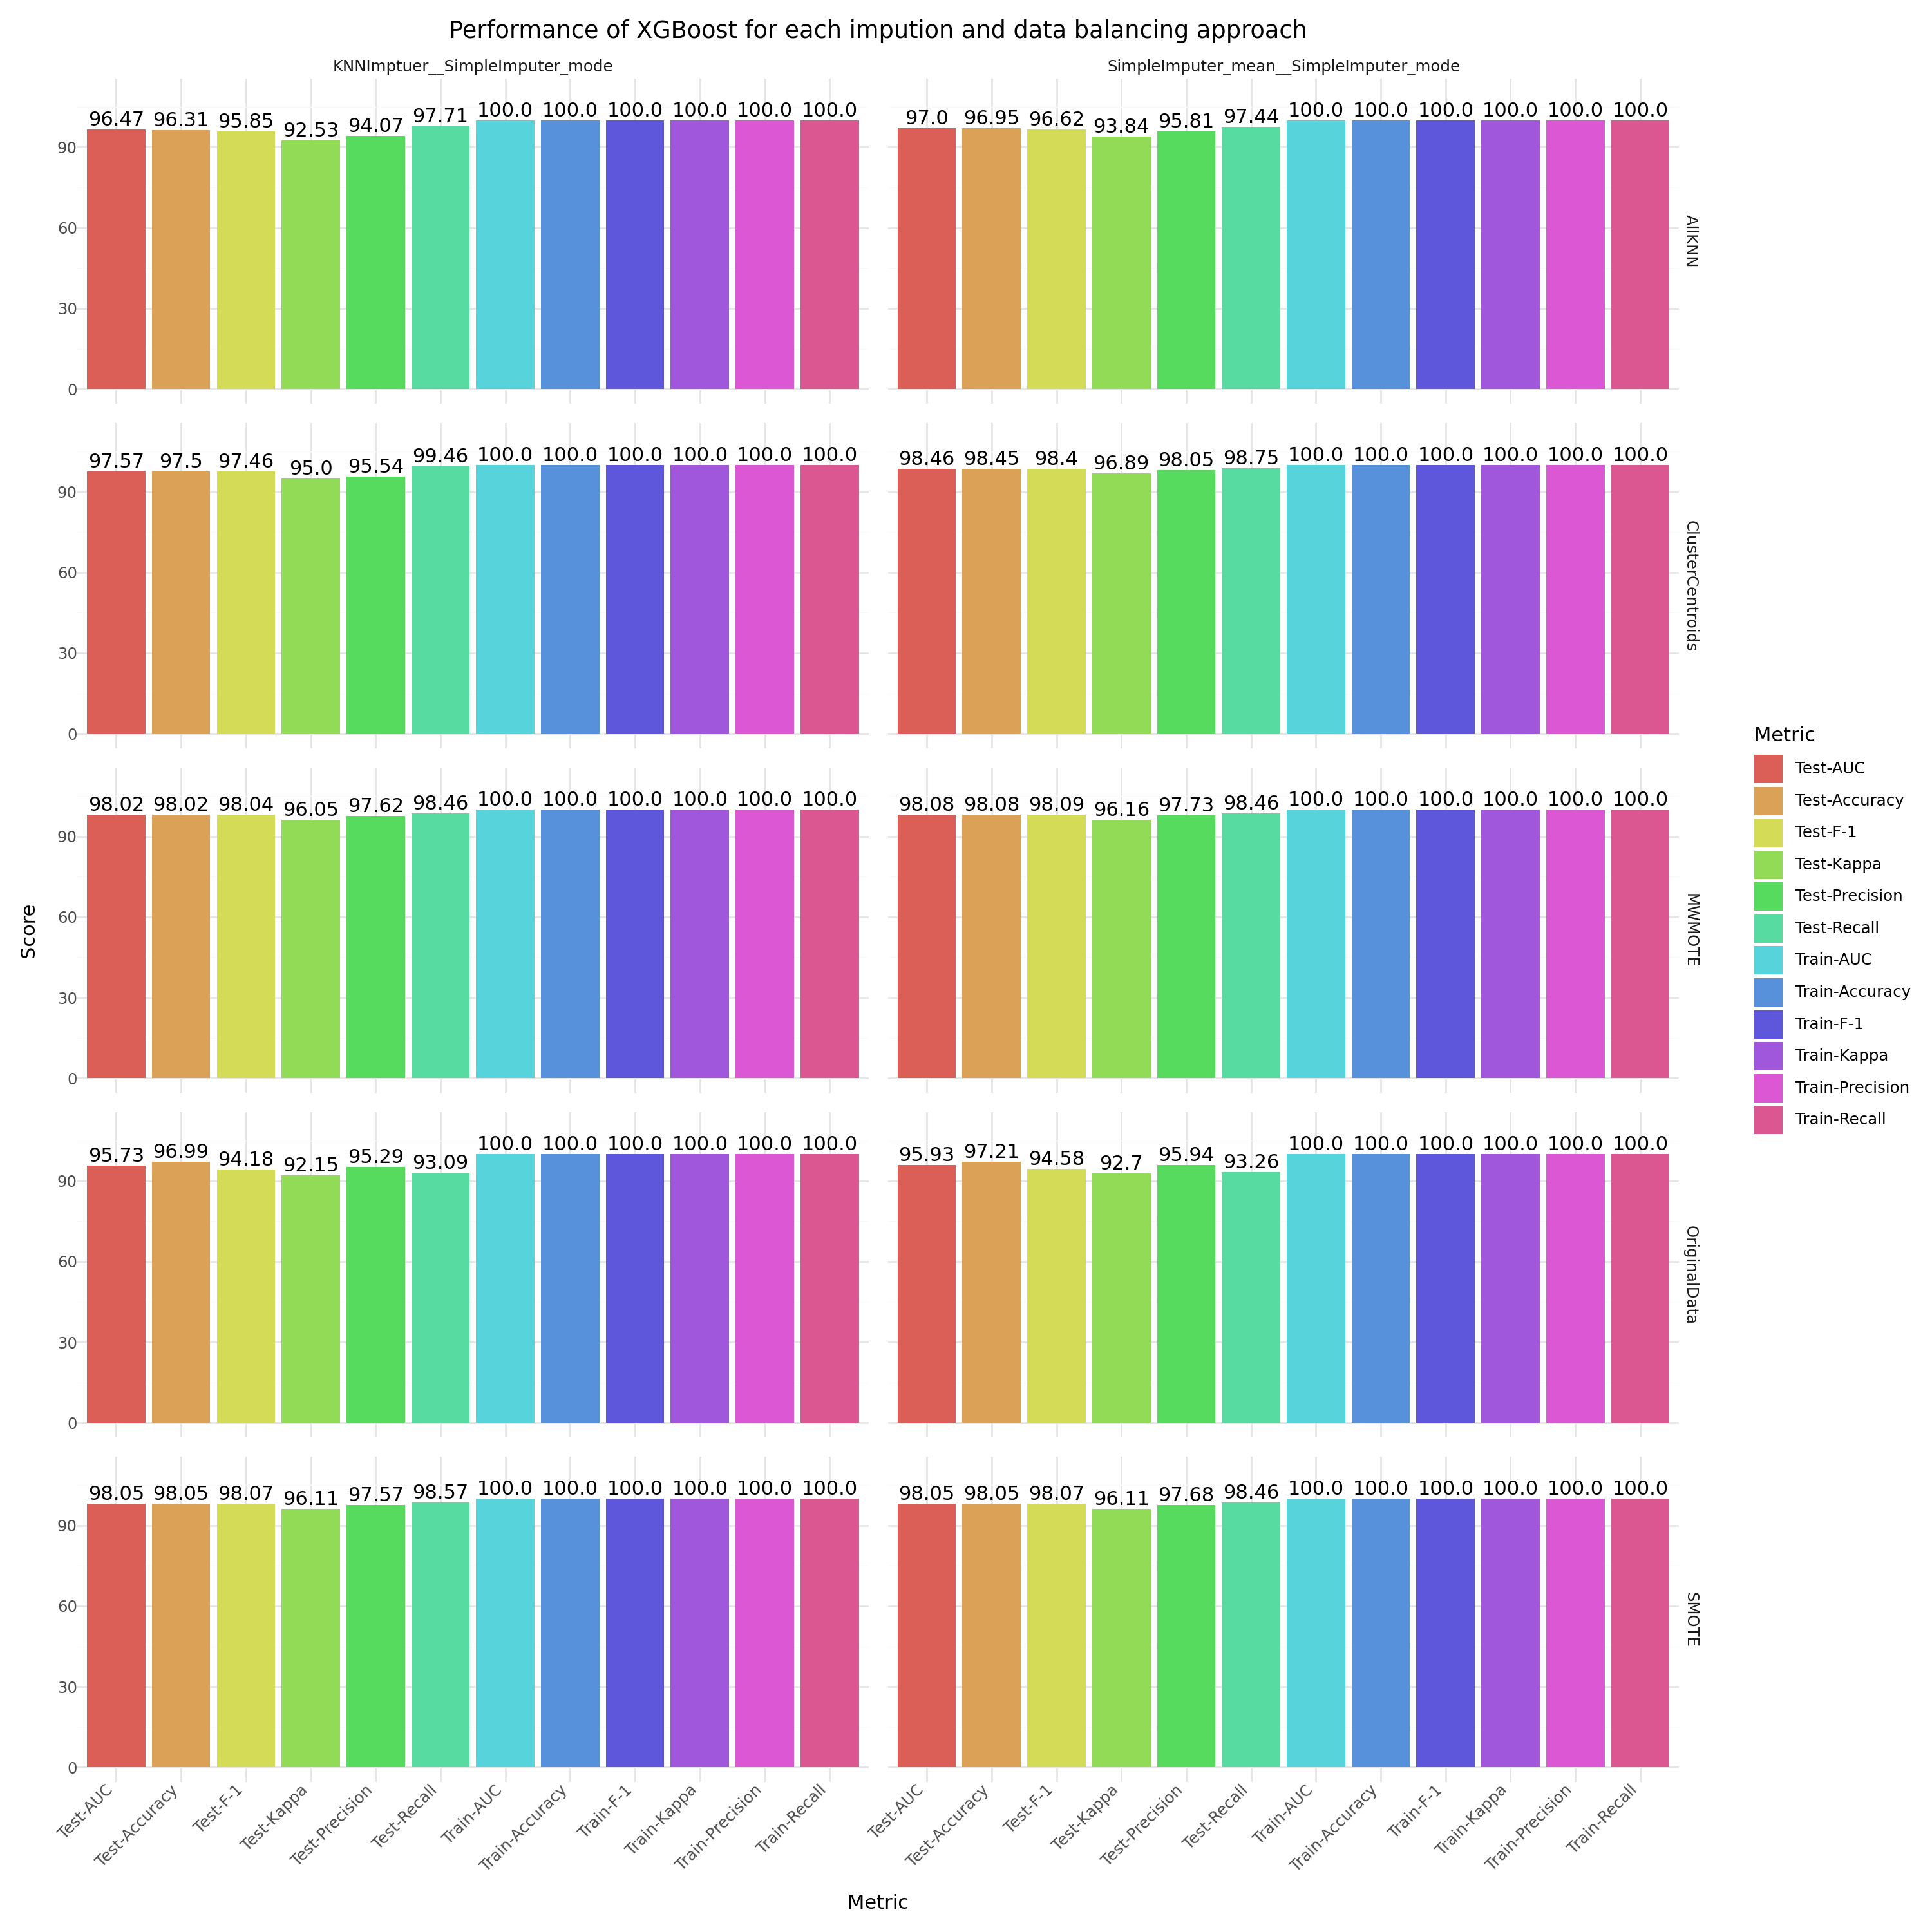

In [8]:
# performance for each algorithm with combination of different imputing technique and balancing approach
plot_for_each_algorithm(performances_df)

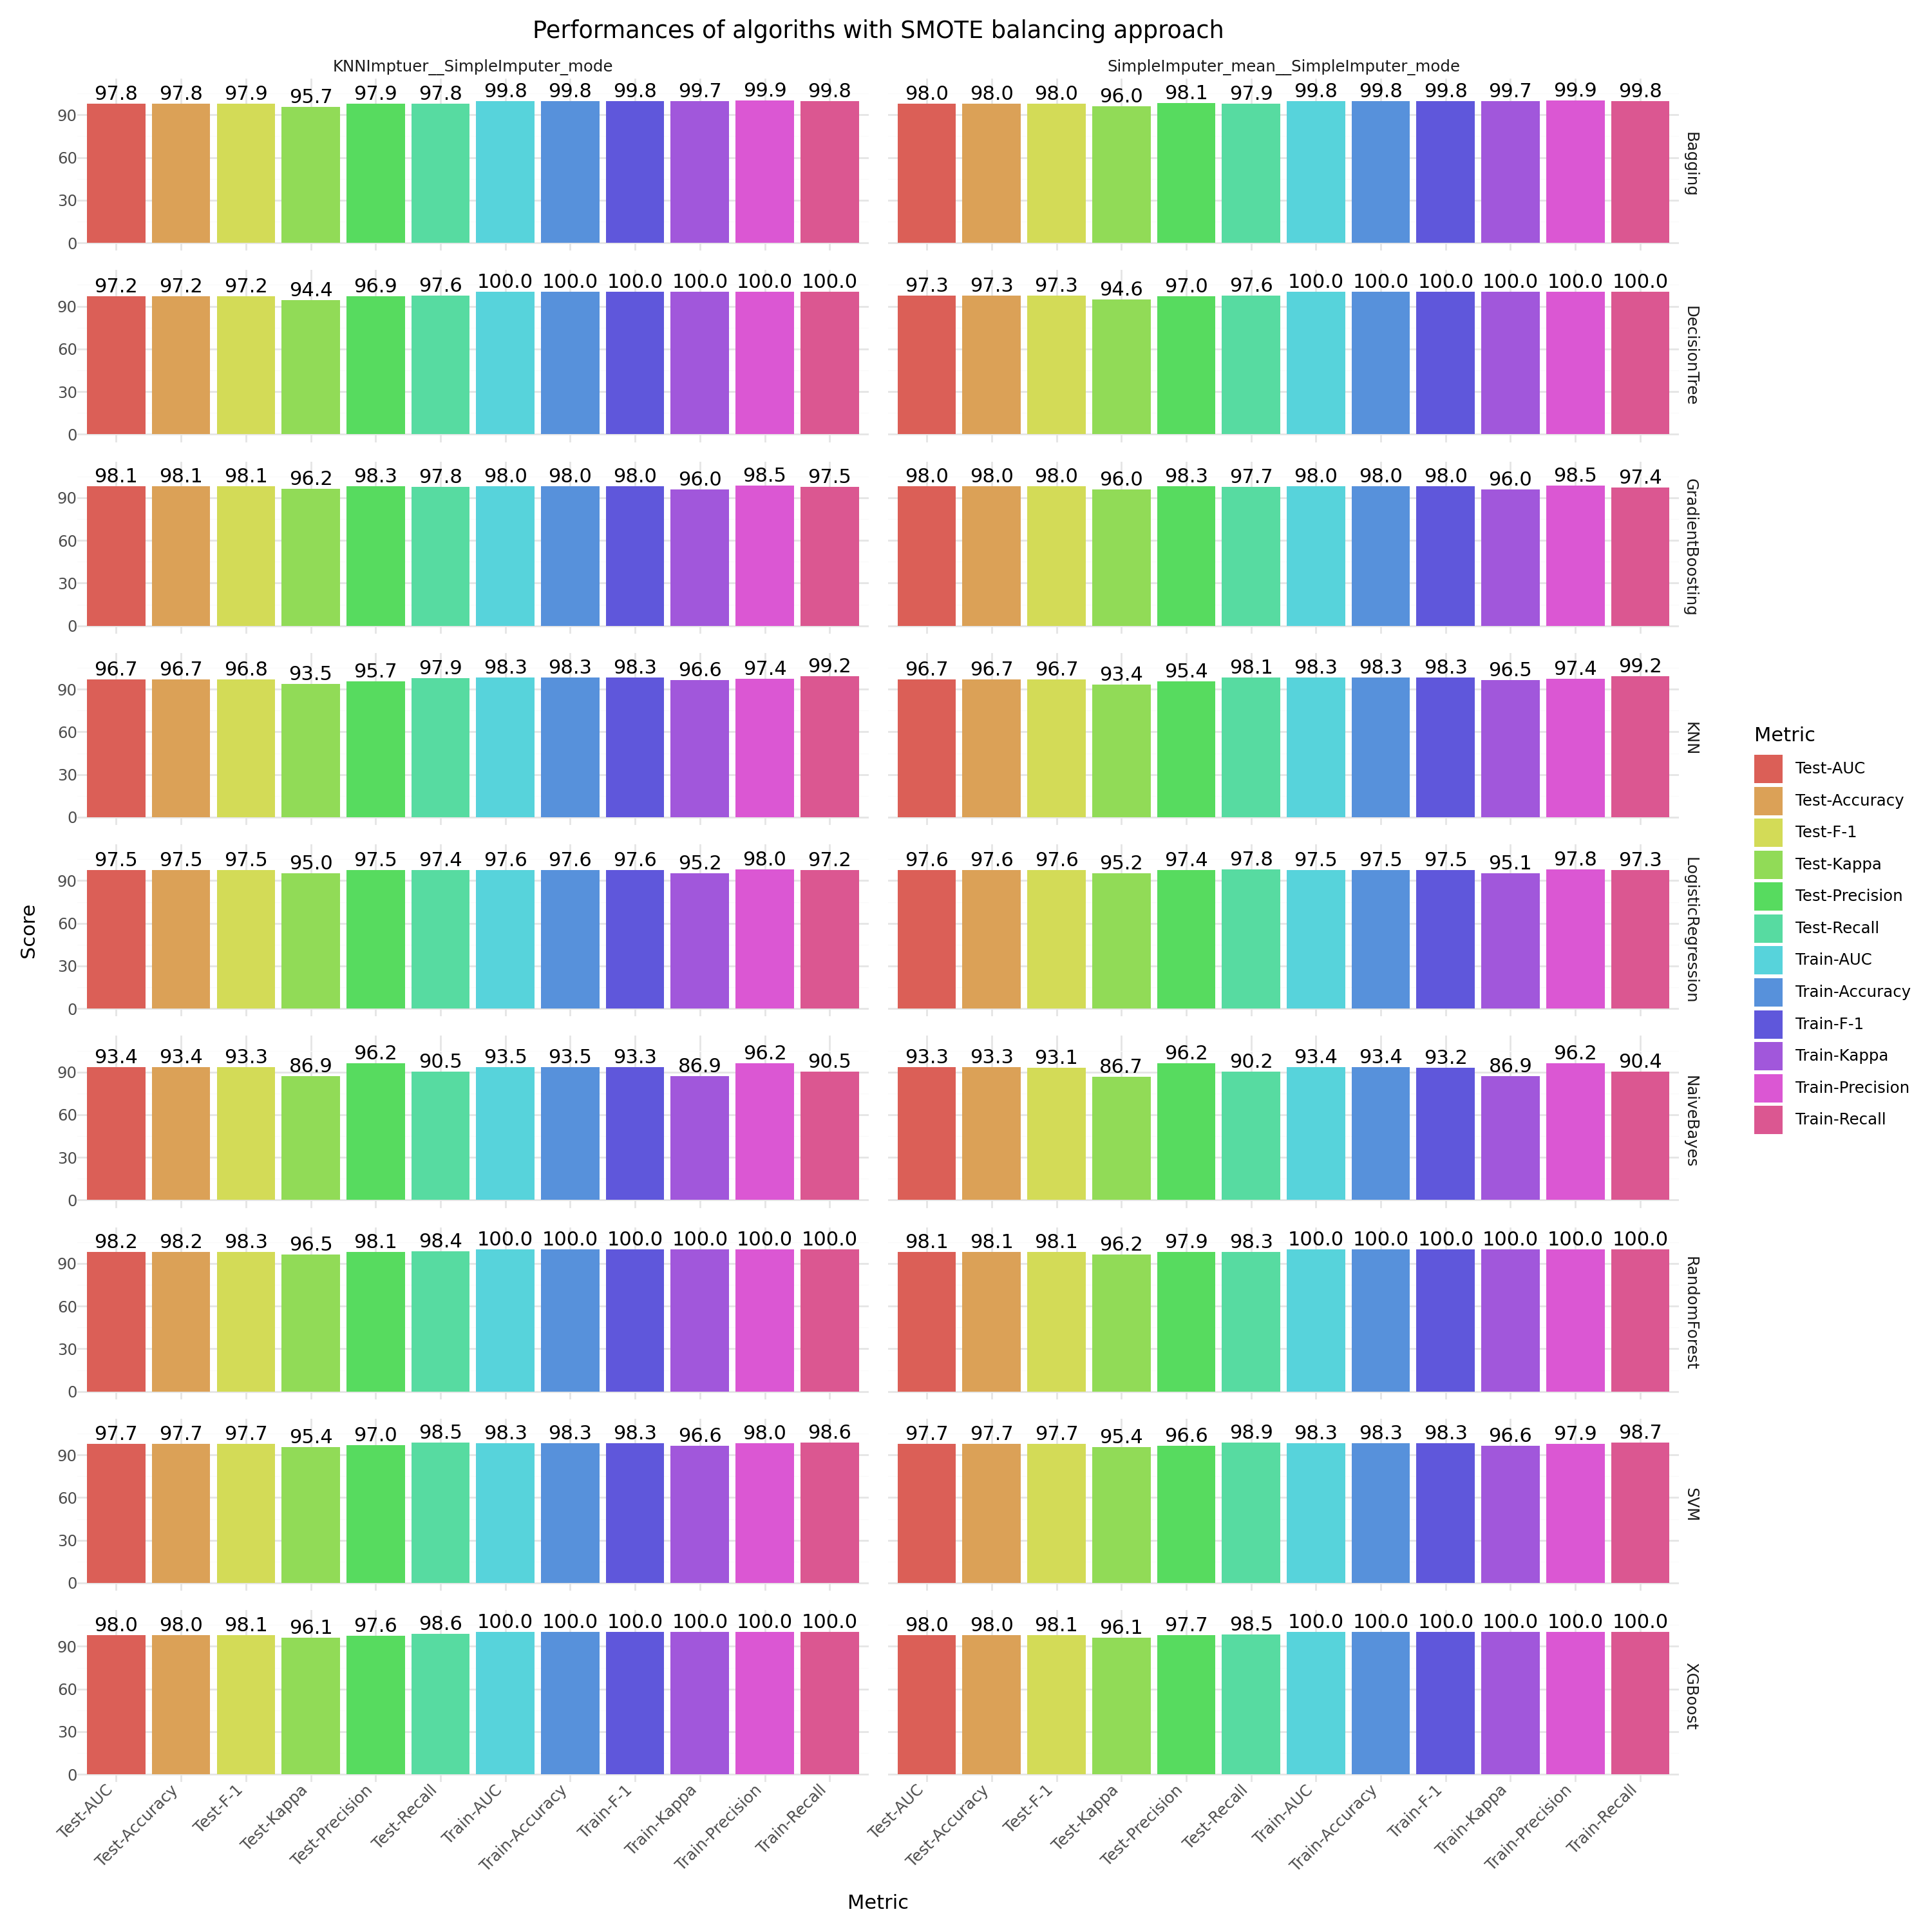

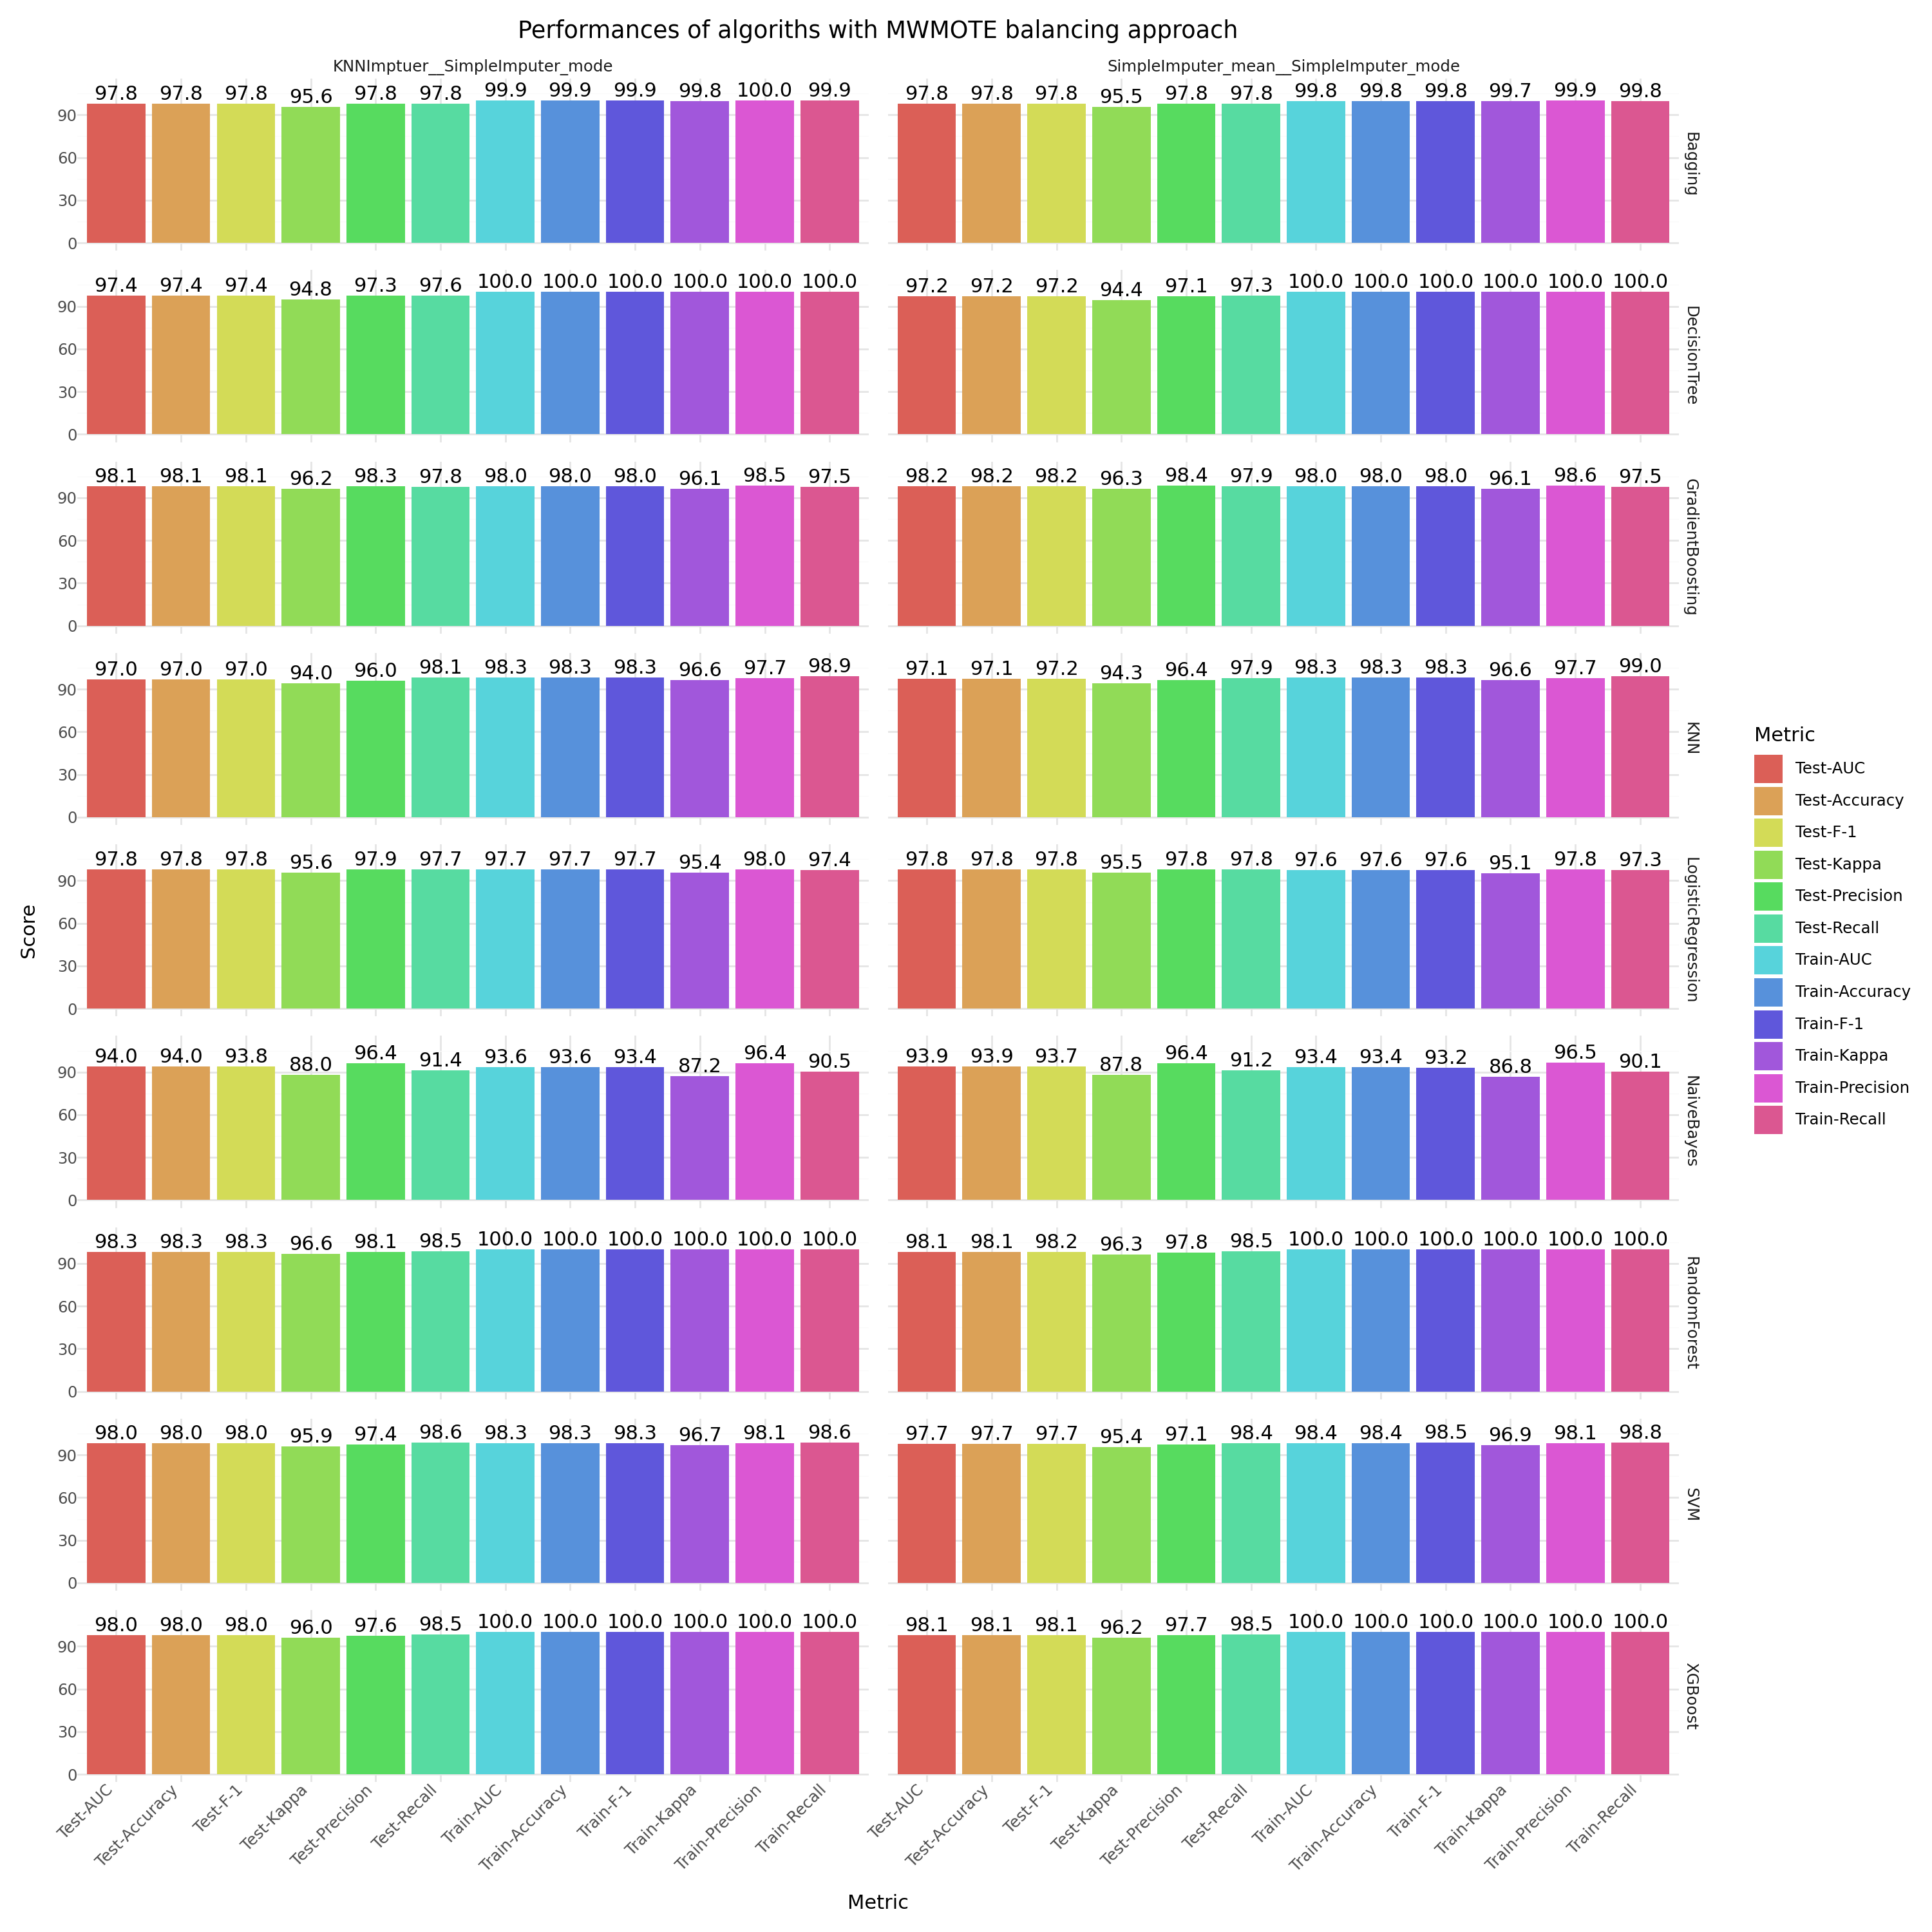

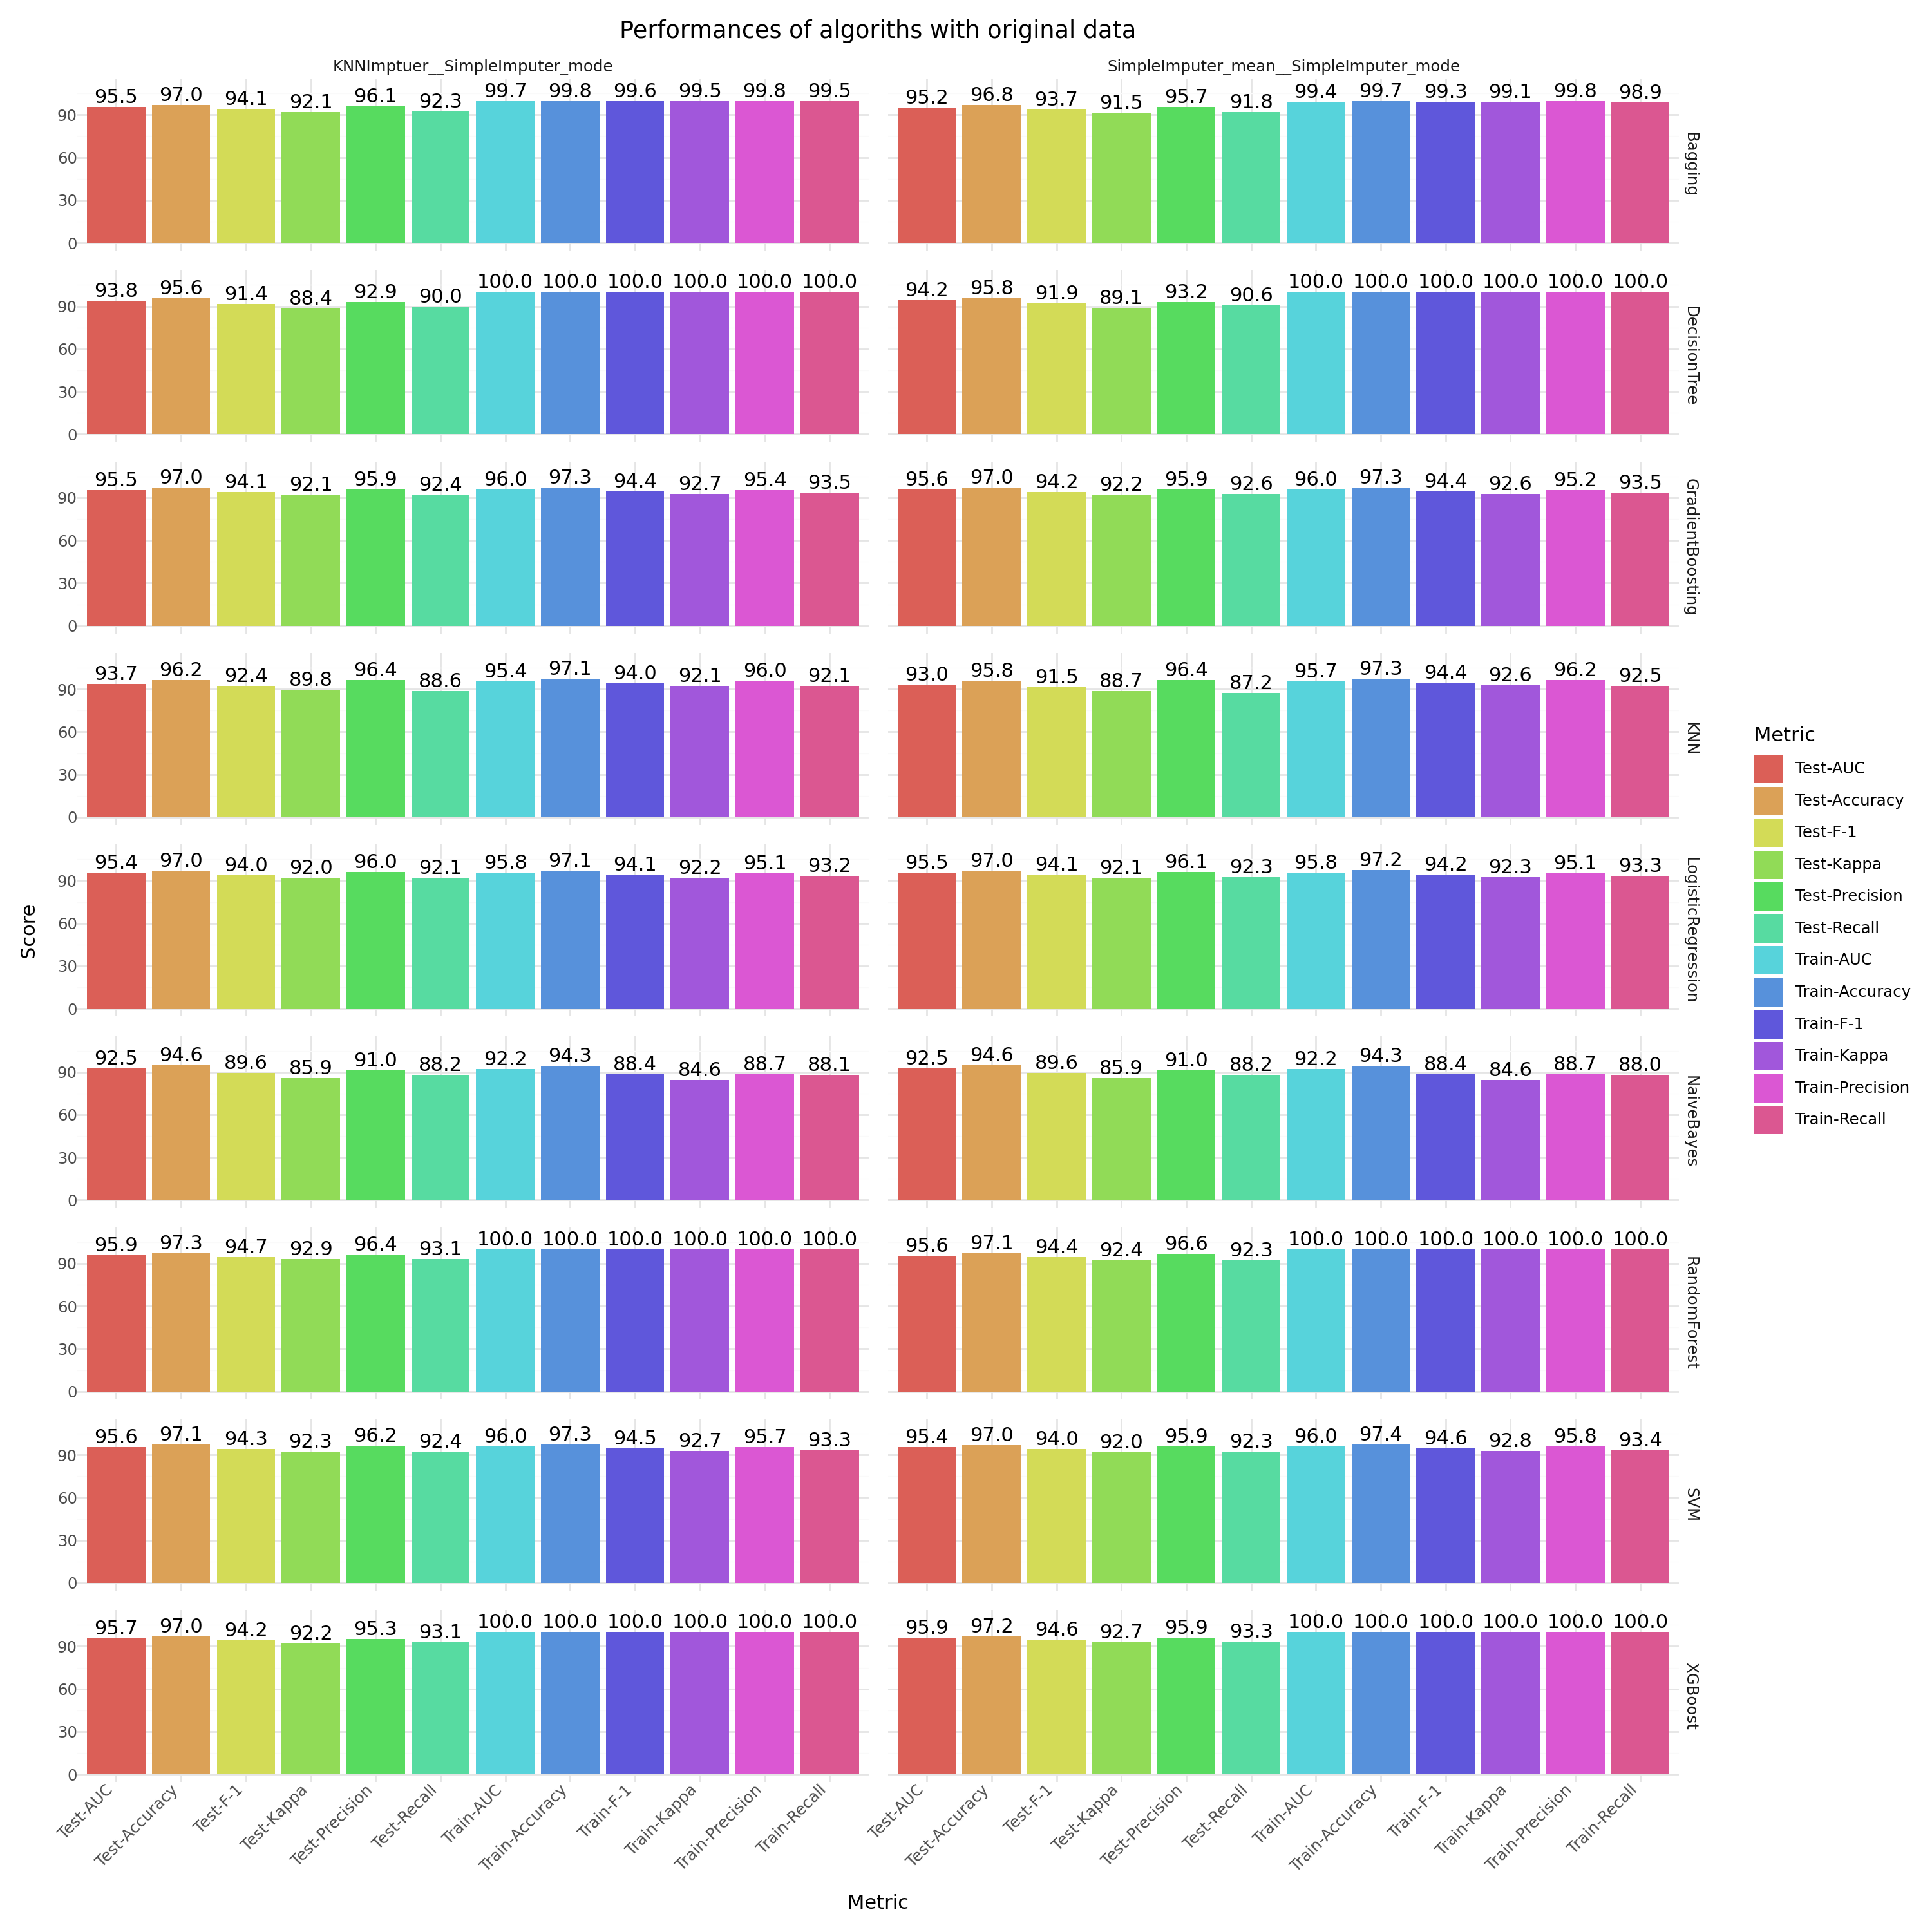

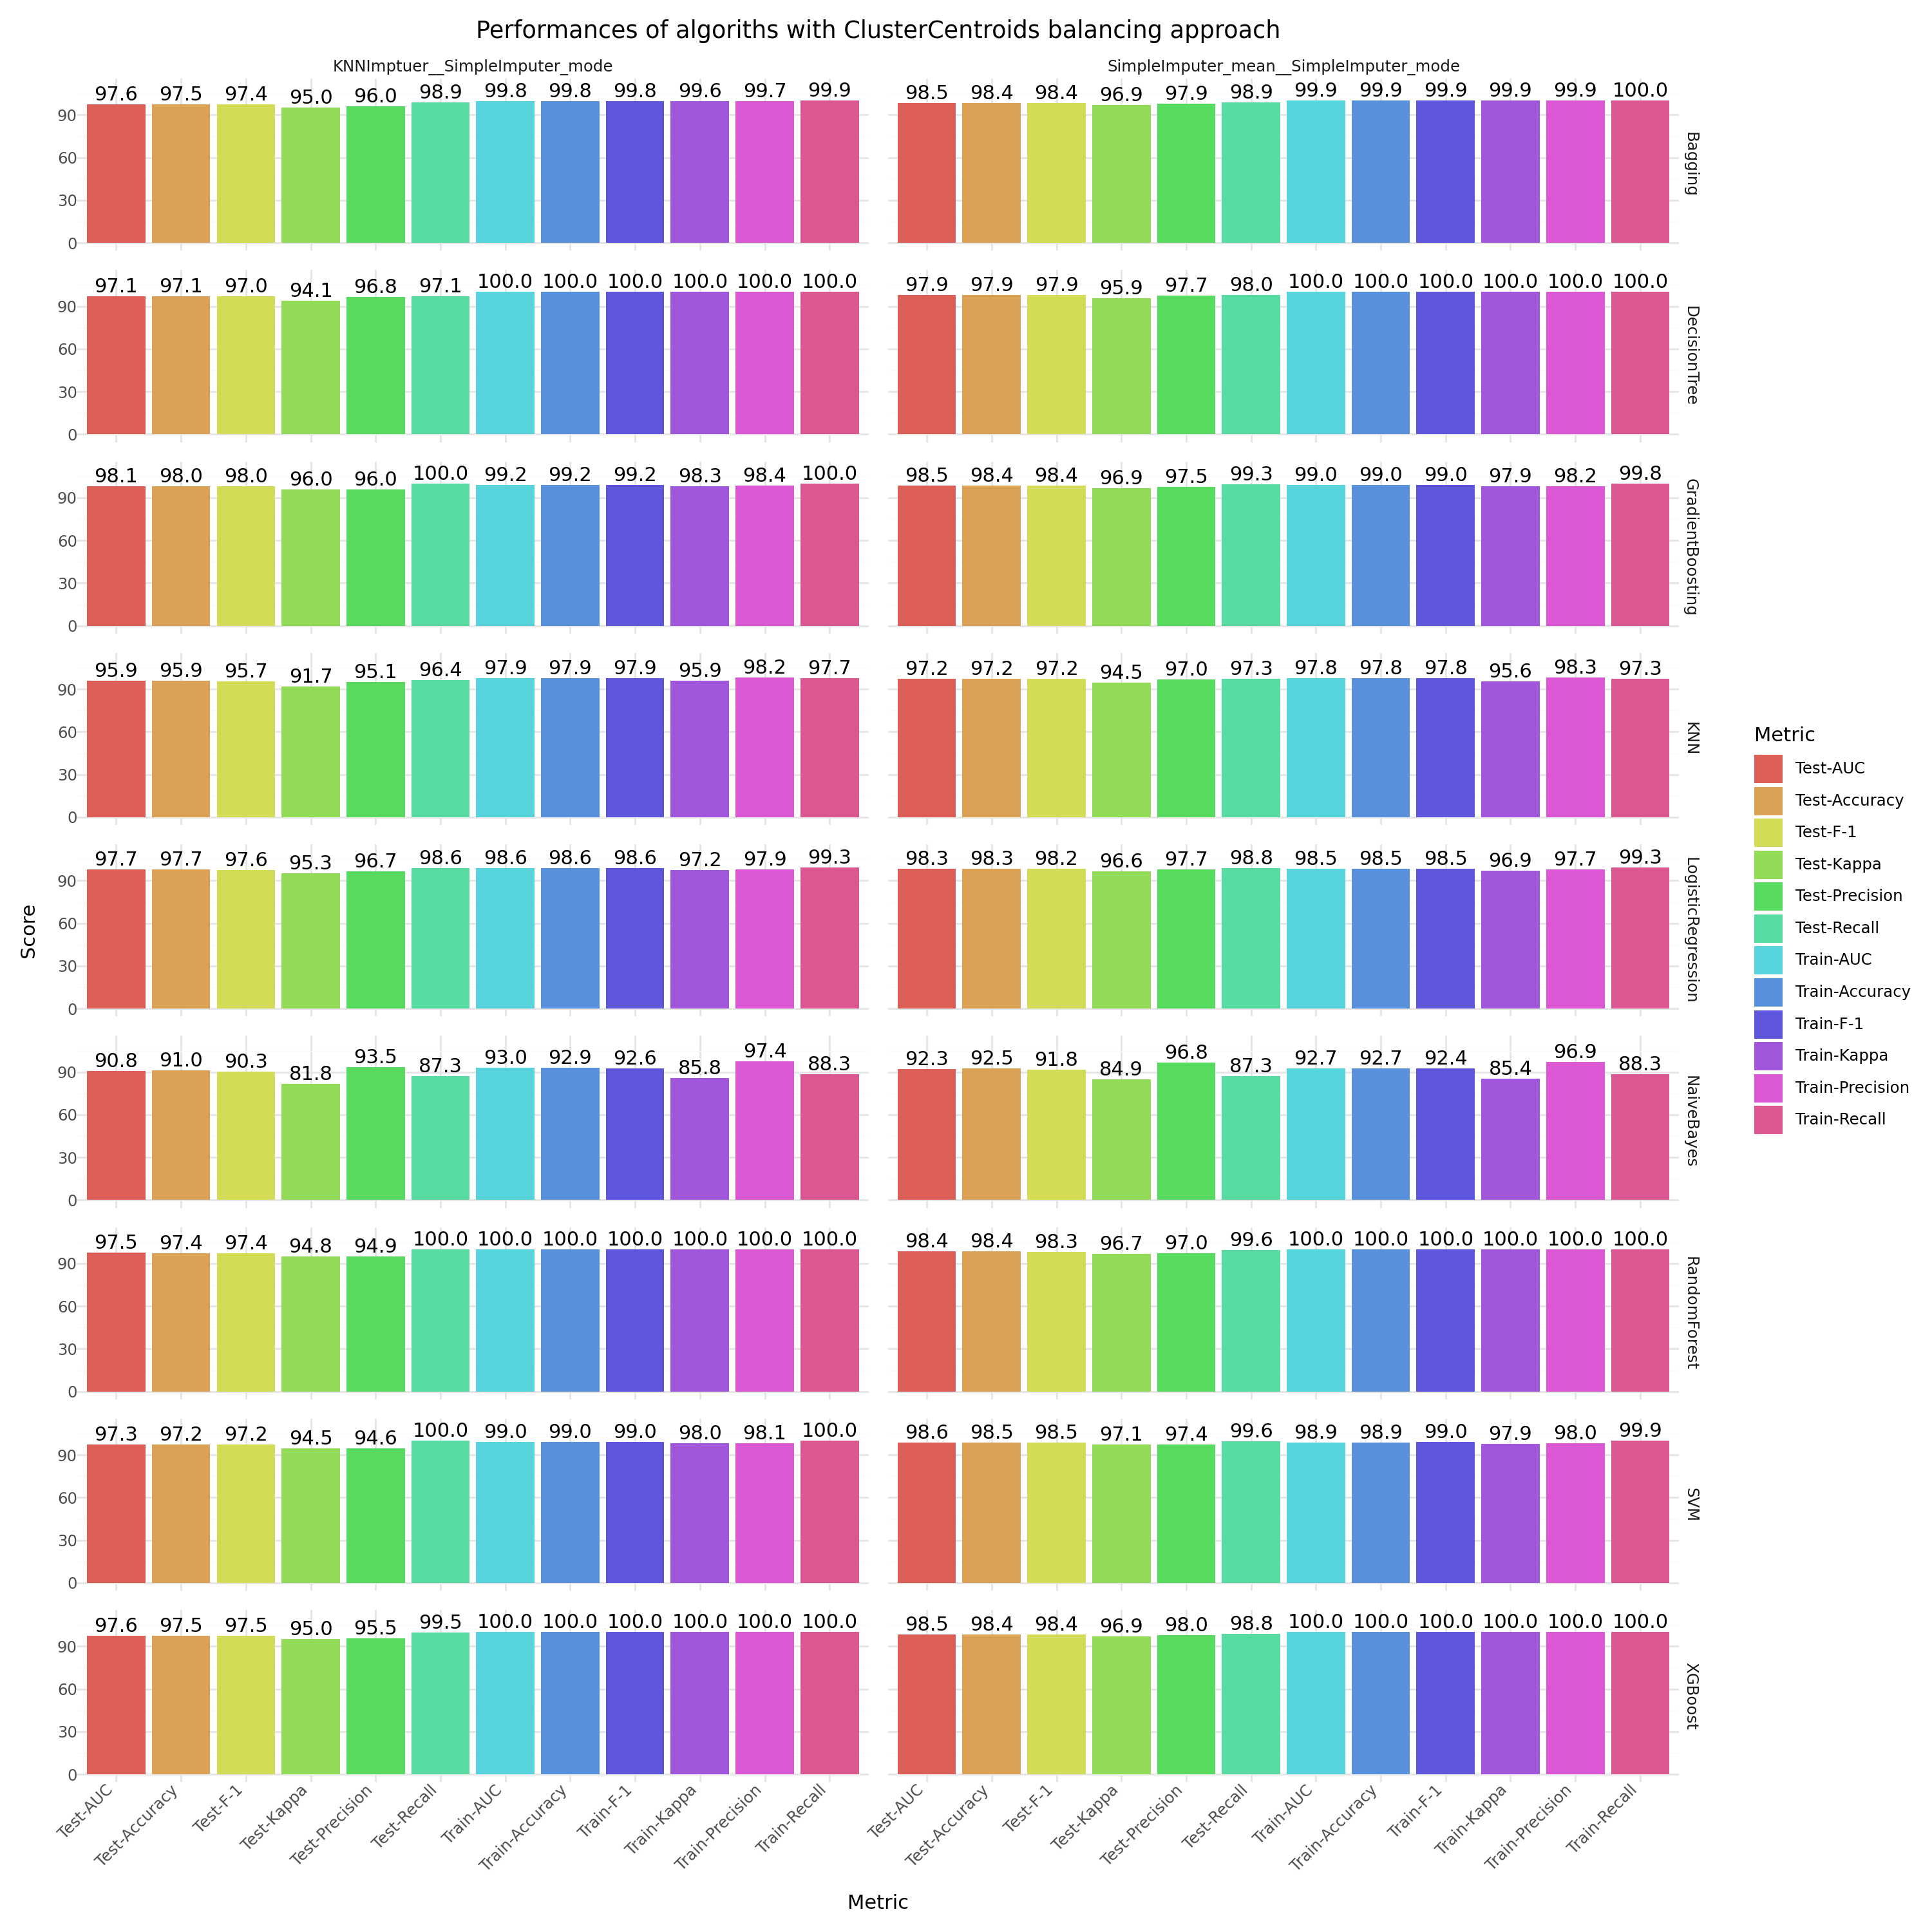

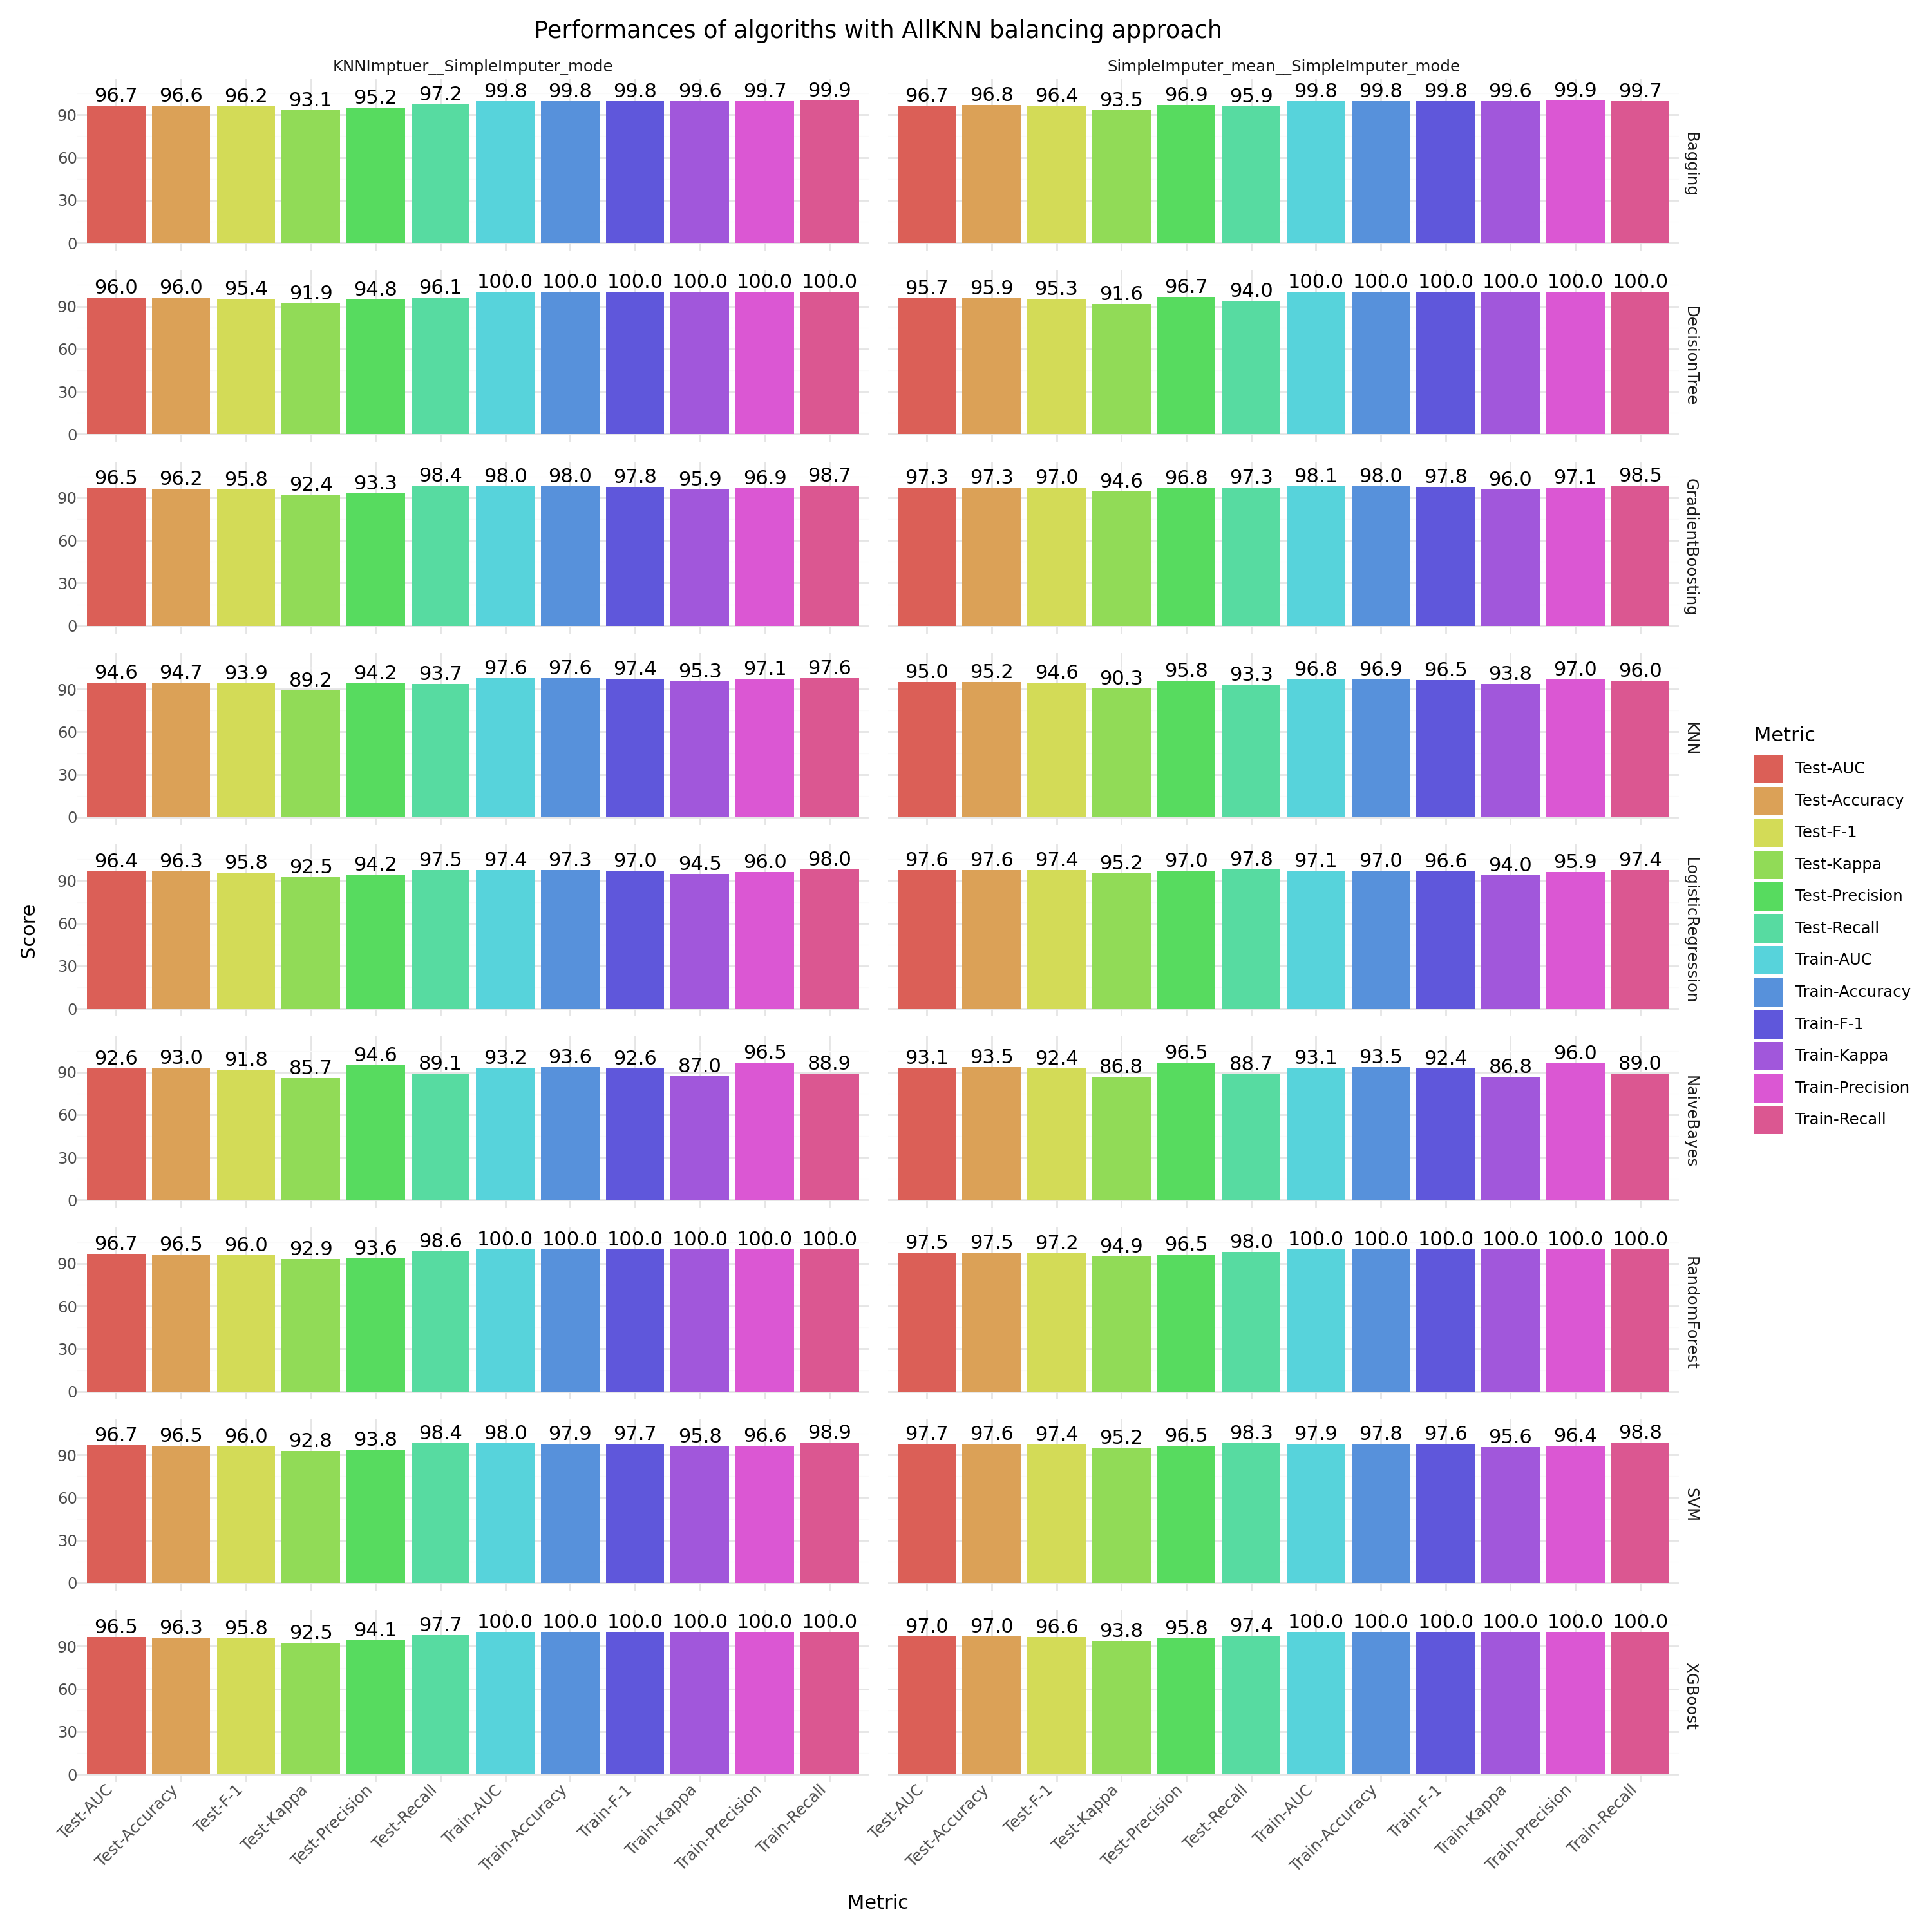

In [243]:
# the performance of each balancing approach with combination of different imputing technique and algorithm
plot_for_each_balancer(performances_df)

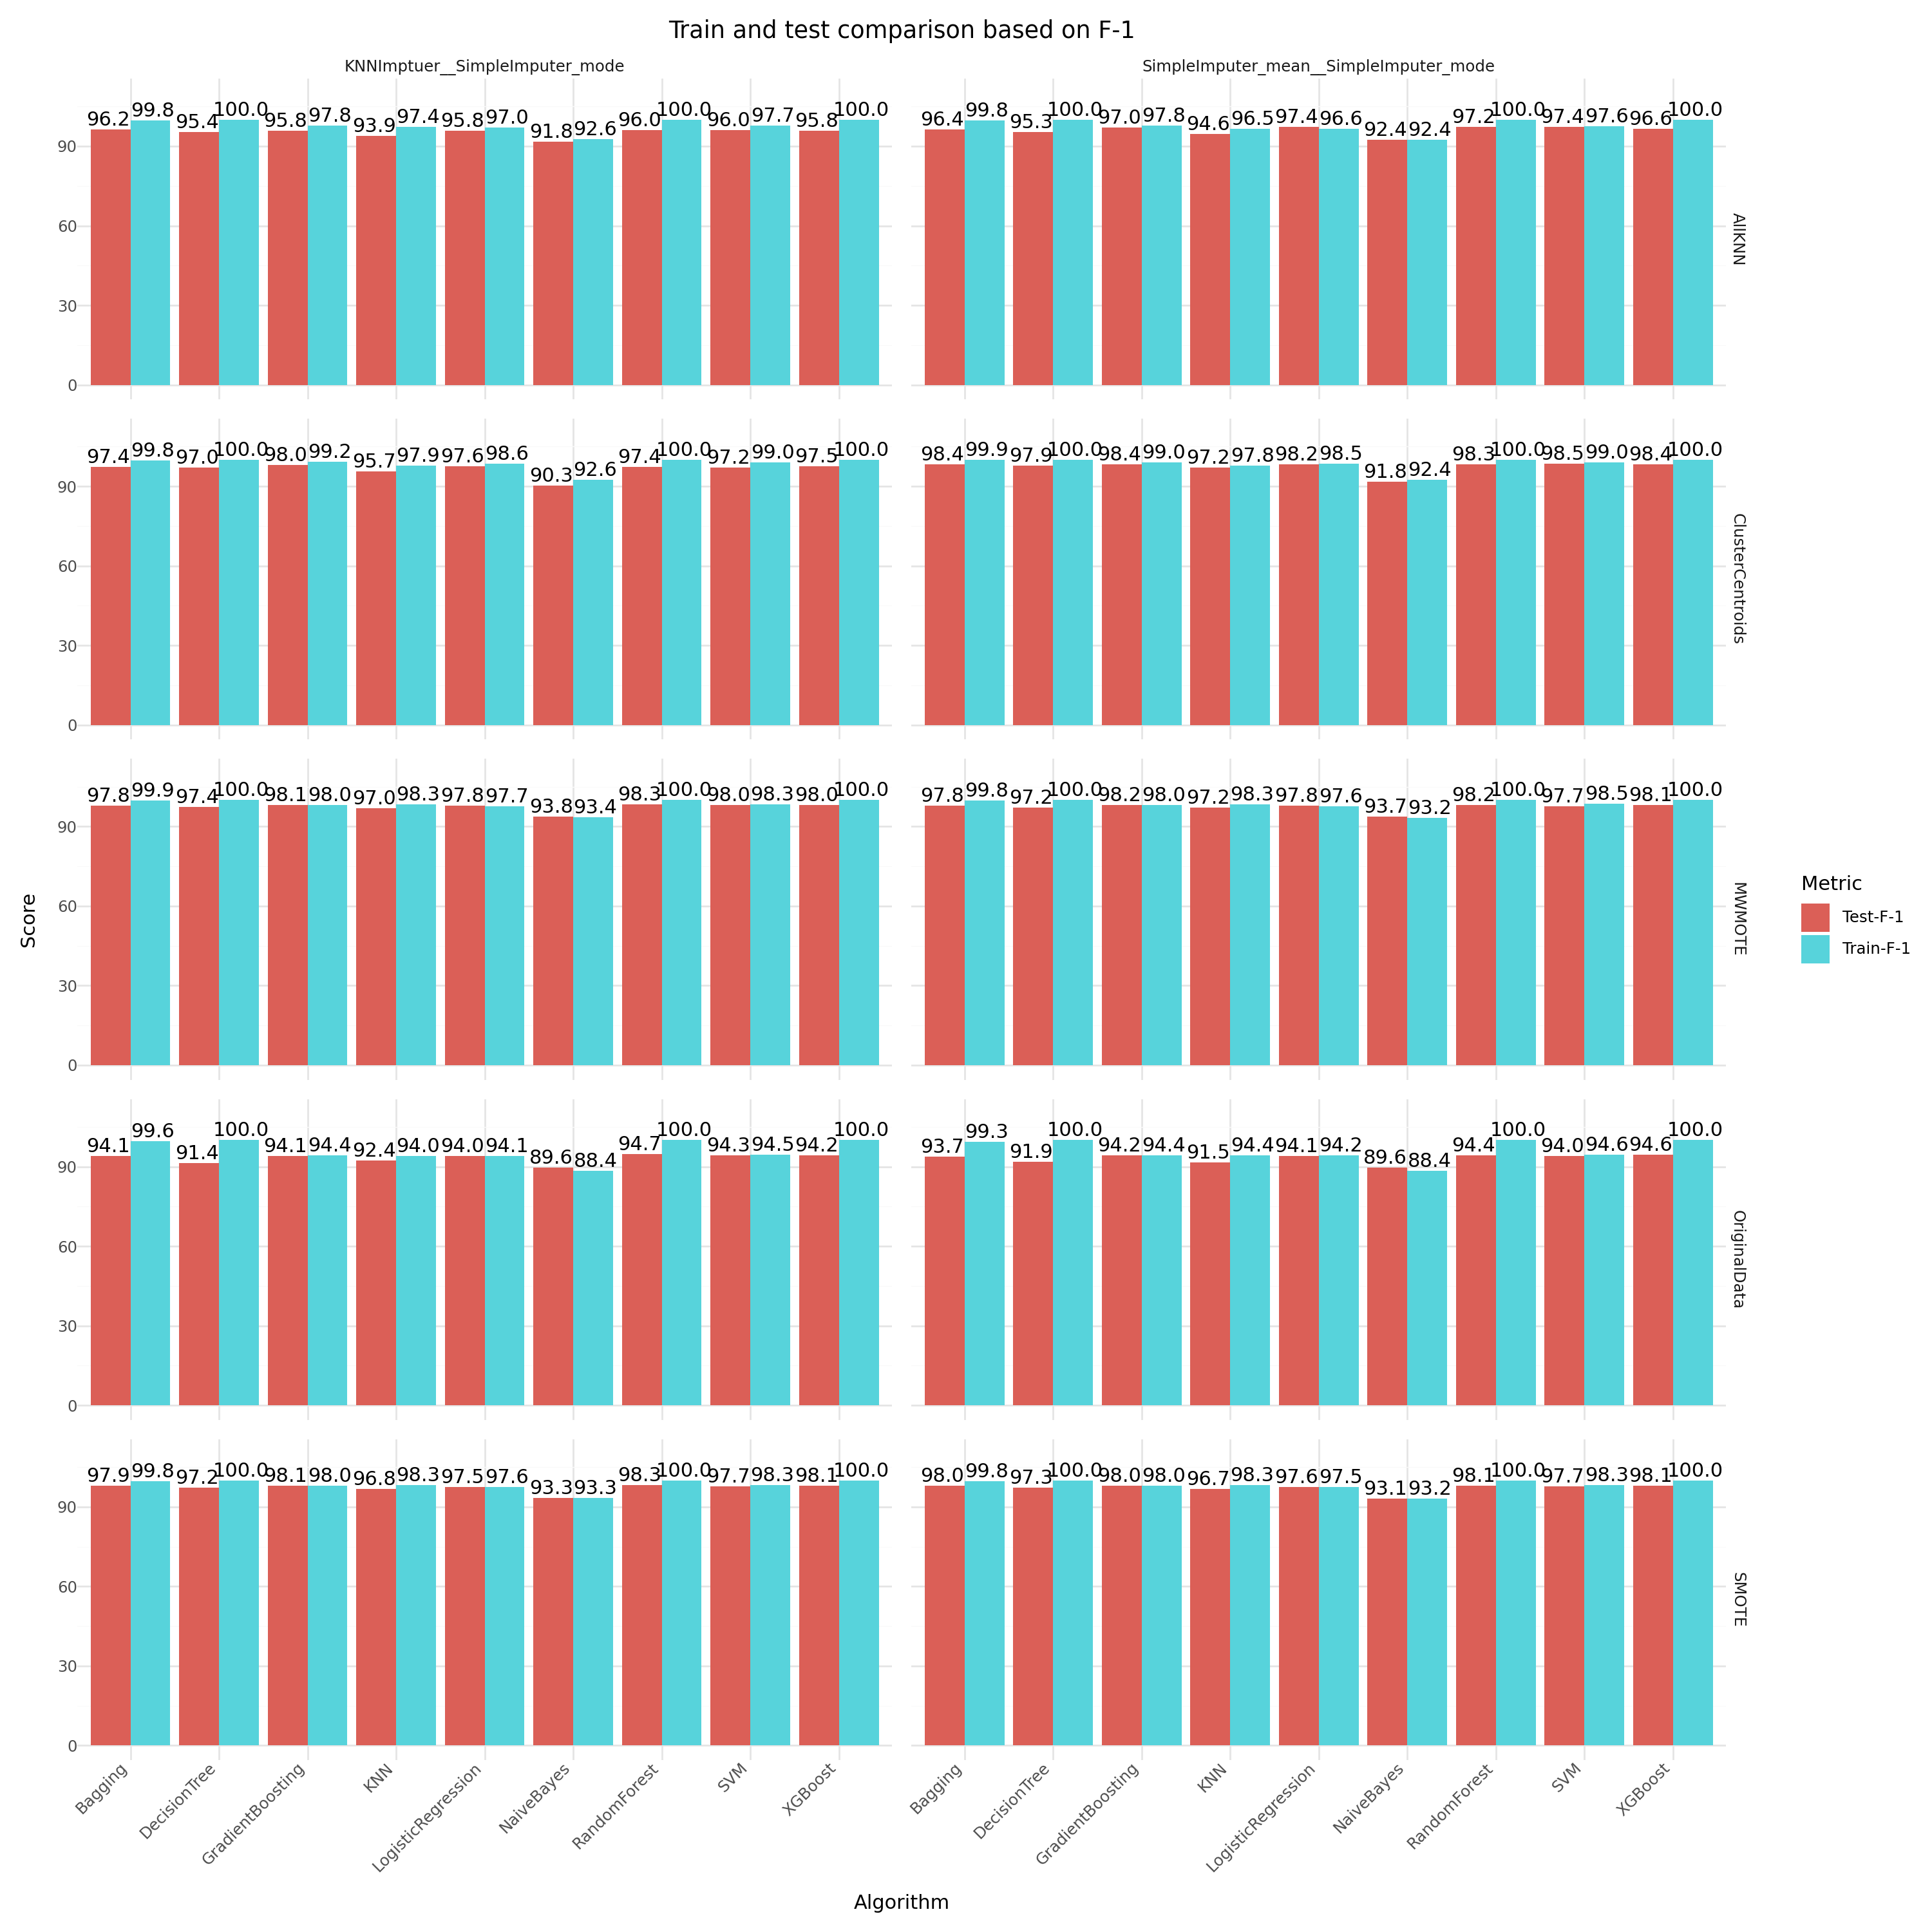

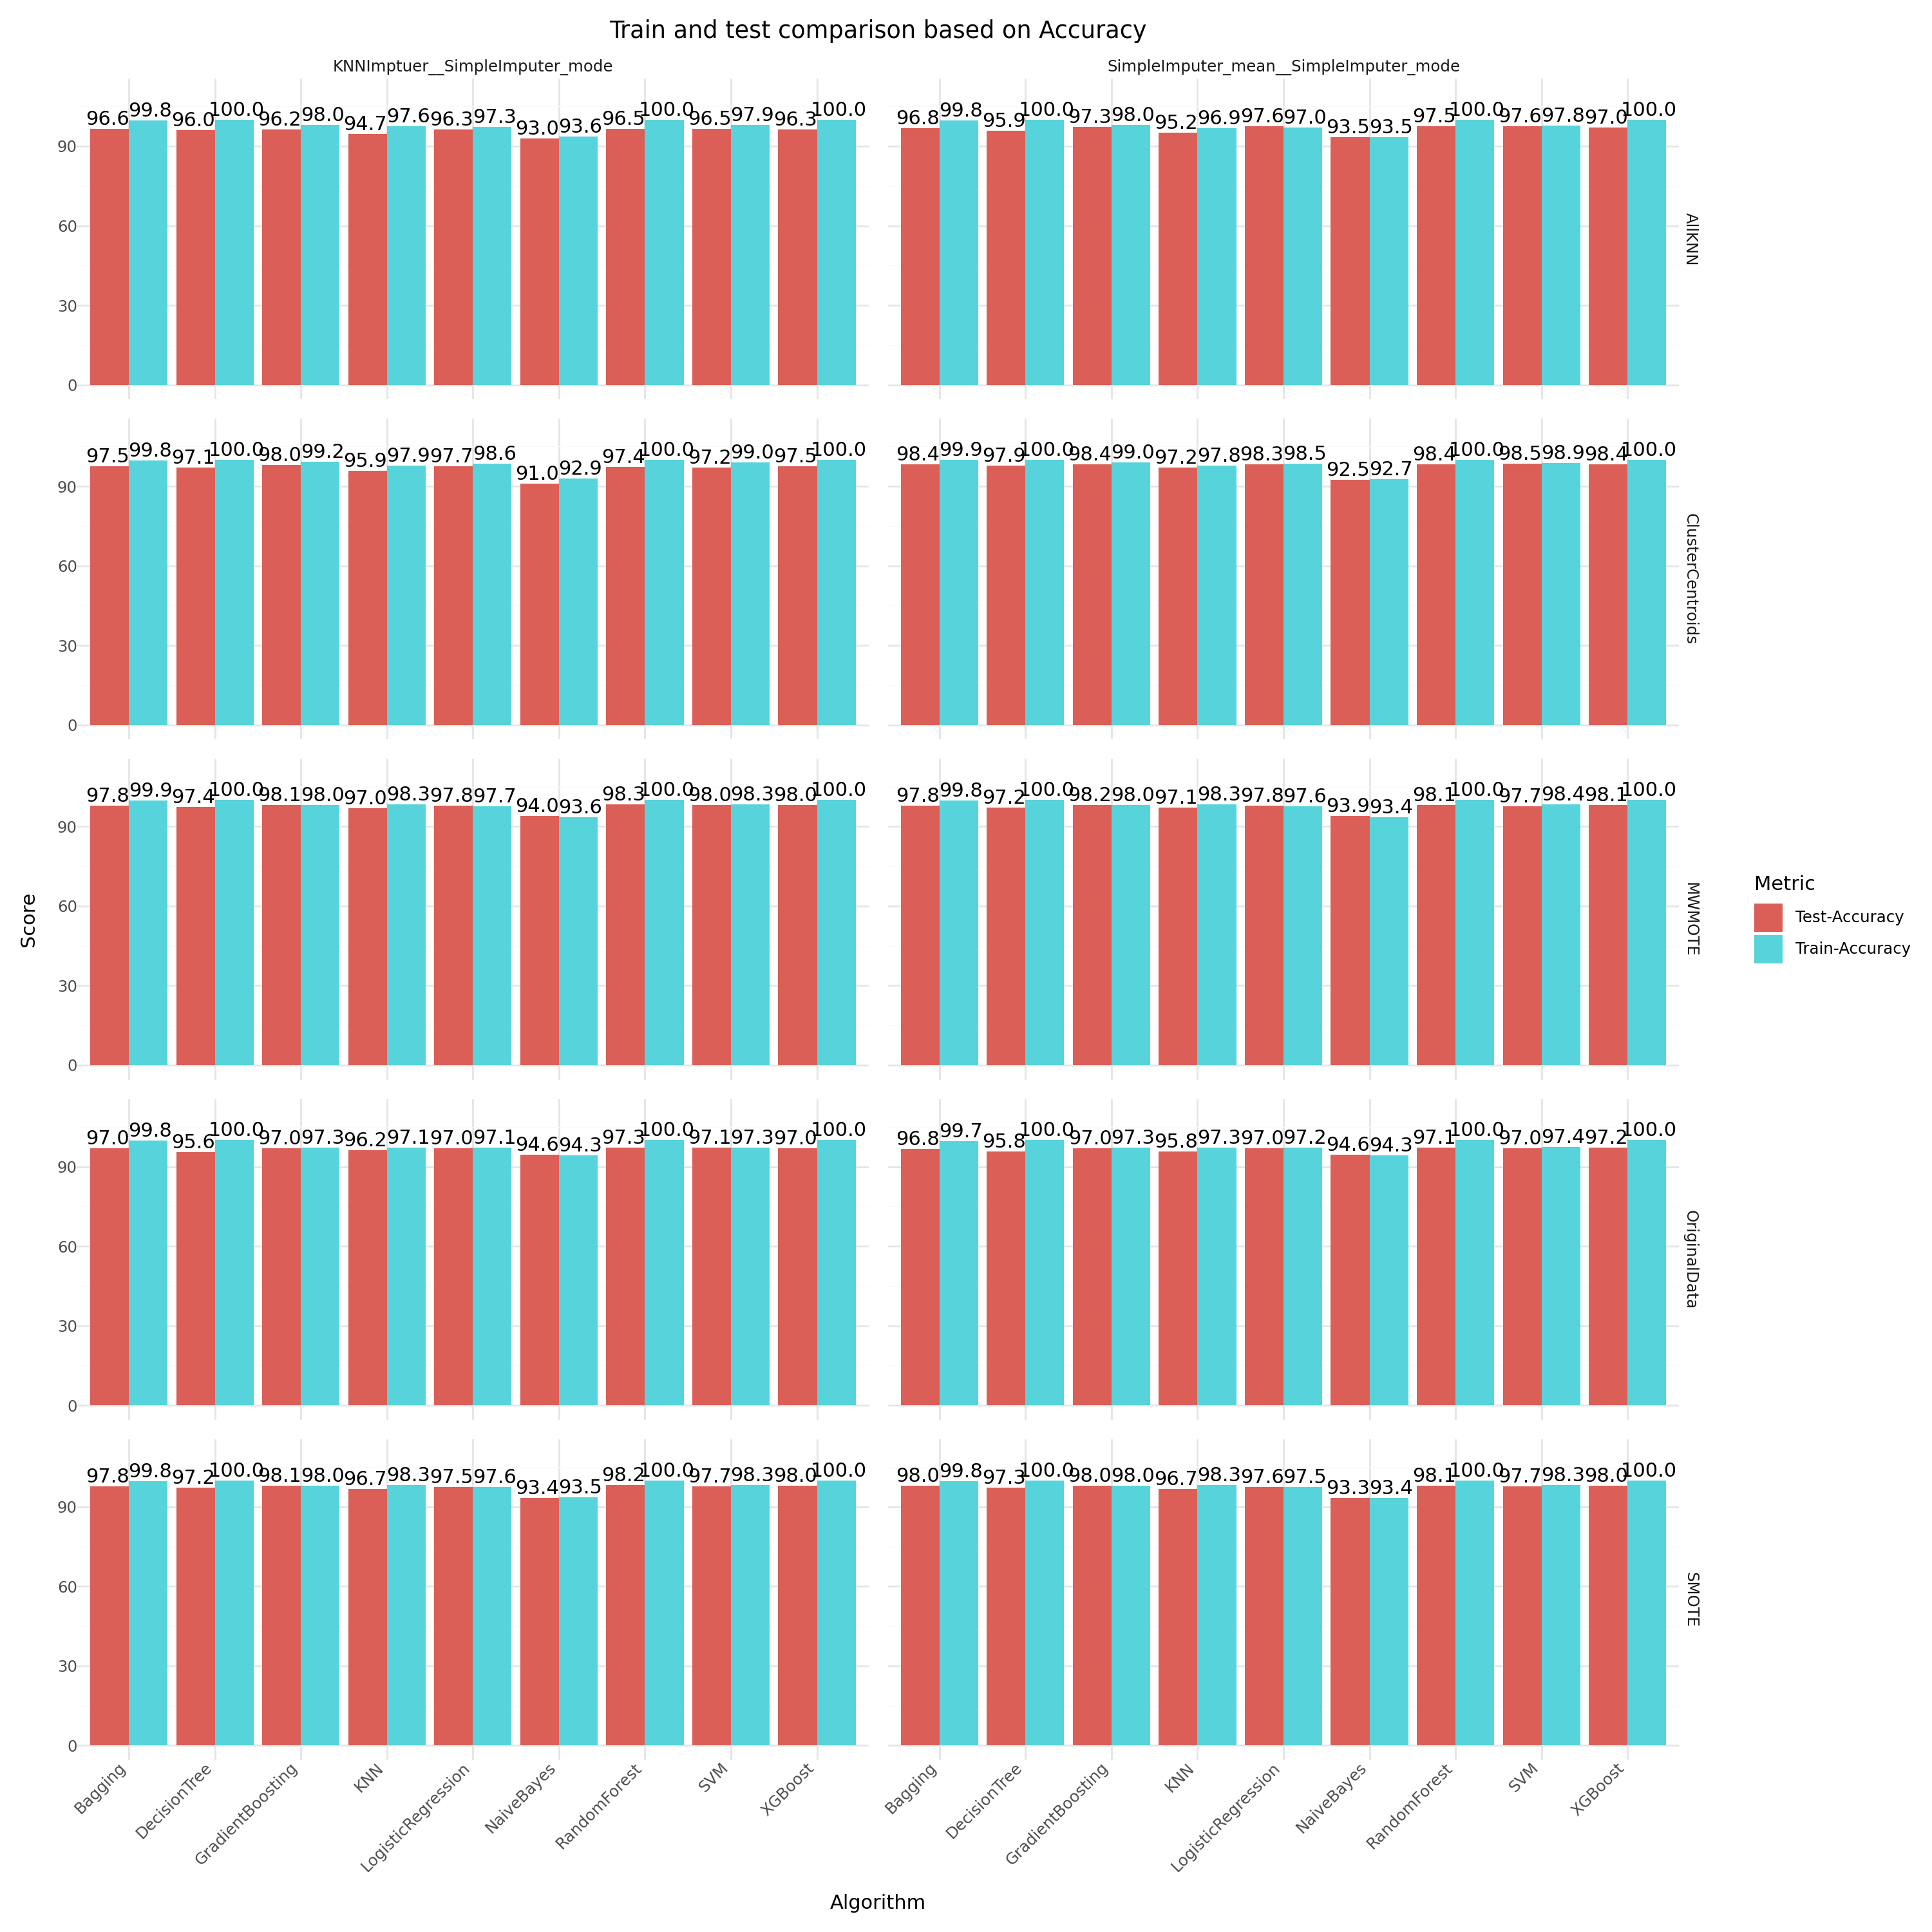

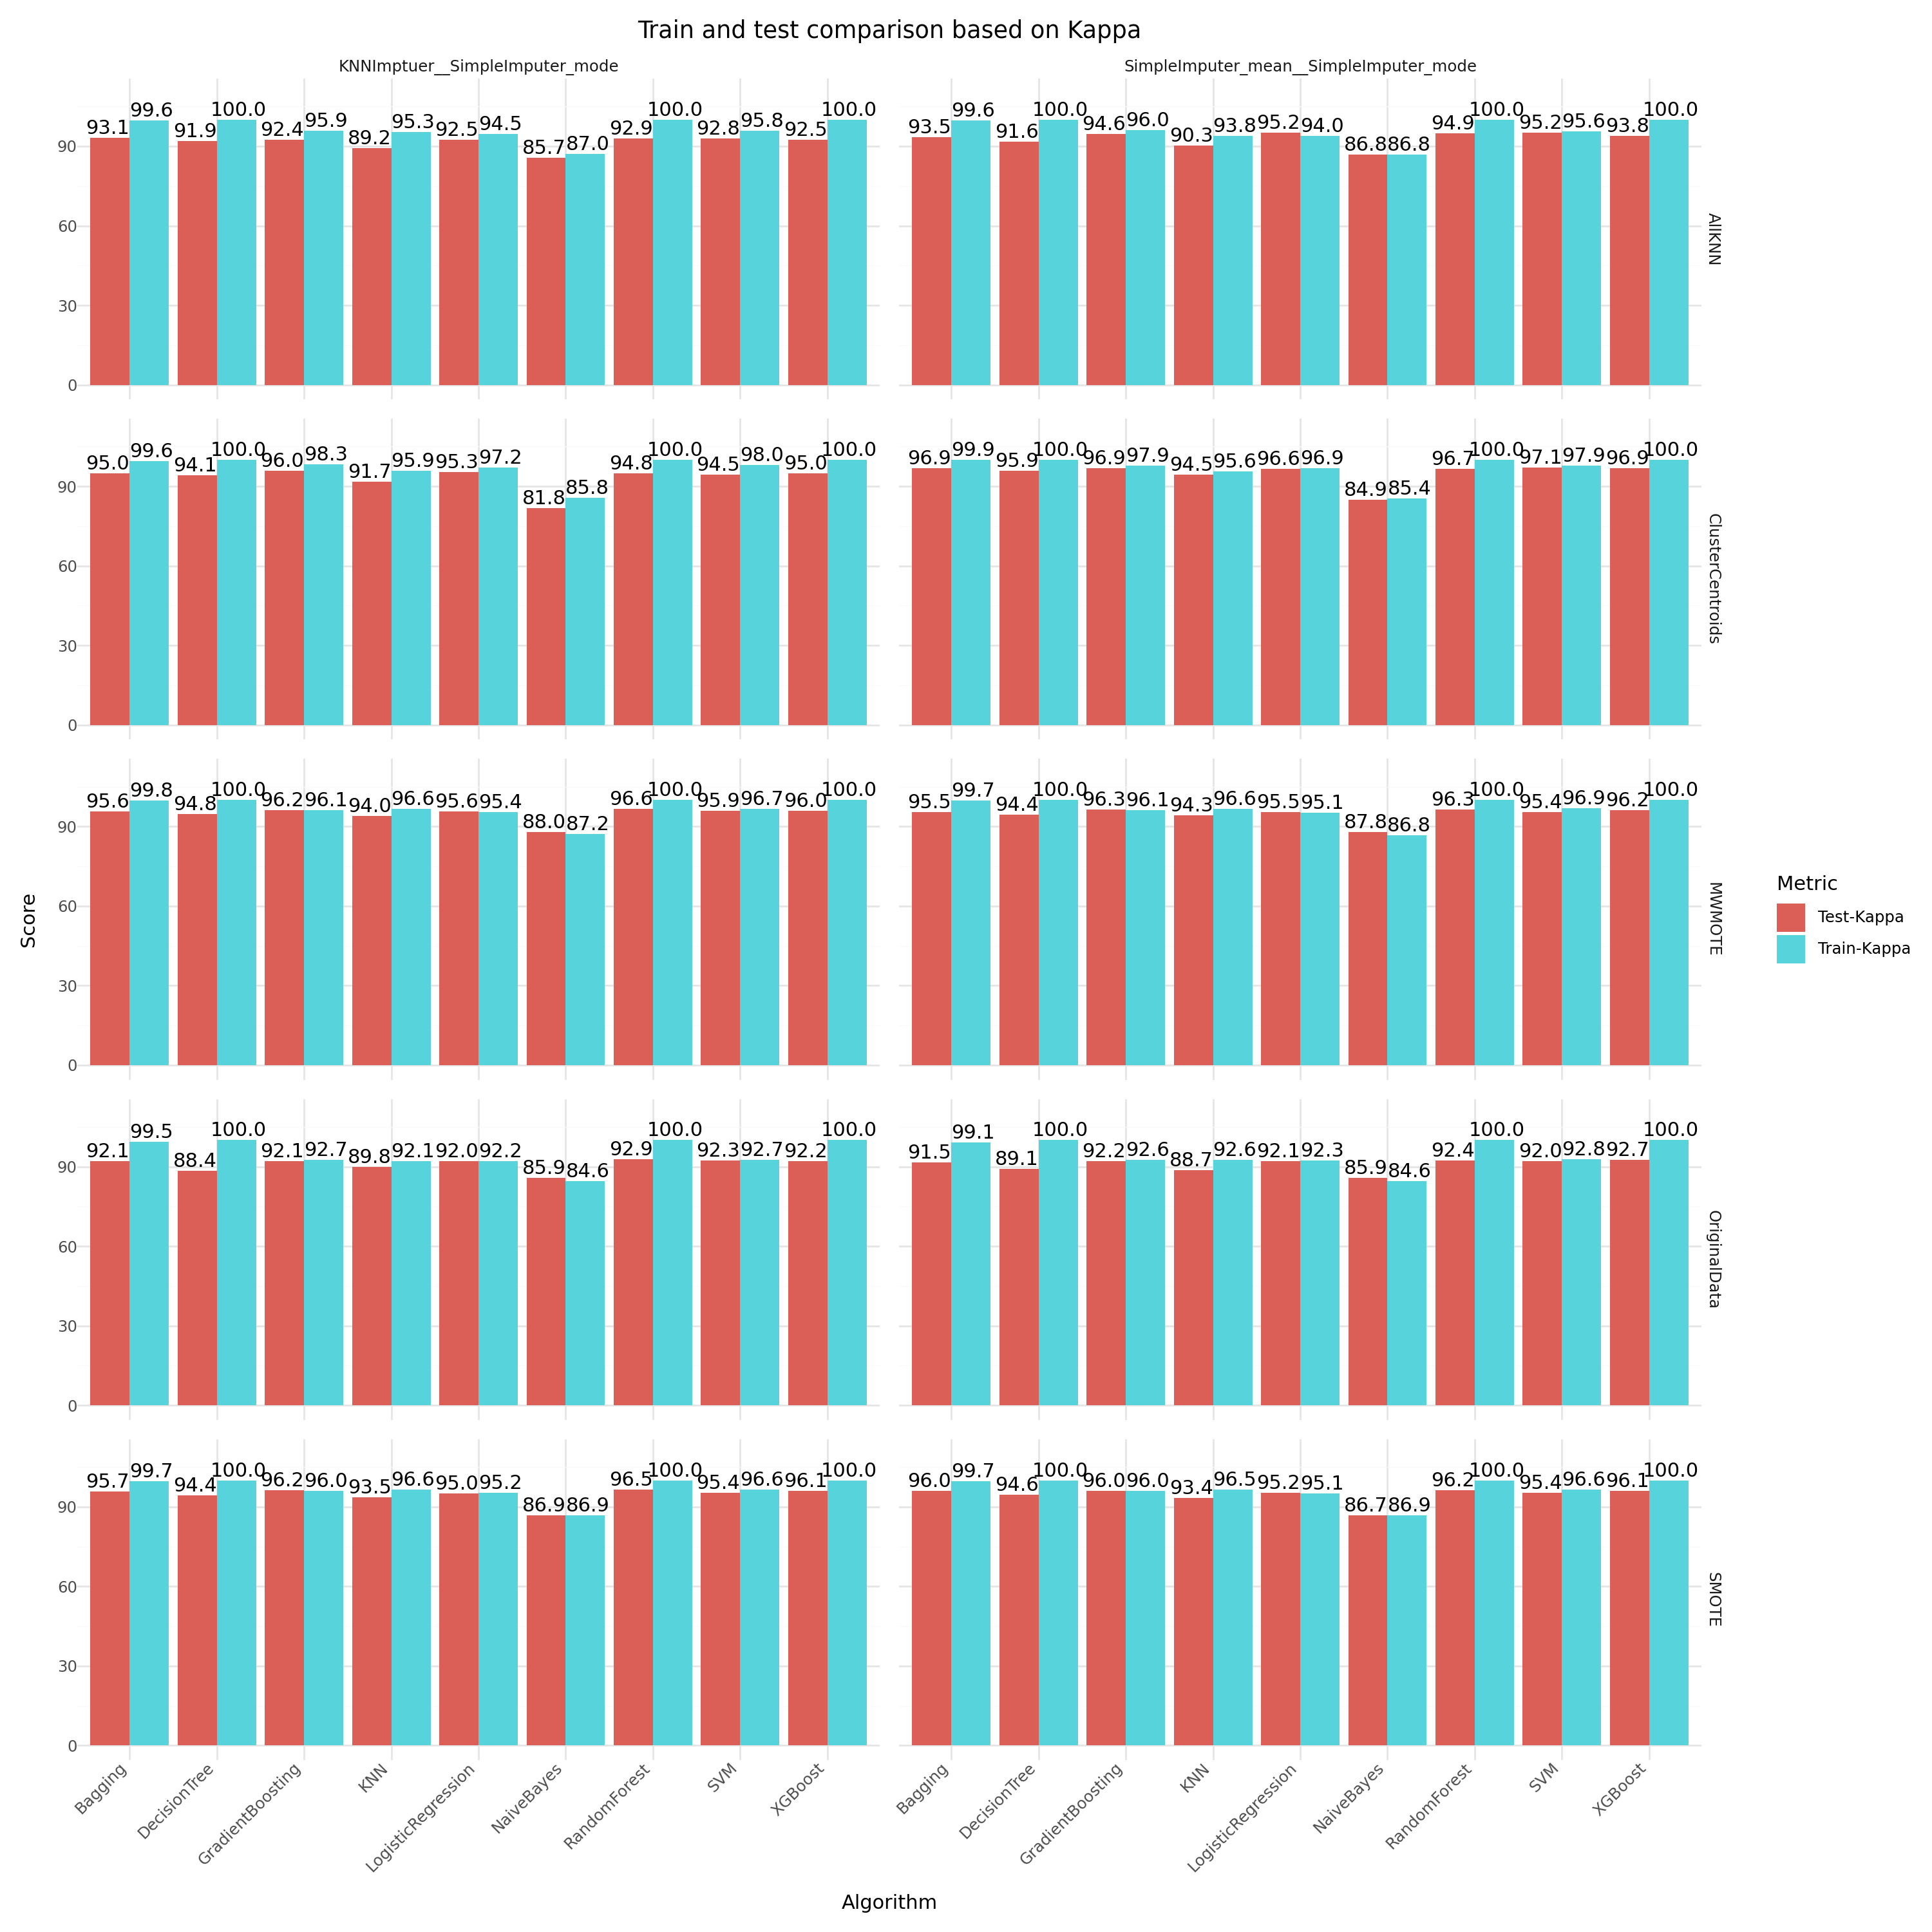

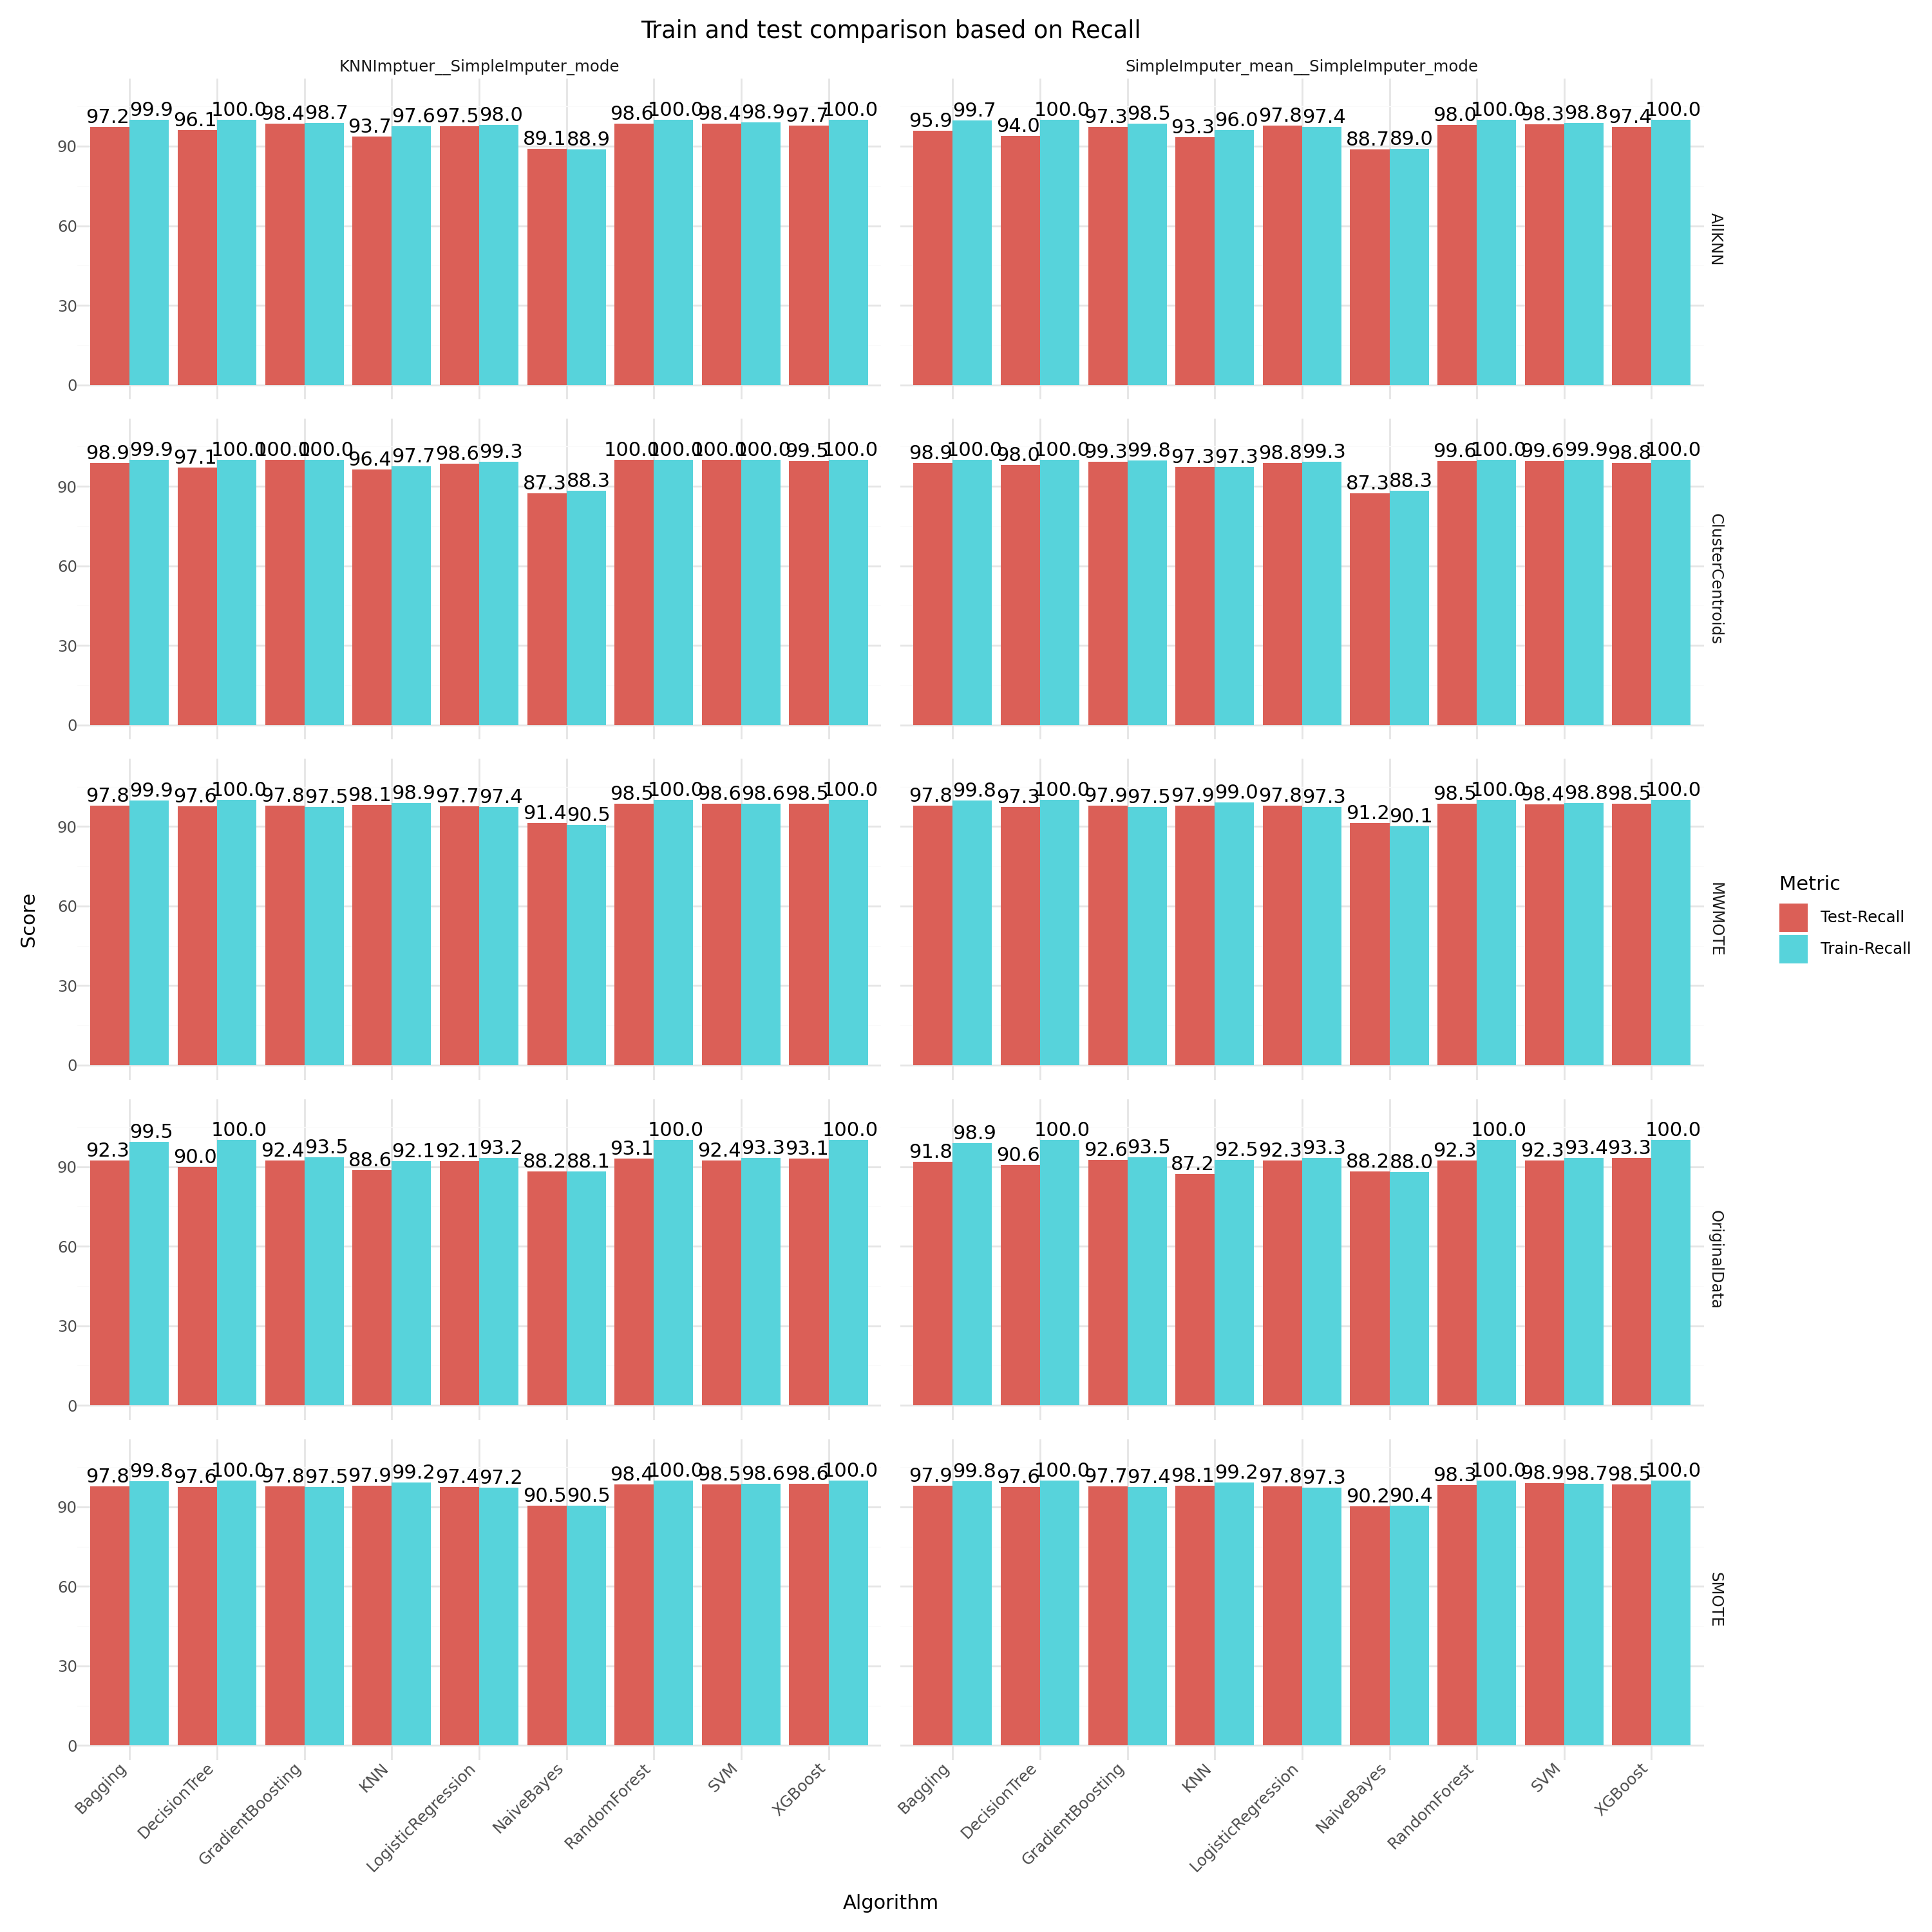

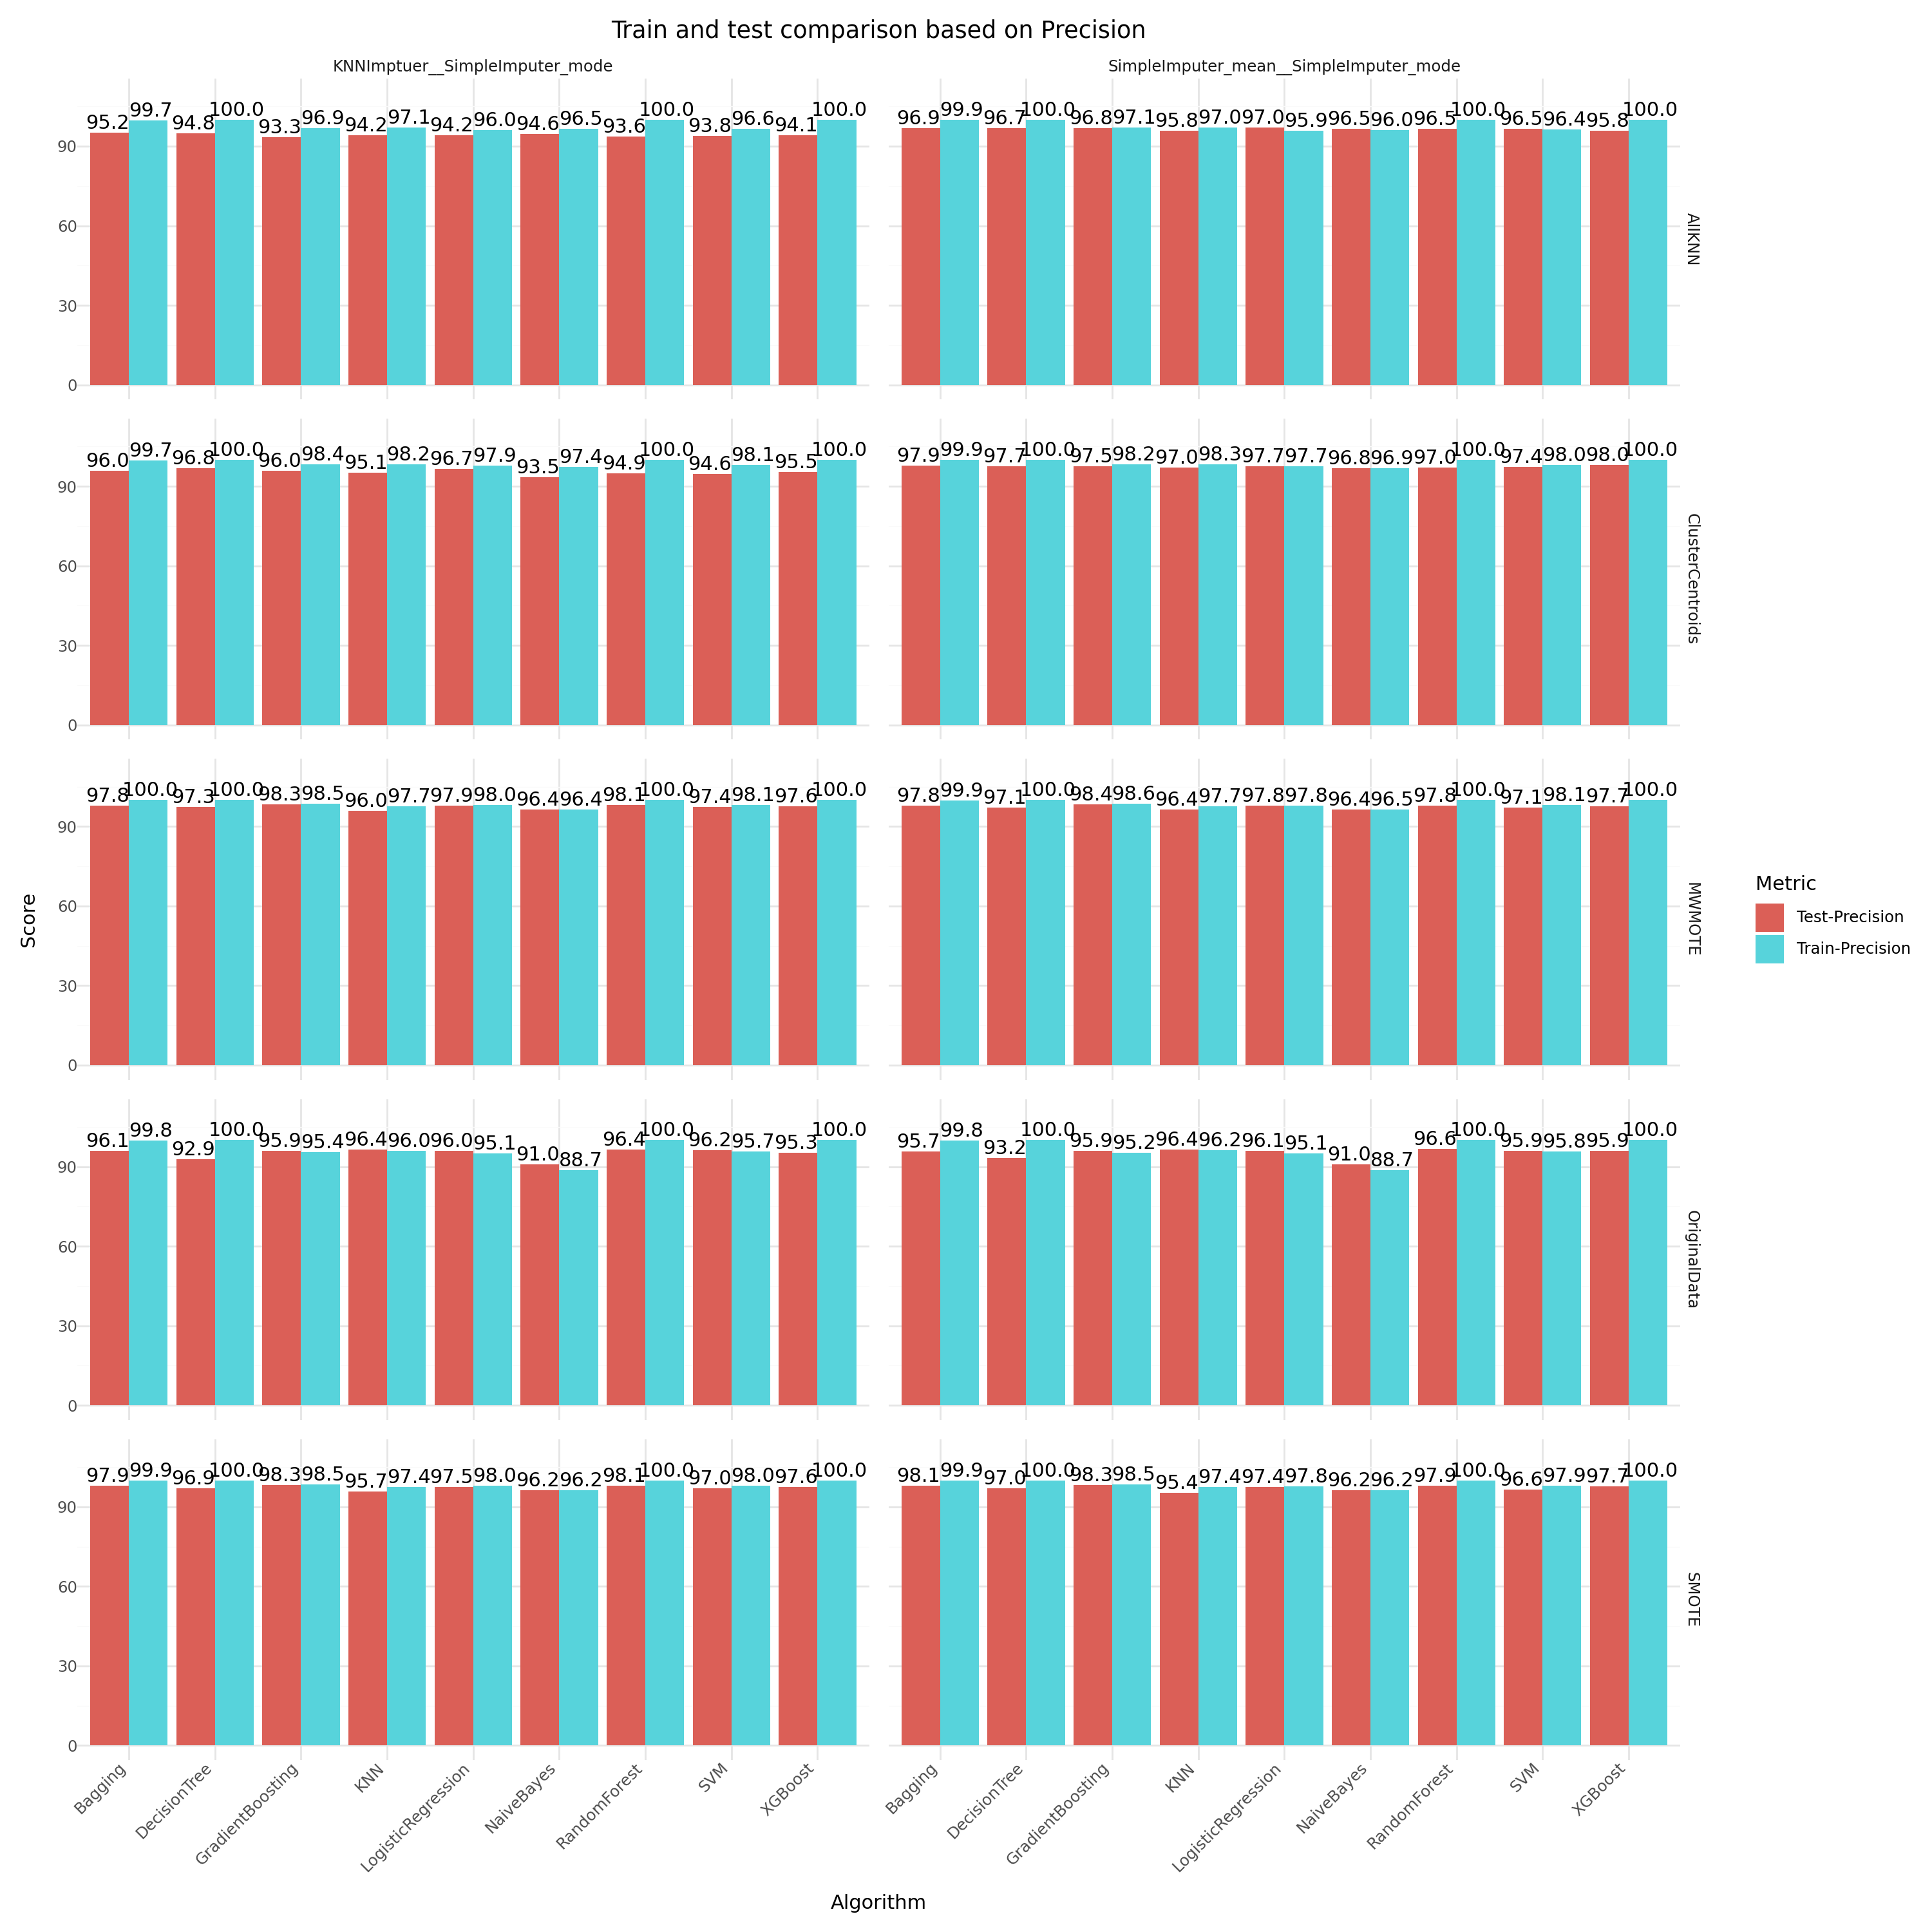

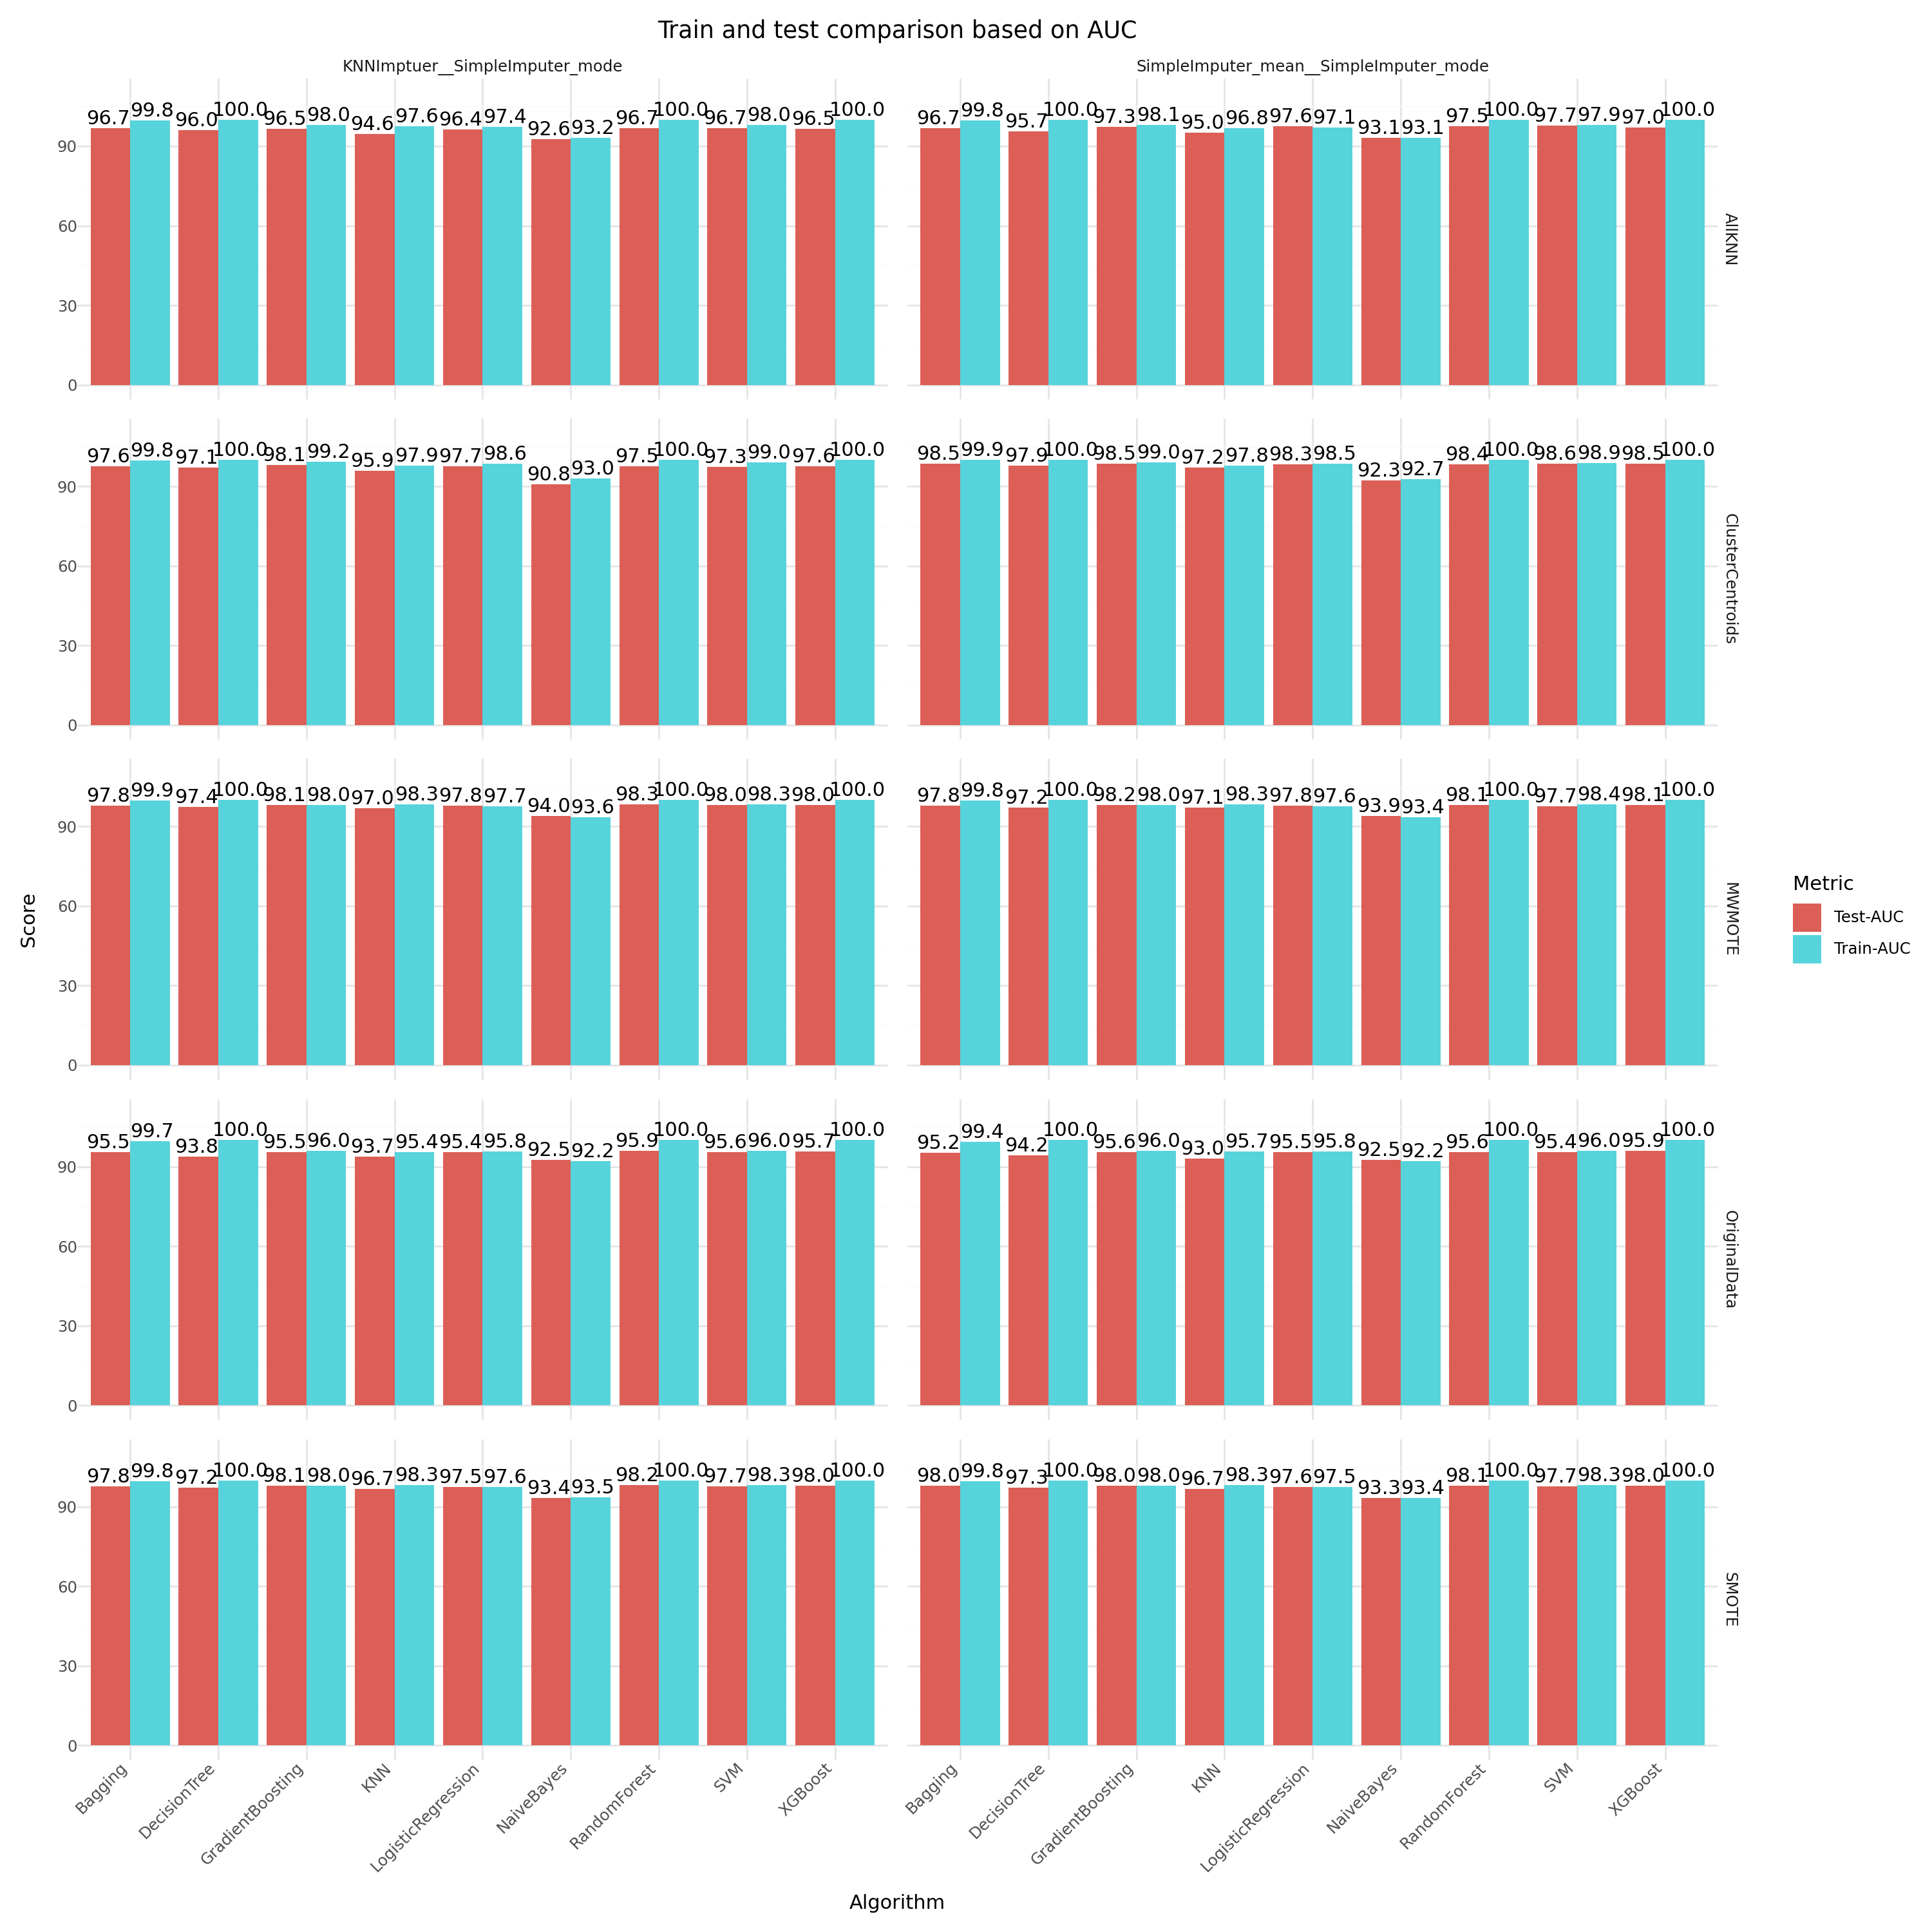

In [10]:
# the side by side comparison of algorithms, for each metric, with combination of different imputing technique and balancing approach
plot_for_each_performance_metric(performances_df)

In [242]:
performances_df[performances_df['Imbalance']=='OriginalData']

Algorithm                                 Imputer  \
18    LogisticRegression  SimpleImputer_mean__SimpleImputer_mode   
19          DecisionTree  SimpleImputer_mean__SimpleImputer_mode   
20            NaiveBayes  SimpleImputer_mean__SimpleImputer_mode   
21                   KNN  SimpleImputer_mean__SimpleImputer_mode   
22                   SVM  SimpleImputer_mean__SimpleImputer_mode   
...                  ...                                     ...   
1057                 SVM          KNNImptuer__SimpleImputer_mode   
1058        RandomForest          KNNImptuer__SimpleImputer_mode   
1059    GradientBoosting          KNNImptuer__SimpleImputer_mode   
1060             Bagging          KNNImptuer__SimpleImputer_mode   
1061             XGBoost          KNNImptuer__SimpleImputer_mode   

         Imbalance     Metric  Score    Set MainMetric  
18    OriginalData  Train-F-1   94.2  Train        F-1  
19    OriginalData  Train-F-1  100.0  Train        F-1  
20    OriginalData  Train-F-1   88.4  Train        F-1  
21    OriginalData  Train-F-1   94.4  Train        F-1  
22    OriginalData  Train-F-1   94.6  Train        F-1  
...            ...        ...    ...    ...        ...  
1057  OriginalData   Test-AUC   95.6   Test        AUC  
1058  OriginalData   Test-AUC   95.9   Test        AUC  
1059  OriginalData   Test-AUC   95.5   Test        AUC  
1060  OriginalData   Test-AUC   95.5   Test        AUC  
1061  OriginalData   Test-AUC   95.7   Test        AUC  

[216 rows x 7 columns]

In [12]:
# the max train score grouped by algorithms and evaluation metric

test_scores = max_score_for_each(performances_df,set_= 'Test')
train_scores = max_score_for_each(performances_df,set_='Train')
differences_df = train_scores.rename(columns={'Score':'TrainScore'}).drop(['Metric','Set','Imputer','Imbalance'],axis=1)\
            .merge(test_scores.rename(columns={"Score":"TestScore"}).drop(['Metric','Set','Imputer','Imbalance'],axis=1),\
                    on=['Algorithm','MainMetric'])

In [9]:
# differences_df['ScoreDifference'] = differences_df['TrainScore']-differences_df['TestScore']

In [13]:
# differences_df.sort_values(['Algorithm','ScoreDifference'])

In [136]:
test_performances.head(6)

Algorithm Imbalance          ImputerCat          ImputerNum  \
6   KNeighborsClassifier    MWMOTE  SimpleImputer_mode  SimpleImputer_mean   
7   KNeighborsClassifier    MWMOTE  SimpleImputer_mode  SimpleImputer_mean   
8   KNeighborsClassifier    MWMOTE  SimpleImputer_mode  SimpleImputer_mean   
9   KNeighborsClassifier    MWMOTE  SimpleImputer_mode  SimpleImputer_mean   
10  KNeighborsClassifier    MWMOTE  SimpleImputer_mode  SimpleImputer_mean   
11  KNeighborsClassifier    MWMOTE  SimpleImputer_mode  SimpleImputer_mean   

     Set     Metric  Score  
6   Test   Accuracy  97.22  
7   Test        F-1  97.26  
8   Test      Kappa  94.44  
9   Test     Recall  98.34  
10  Test  Precision  96.20  
11  Test        AUC  97.22

In [ ]:
# get test_scores precision
test_scores[test_scores['Imbalance'].isin(['MWMOTE','MOTE'])]
test_scores[test_scores['MainMetric'] == 'Accuracy'].sort_values("Score")

In [20]:
# best model training combinations for training
# this is the combination of model, imputation and balancing techniques

combinations = get_combinations(df=performances_df,by_features=['Algorithm','Metric'],by_metric='AUC',by_set='Test')

In [21]:
combinations

[[sklearn.ensemble._bagging.BaggingClassifier,
  ['SimpleImputer_mean',
   SimpleImputer(),
   'SimpleImputer_mode',
   SimpleImputer(strategy='most_frequent')],
  imblearn.under_sampling._prototype_generation._cluster_centroids.ClusterCentroids],
 [sklearn.tree._classes.DecisionTreeClassifier,
  ['SimpleImputer_mean',
   SimpleImputer(),
   'SimpleImputer_mode',
   SimpleImputer(strategy='most_frequent')],
  imblearn.under_sampling._prototype_generation._cluster_centroids.ClusterCentroids],
 [sklearn.ensemble._gb.GradientBoostingClassifier,
  ['SimpleImputer_mean',
   SimpleImputer(),
   'SimpleImputer_mode',
   SimpleImputer(strategy='most_frequent')],
  imblearn.under_sampling._prototype_generation._cluster_centroids.ClusterCentroids],
 [sklearn.neighbors._classification.KNeighborsClassifier,
  ['SimpleImputer_mean',
   SimpleImputer(),
   'SimpleImputer_mode',
   SimpleImputer(strategy='most_frequent')],
  smote_variants.oversampling._mwmote.MWMOTE],
 [sklearn.linear_model._logisti

In [22]:
df = pd.read_csv("../data/initial_data/frmgham2_project_data_full.csv")

In [23]:
# train best models 
for combination in combinations:
    algorithm, imputer,balanc = combination
    # print(combination)
    # quit()
    print(algorithm.__name__,balanc.__name__,imputer)
    best_model,best_params,output = find_best_model(algorithm=algorithm,
                                                    balancer=balanc,
                                                    imputer=imputer,
                                                    df=df,
                                                    ovewrite=False)


BaggingClassifier ClusterCentroids ['SimpleImputer_mean', SimpleImputer(), 'SimpleImputer_mode', SimpleImputer(strategy='most_frequent')]



BaggingClassifier hyperparameter tuning was already done. Do you want to do it again? [y/[other key]]  


DecisionTreeClassifier ClusterCentroids ['SimpleImputer_mean', SimpleImputer(), 'SimpleImputer_mode', SimpleImputer(strategy='most_frequent')]



DecisionTreeClassifier hyperparameter tuning was already done. Do you want to do it again? [y/[other key]]  


GradientBoostingClassifier ClusterCentroids ['SimpleImputer_mean', SimpleImputer(), 'SimpleImputer_mode', SimpleImputer(strategy='most_frequent')]



GradientBoostingClassifier hyperparameter tuning was already done. Do you want to do it again? [y/[other key]]  


KNeighborsClassifier MWMOTE ['SimpleImputer_mean', SimpleImputer(), 'SimpleImputer_mode', SimpleImputer(strategy='most_frequent')]



KNeighborsClassifier hyperparameter tuning was already done. Do you want to do it again? [y/[other key]]  


LogisticRegression ClusterCentroids ['SimpleImputer_mean', SimpleImputer(), 'SimpleImputer_mode', SimpleImputer(strategy='most_frequent')]



LogisticRegression hyperparameter tuning was already done. Do you want to do it again? [y/[other key]]  


GaussianNB MWMOTE ['KNNImptuer', KNNImputer(), 'SimpleImputer_mode', SimpleImputer(strategy='most_frequent')]
Model not found!!
RandomForestClassifier ClusterCentroids ['SimpleImputer_mean', SimpleImputer(), 'SimpleImputer_mode', SimpleImputer(strategy='most_frequent')]



RandomForestClassifier hyperparameter tuning was already done. Do you want to do it again? [y/[other key]]  


SVC ClusterCentroids ['SimpleImputer_mean', SimpleImputer(), 'SimpleImputer_mode', SimpleImputer(strategy='most_frequent')]



SVC hyperparameter tuning was already done. Do you want to do it again? [y/[other key]]  


XGBClassifier ClusterCentroids ['SimpleImputer_mean', SimpleImputer(), 'SimpleImputer_mode', SimpleImputer(strategy='most_frequent')]



XGBClassifier hyperparameter tuning was already done. Do you want to do it again? [y/[other key]]  


In [149]:
total_perfomance = pd.read_csv("../results/general/best_results_all_models.csv")
total_perfomance_approaches = total_perfomance.drop(['Set','Metric','Score'],axis=1).drop_duplicates()
# total_perfomance["Imputer"] = total_perfomance['ImputerNum'] + "__" + total_perfomance['ImputerCat']
# total_perfomance.drop(['ImputerCat','ImputerNum'],axis=1,inplace=True)



In [152]:
total_perfomance_approaches.sort_values("Algorithm")

Algorithm Imbalance          ImputerCat  \
48           BaggingClassifier     SMOTE  SimpleImputer_mode   
60      DecisionTreeClassifier    MWMOTE  SimpleImputer_mode   
84                  GaussianNB    ADASYN  SimpleImputer_mode   
24  GradientBoostingClassifier    MWMOTE  SimpleImputer_mode   
0         KNeighborsClassifier    MWMOTE  SimpleImputer_mode   
36          LogisticRegression    MWMOTE  SimpleImputer_mode   
72      RandomForestClassifier     SMOTE  SimpleImputer_mode   
12                         SVC    MWMOTE  SimpleImputer_mode   
96               XGBClassifier     SMOTE  SimpleImputer_mode   

            ImputerNum  
48  SimpleImputer_mean  
60          KNNImptuer  
84          KNNImptuer  
24  SimpleImputer_mean  
0   SimpleImputer_mean  
36  SimpleImputer_mean  
72          KNNImptuer  
12          KNNImptuer  
96          KNNImptuer

In [ ]:
ggplot(met_df, aes(x='Algorithm', y='Score', fill='Metric',label='Score')) + \
                   facet_grid(rows='Imbalance',cols='Imputer') + \
                   geom_col(position='dodge') + \
                   theme_minimal() + \
                   theme(figure_size=(15,15),axis_text_x=element_text(angle=45, hjust=1))  + \
                   geom_text(position=position_dodge(width=1),va='bottom',ha='center') +\
                   ylim(0,110) + \
                   labs(title=title)

In [138]:
def plot_by_metric(df,metric='AUC',set_=None):

        

    data = df[df['Metric'] == 'AUC']

    if set_ is not None:
        data = data[data['Set'] == set_]
    bar = ggplot(data,aes(x='Algorithm', y='Score', fill='Set',label='Score')) + \
                   geom_col(position='dodge') + \
                   theme_minimal() + \
                   geom_text(position=position_dodge(width=1),va='bottom',ha='center') +\
                   theme(figure_size=(15,10),axis_text_x=element_text(angle=45, hjust=1))
    


    bar.show()

# plot_by_metric(total_perfomance,set_='Test')

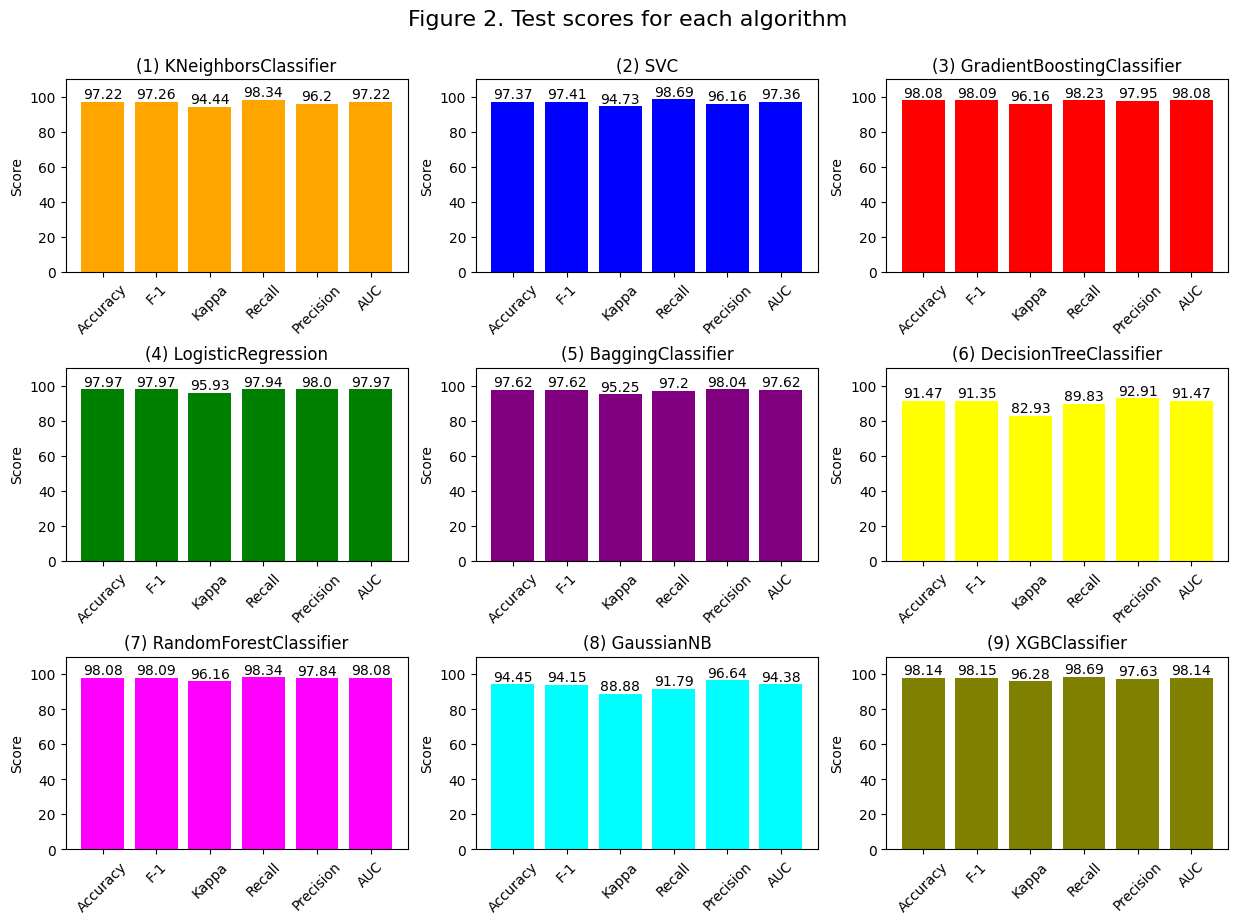

In [238]:
test_performances = total_perfomance[total_perfomance['Set'] == 'Test']

# test_performances = test_performances.sort_values(["Score","Algorithm"])

fig, ax = plt.subplots(3, 3)



title = fig.suptitle("Figure 2. Test scores for each algorithm", fontsize=16)

# Adjust the position of the title
title.set_position([.5, 0.95])

fig.set_figheight(10)
fig.set_figwidth(15)
fig.subplots_adjust(hspace=0.5)
axes = ax.flatten()

algorithms = total_perfomance.Algorithm.unique()

colors = ['orange','blue','red','green','purple','yellow','magenta','cyan','olive']

for i in range(len(algorithms)):

    alg = algorithms[i]

    data = test_performances[test_performances['Algorithm'] == alg]
    
    axes[i].bar(data['Metric'], data['Score'],color=colors[i])
    axes[i].set_title(f"({str(i+1)}) {alg}")
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis ticks
    axes[i].set_ylim(0,110)
    axes[i].set_ylabel("Score")
    for j, value in enumerate(data.Score):  # Changed the variable name to j
        axes[i].annotate(str(value), xy=(j, value), ha='center', va='bottom')

plt.show()


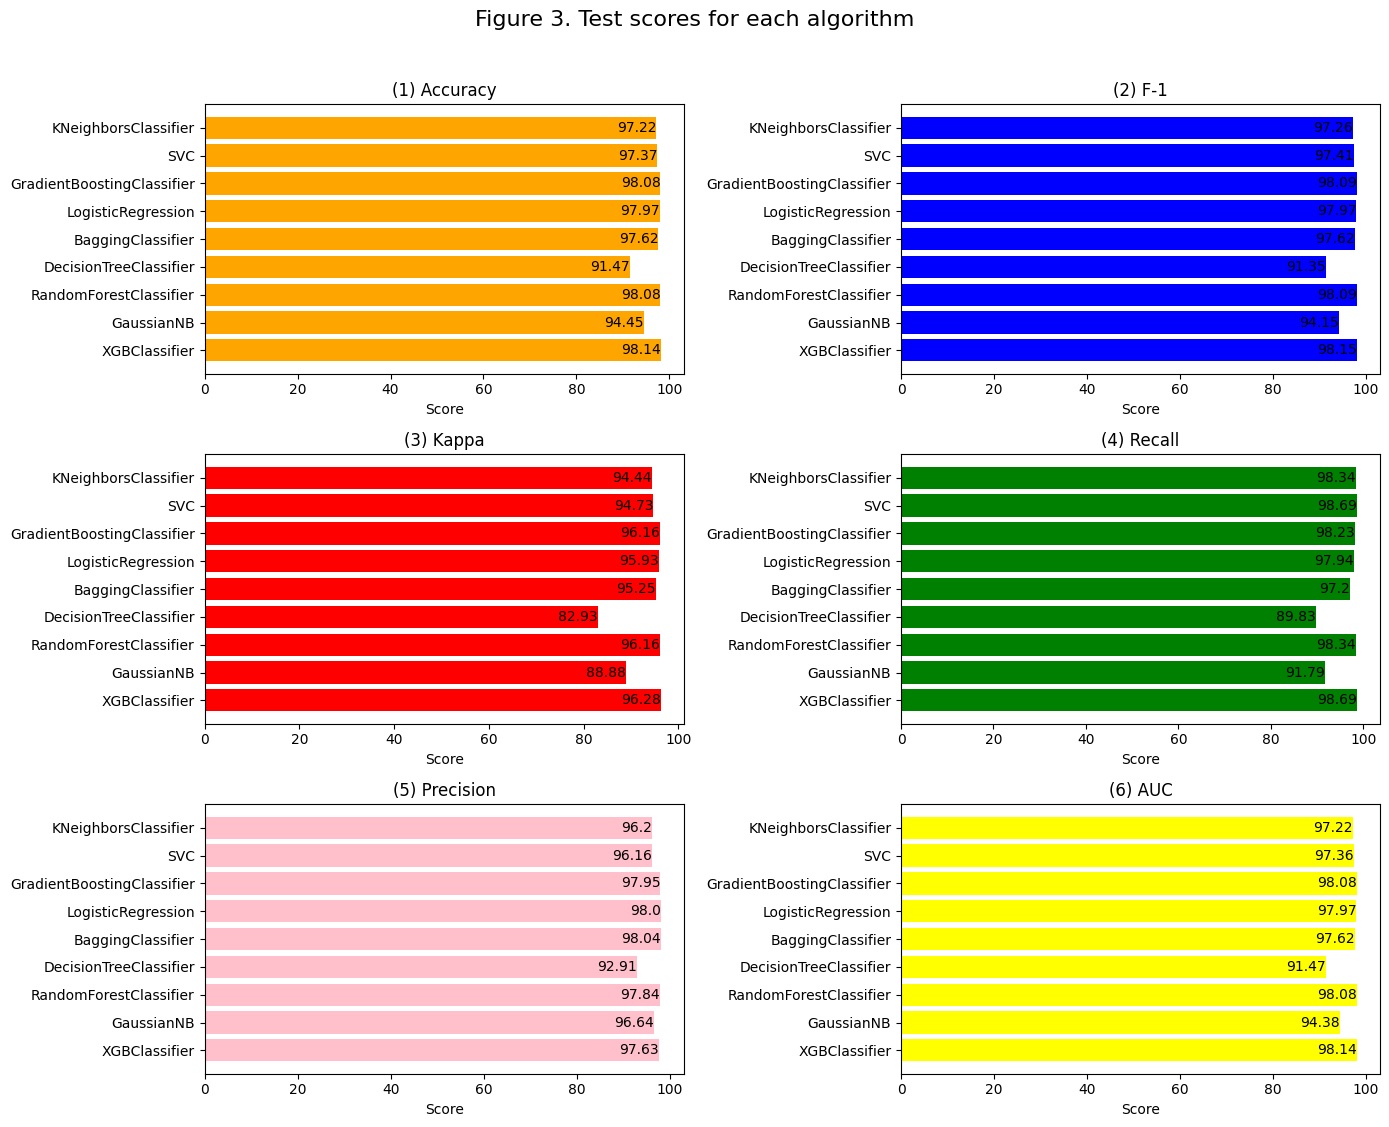

In [239]:
test_performances = total_perfomance[total_perfomance['Set'] == 'Test']

# Create subplots
fig, ax = plt.subplots(3, 2, figsize=(14, 11))  # Set the figure size


title = fig.suptitle("Figure 3. Test scores for each algorithm", fontsize=16)

# Adjust the position of the title
title.set_position([.5, 1.02])
                   
fig.subplots_adjust(top=0.5)  # Adjust the spacing between subplots

axes = ax.flatten()



metrics = total_perfomance.Metric.unique()
colors = ['orange', 'blue', 'red', 'green', 'pink', 'yellow']

for i, met in enumerate(metrics):
    data = test_performances[test_performances['Metric'] == met]


    axes[i].barh(data['Algorithm'], data['Score'], color=colors[i])
    
    for j, value in enumerate(data.Score):
        axes[i].annotate(str(value), xy=(value,j), ha='right', va='center')

    axes[i].set_title(f"({i + 1}) {met}")
    axes[i].invert_yaxis()
    axes[i].set_xlabel("Score")

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [231]:
plt.savefig("performance.png")

In [240]:
total_perfomance_approaches

Algorithm Imbalance          ImputerCat  \
0         KNeighborsClassifier    MWMOTE  SimpleImputer_mode   
12                         SVC    MWMOTE  SimpleImputer_mode   
24  GradientBoostingClassifier    MWMOTE  SimpleImputer_mode   
36          LogisticRegression    MWMOTE  SimpleImputer_mode   
48           BaggingClassifier     SMOTE  SimpleImputer_mode   
60      DecisionTreeClassifier    MWMOTE  SimpleImputer_mode   
72      RandomForestClassifier     SMOTE  SimpleImputer_mode   
84                  GaussianNB    ADASYN  SimpleImputer_mode   
96               XGBClassifier     SMOTE  SimpleImputer_mode   

            ImputerNum  
0   SimpleImputer_mean  
12          KNNImptuer  
24  SimpleImputer_mean  
36  SimpleImputer_mean  
48  SimpleImputer_mean  
60          KNNImptuer  
72          KNNImptuer  
84          KNNImptuer  
96          KNNImptuer

In [274]:

mean_performance = test_performances.groupby("Algorithm",as_index=False)['Score'].mean()
mean_performance['Score'] = mean_performance['Score'].round(2)
mean_performance.sort_values("Score",inplace=True)

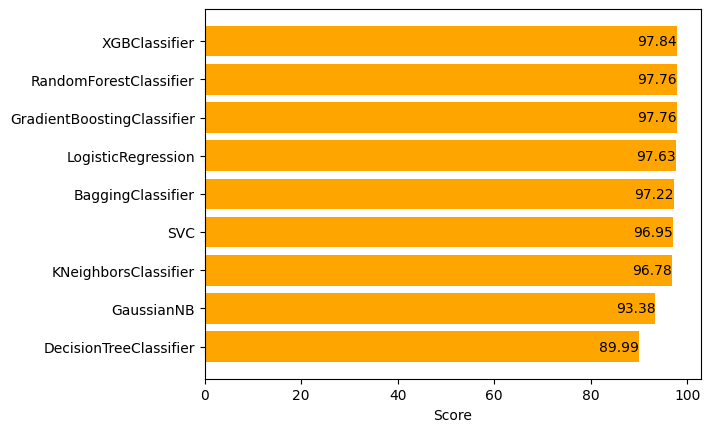

In [276]:
fig,ax = plt.subplots(1,1)

ax.barh(mean_performance['Algorithm'],mean_performance['Score'],color='orange')
for j, value in enumerate(mean_performance.Score):  # Changed the variable name to j
    ax.annotate(str(value), xy=(value,j), ha='right', va='center')

ax.set_xlabel("Score")

plt.show()